PACK 1


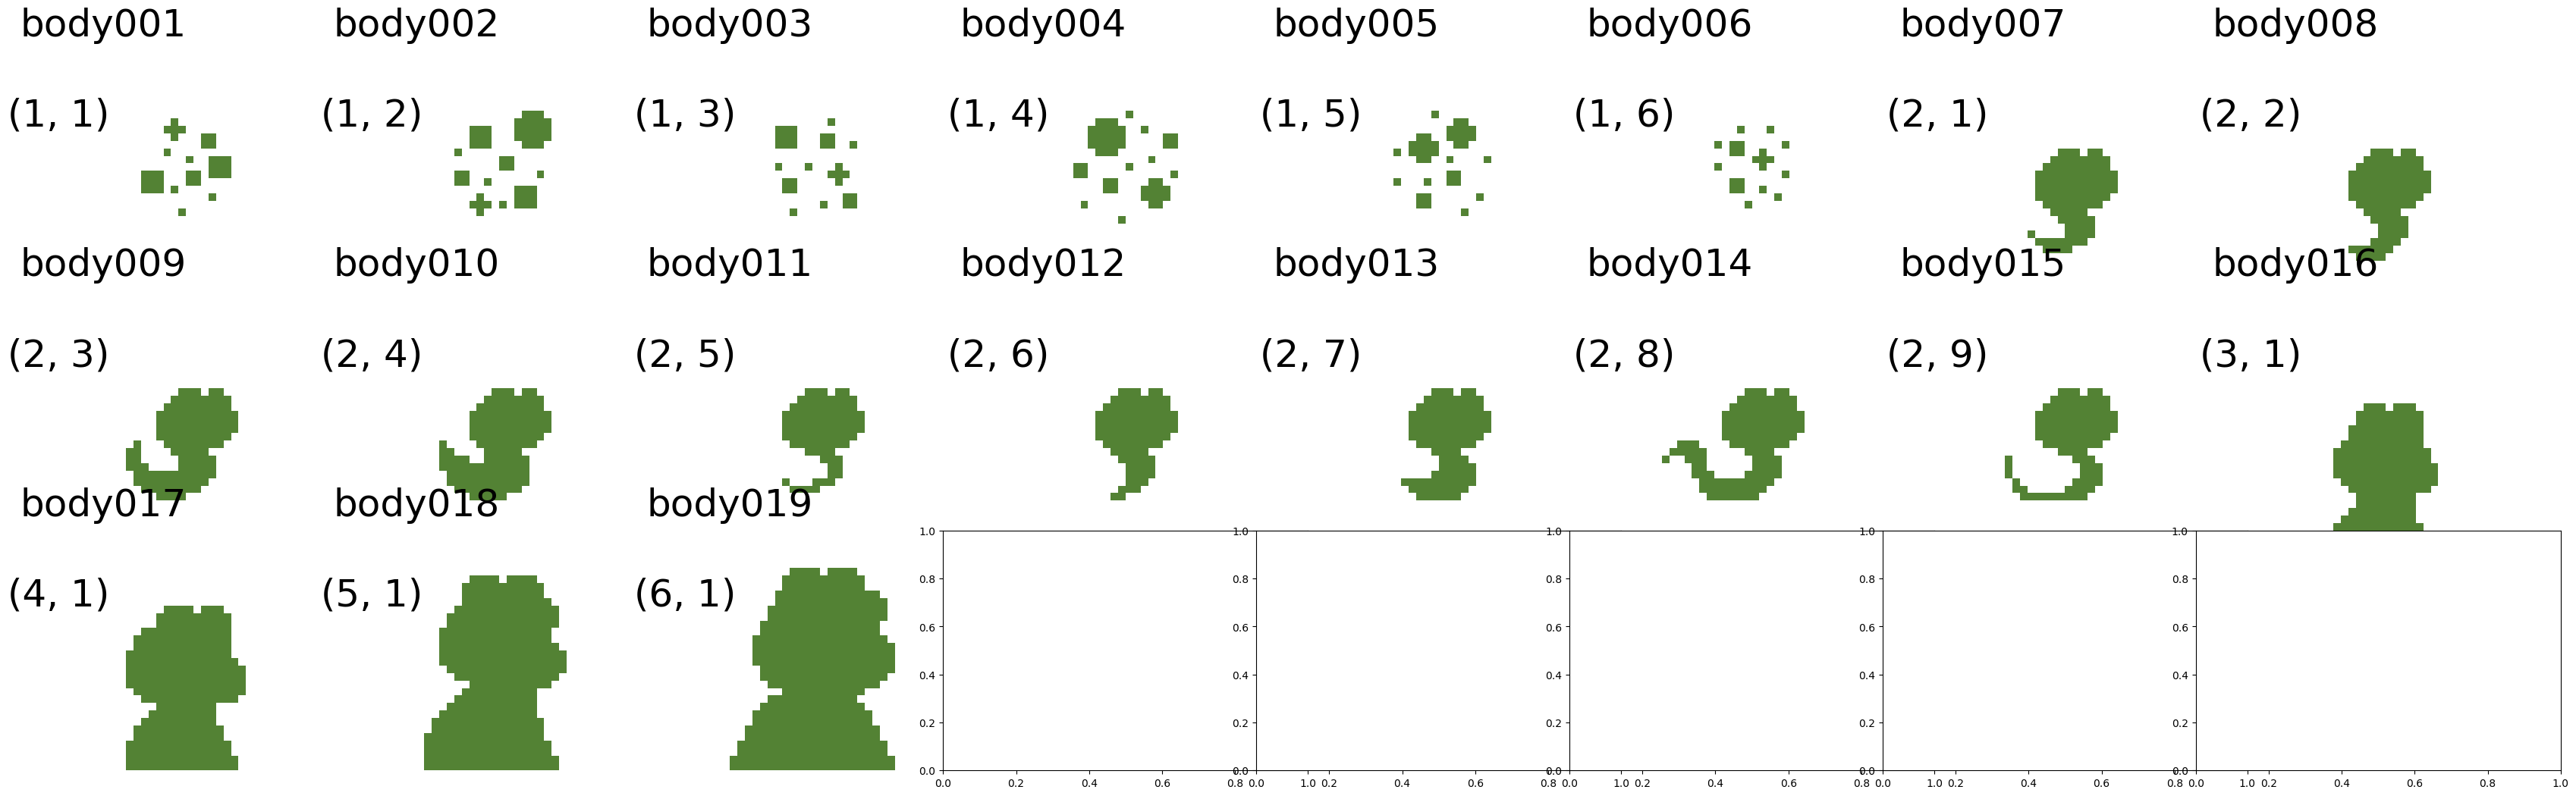

PACK 1


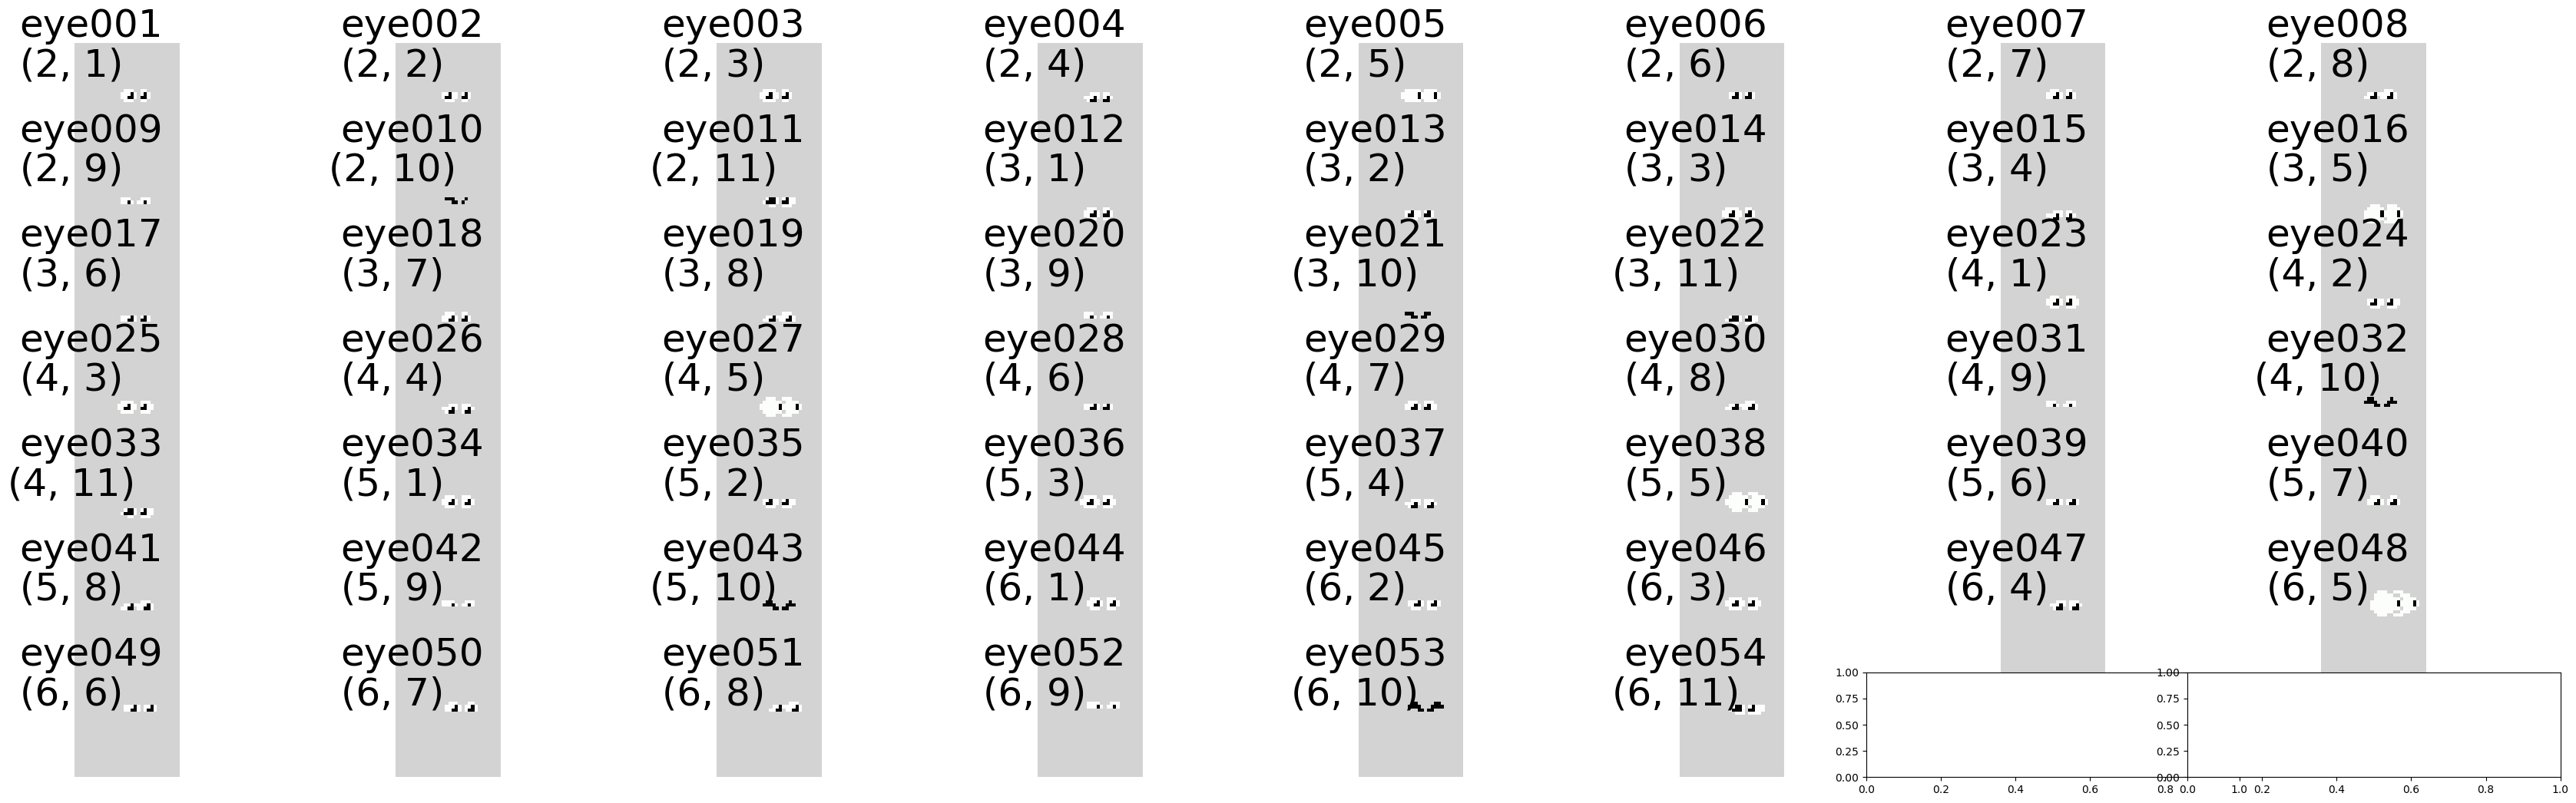

PACK 1


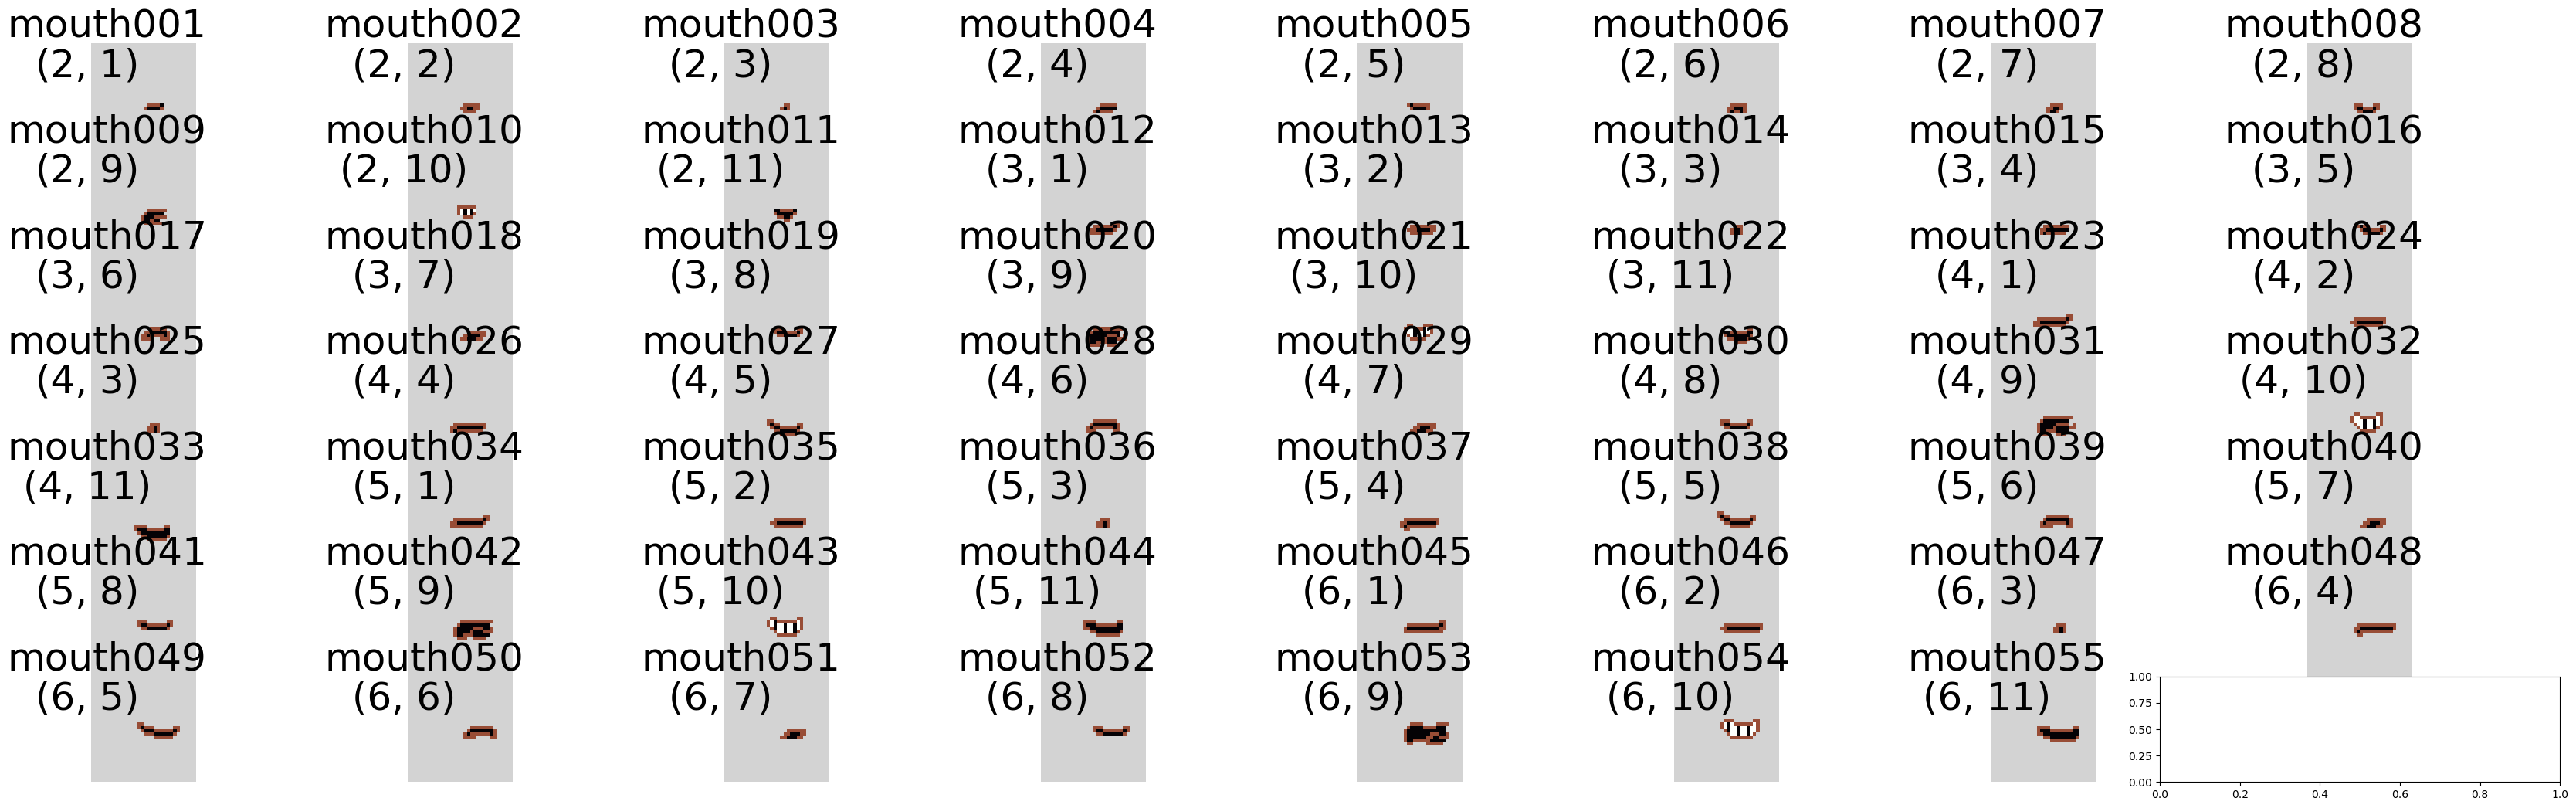

PACK 1


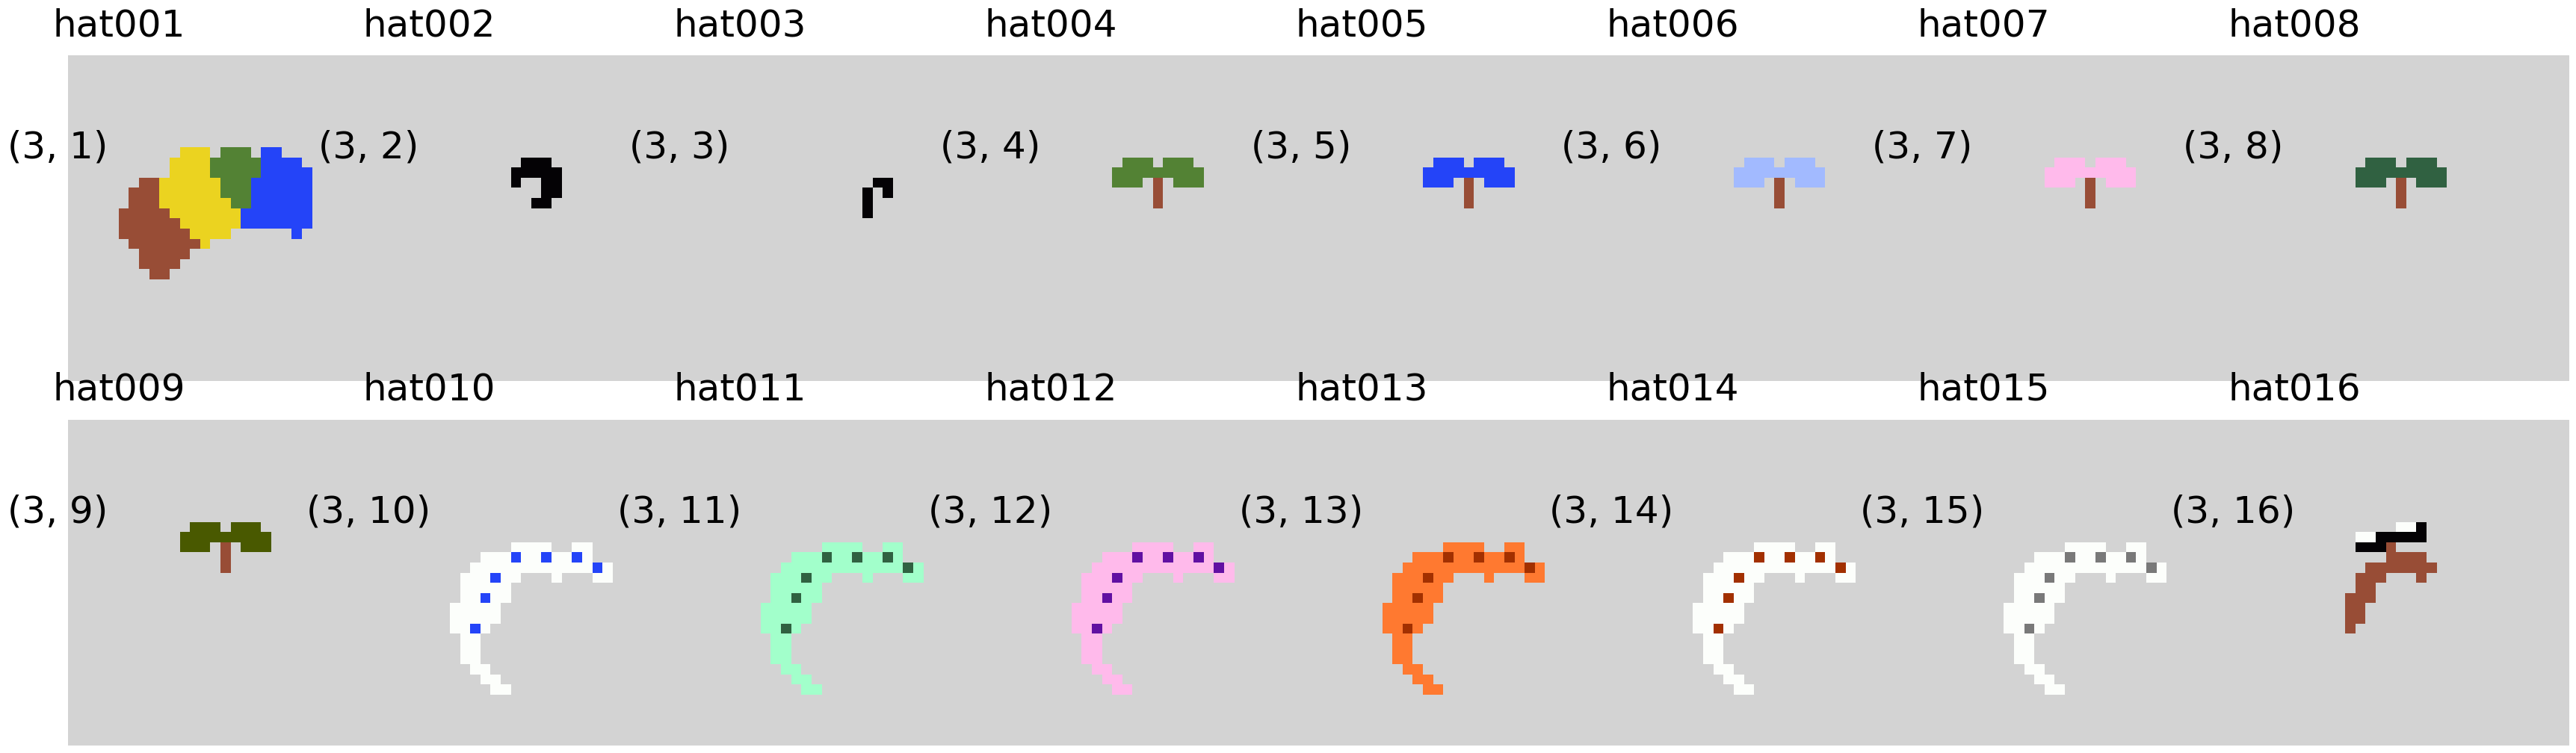

PACK 2


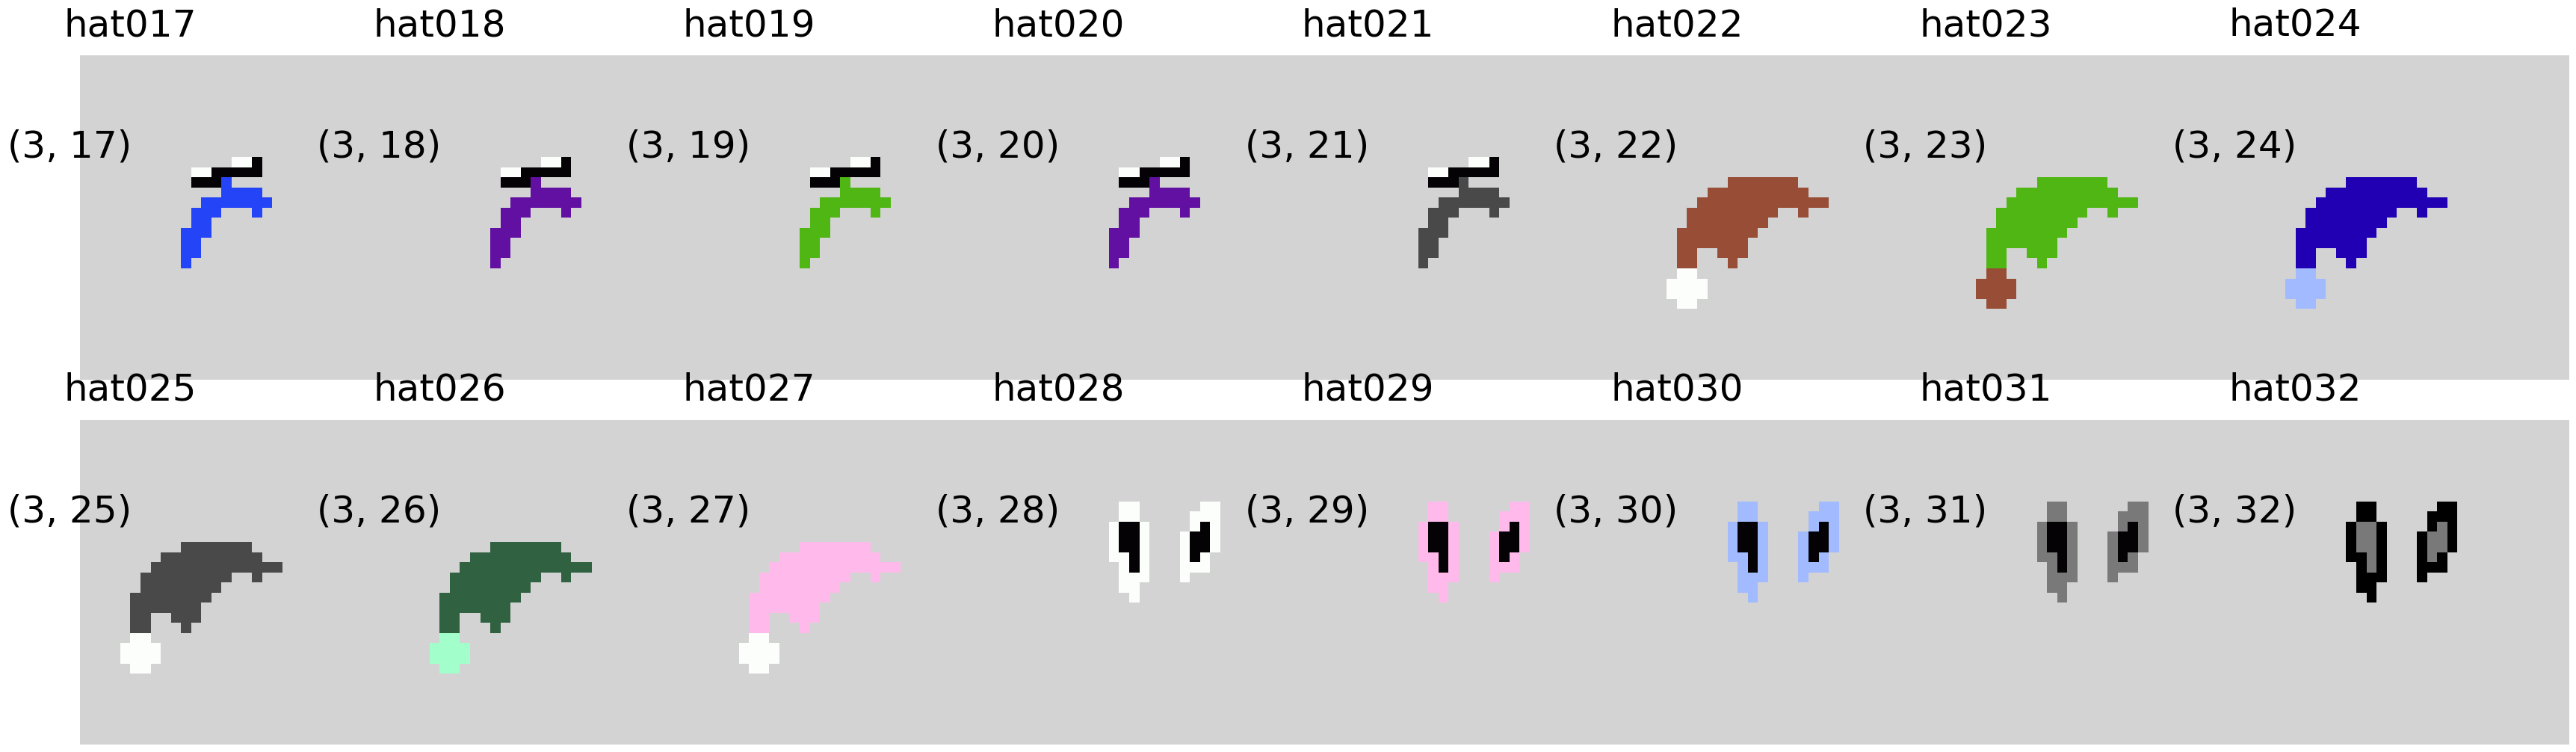

PACK 3


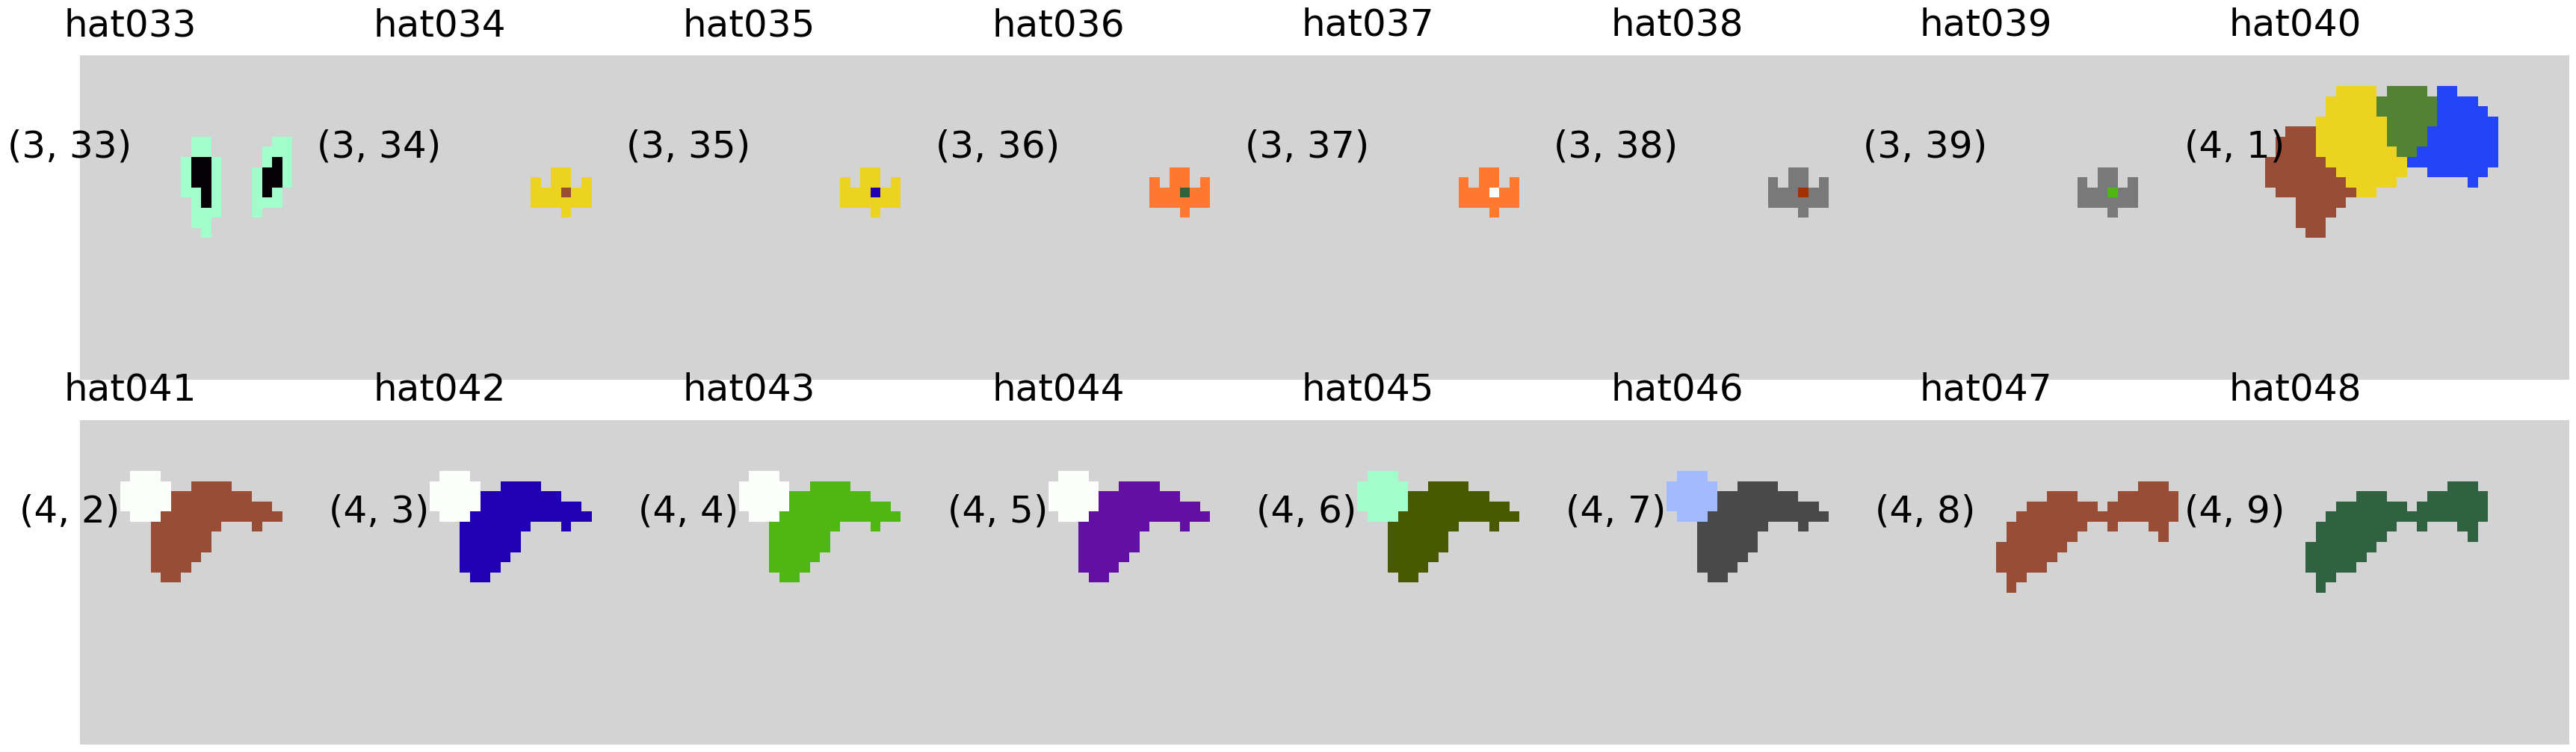

PACK 4


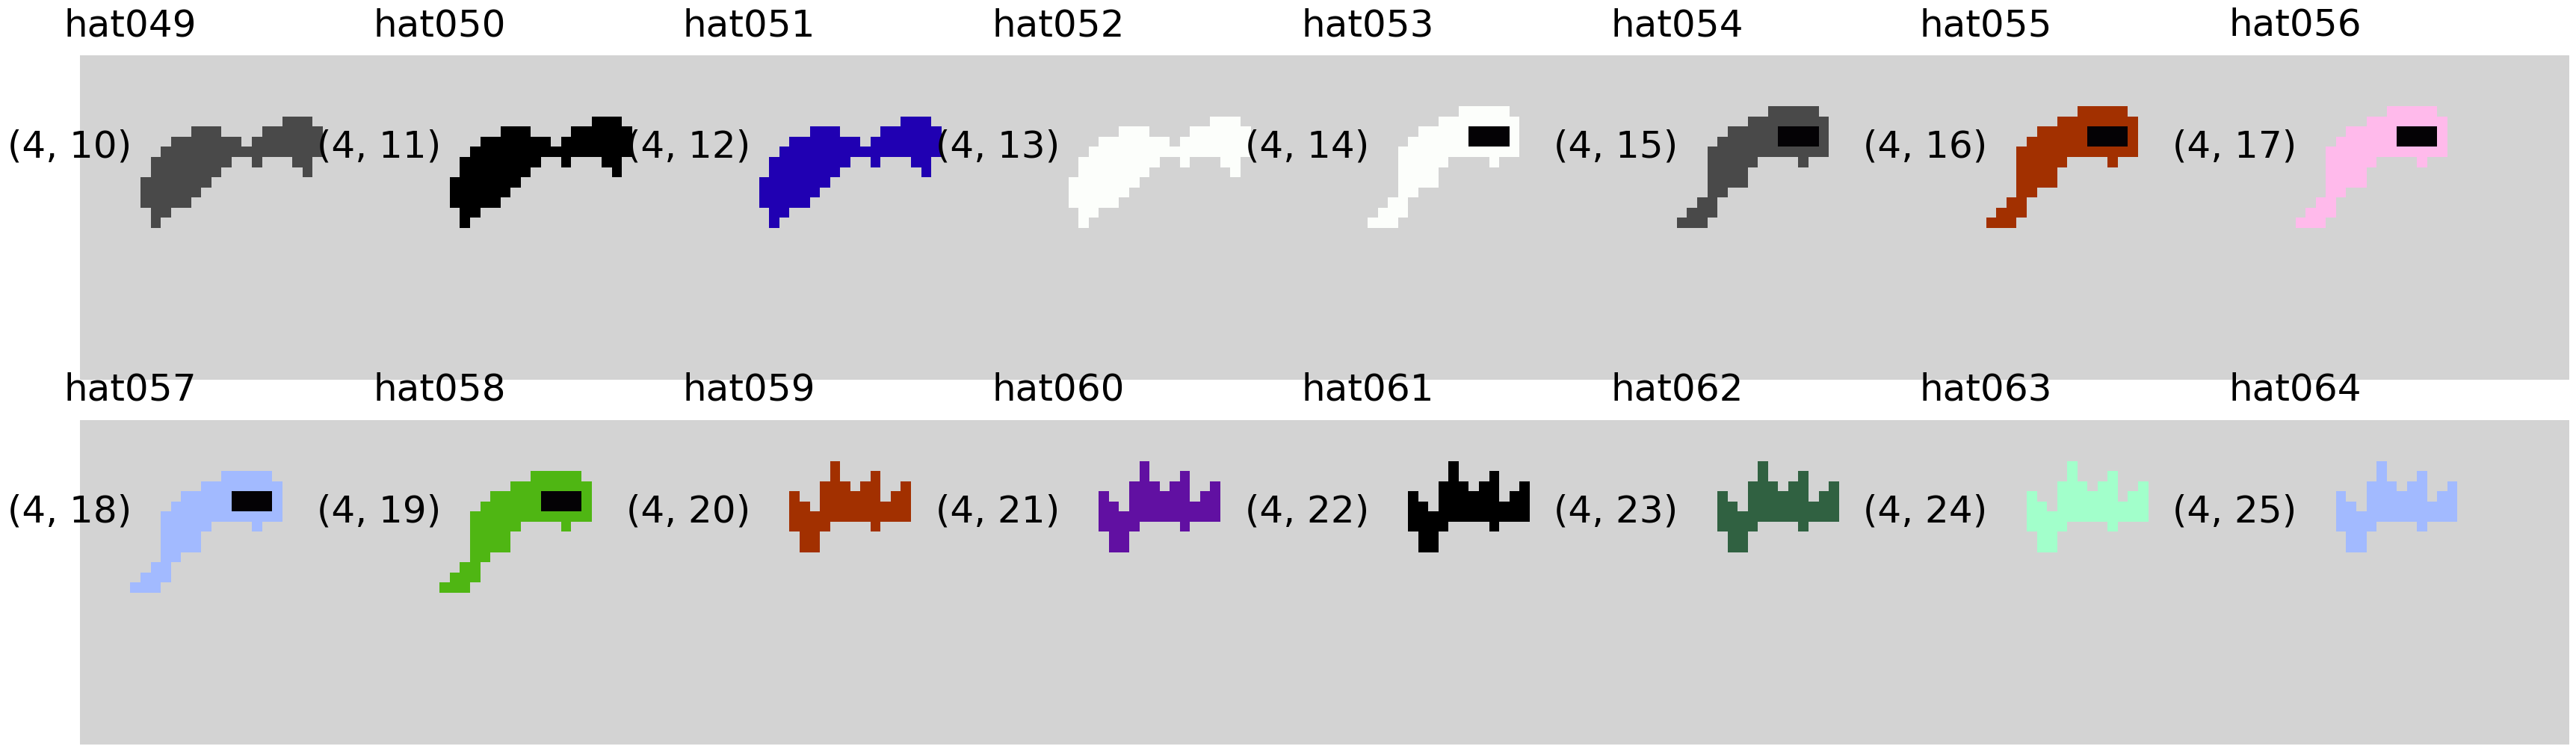

PACK 5


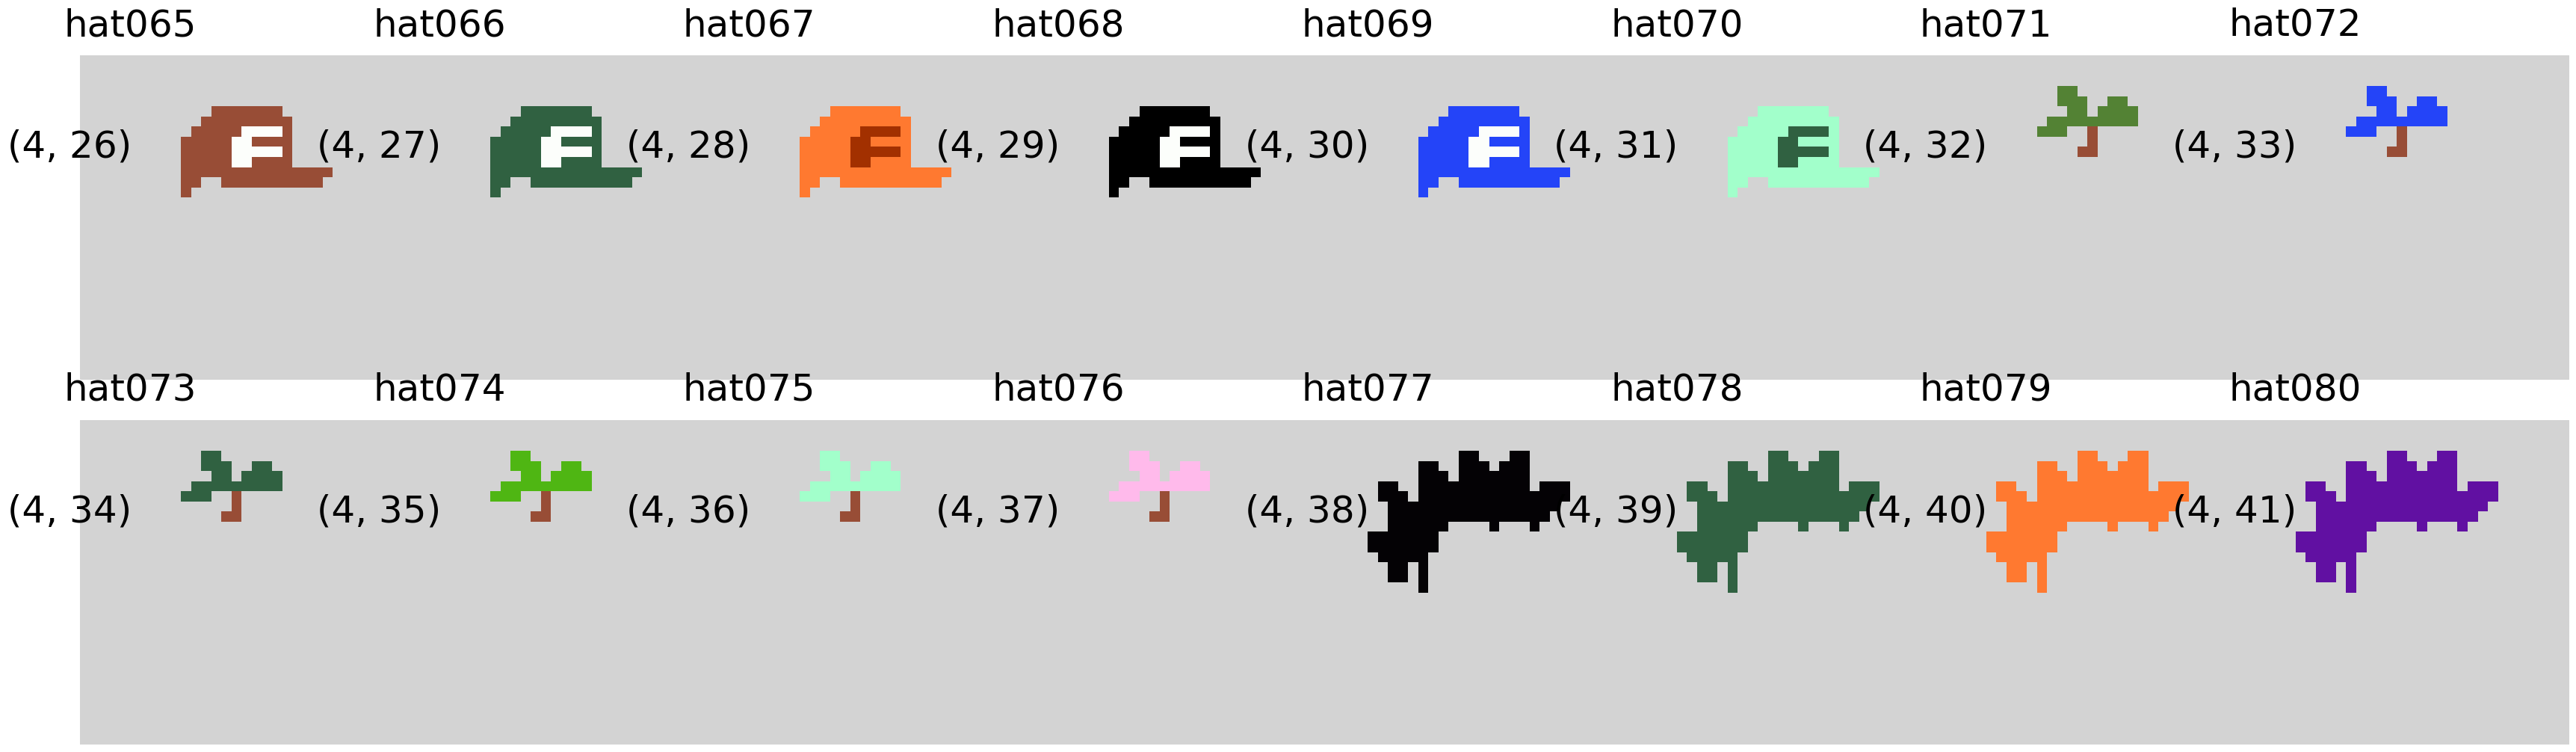

PACK 6


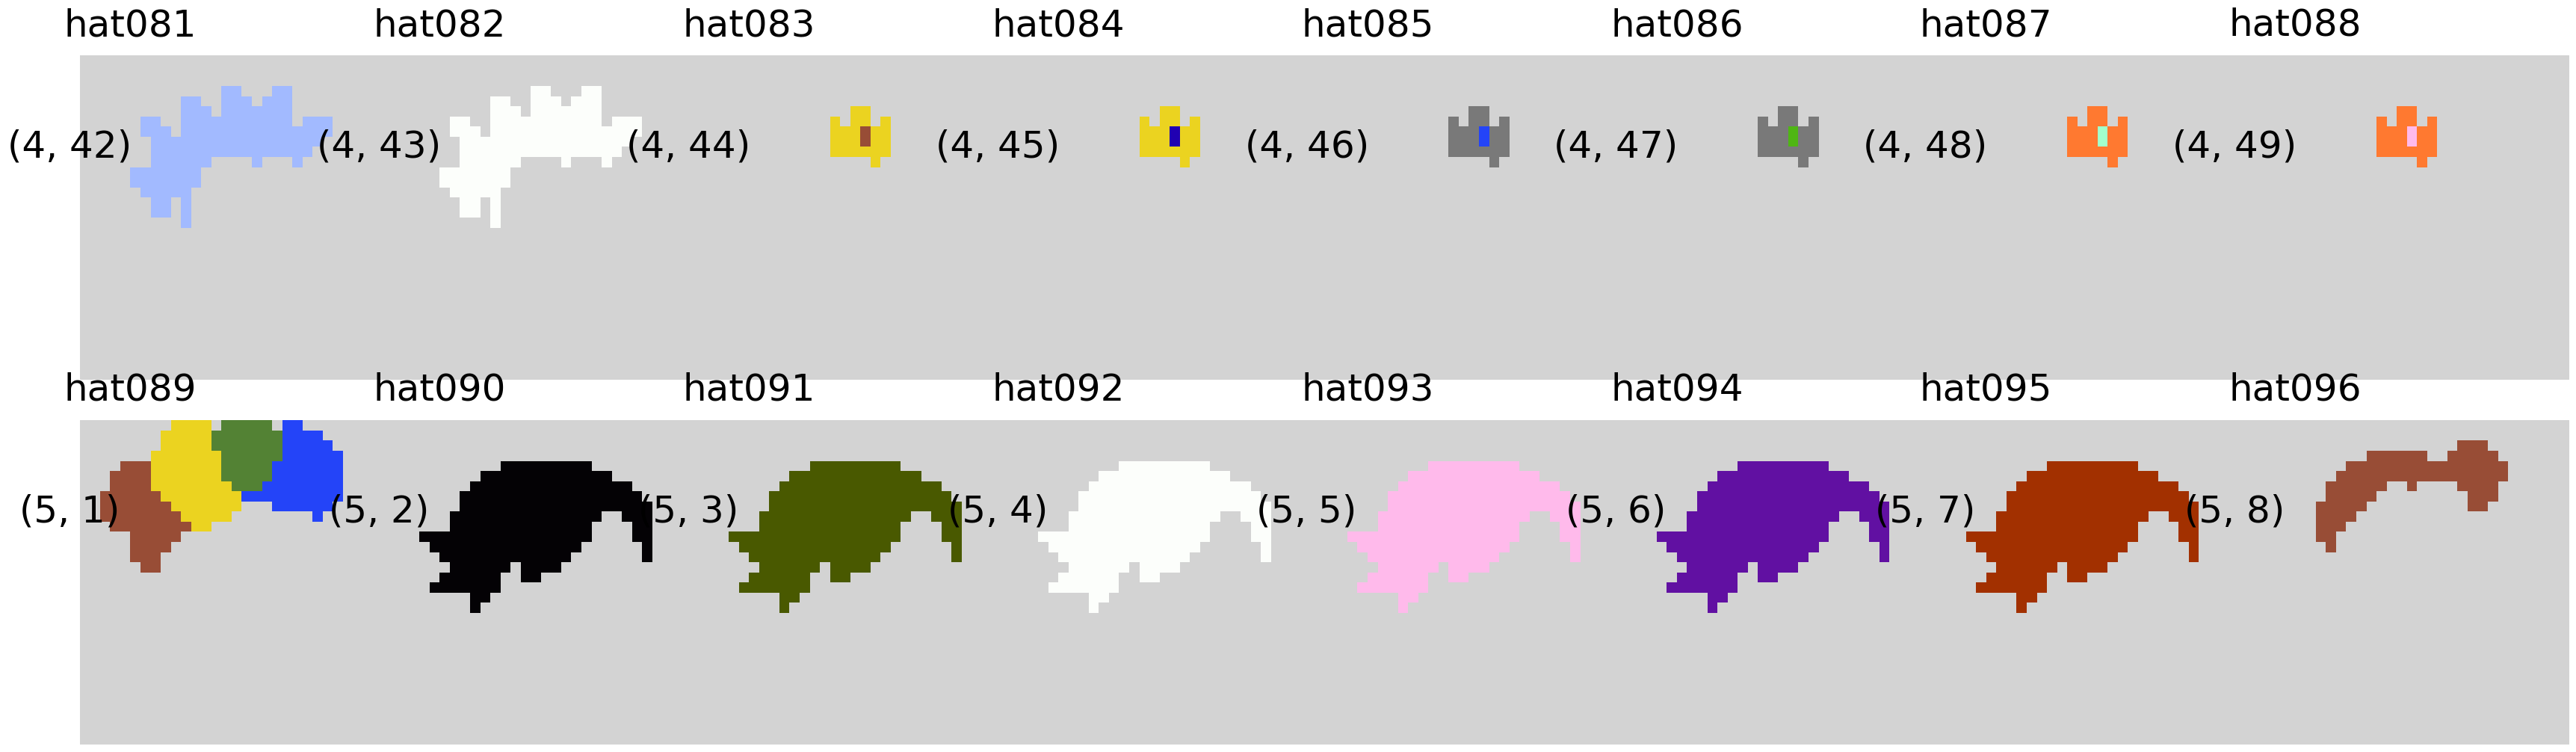

PACK 7


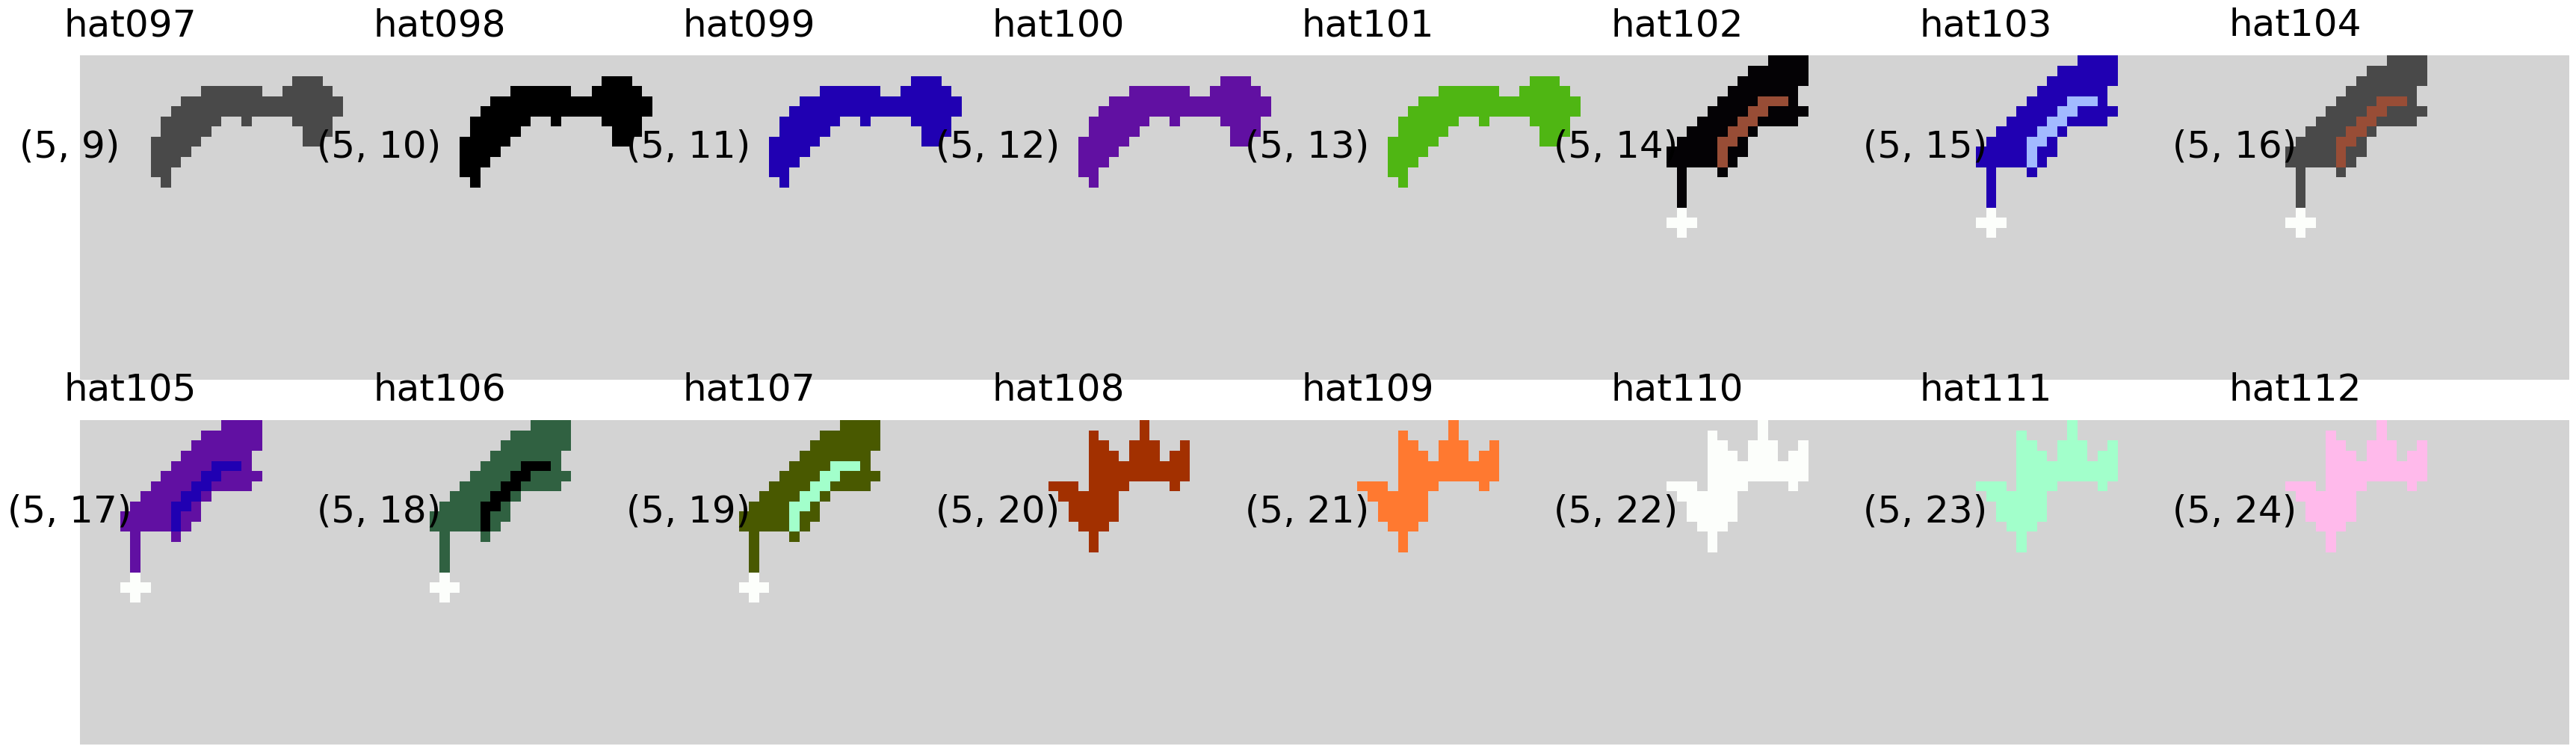

PACK 8


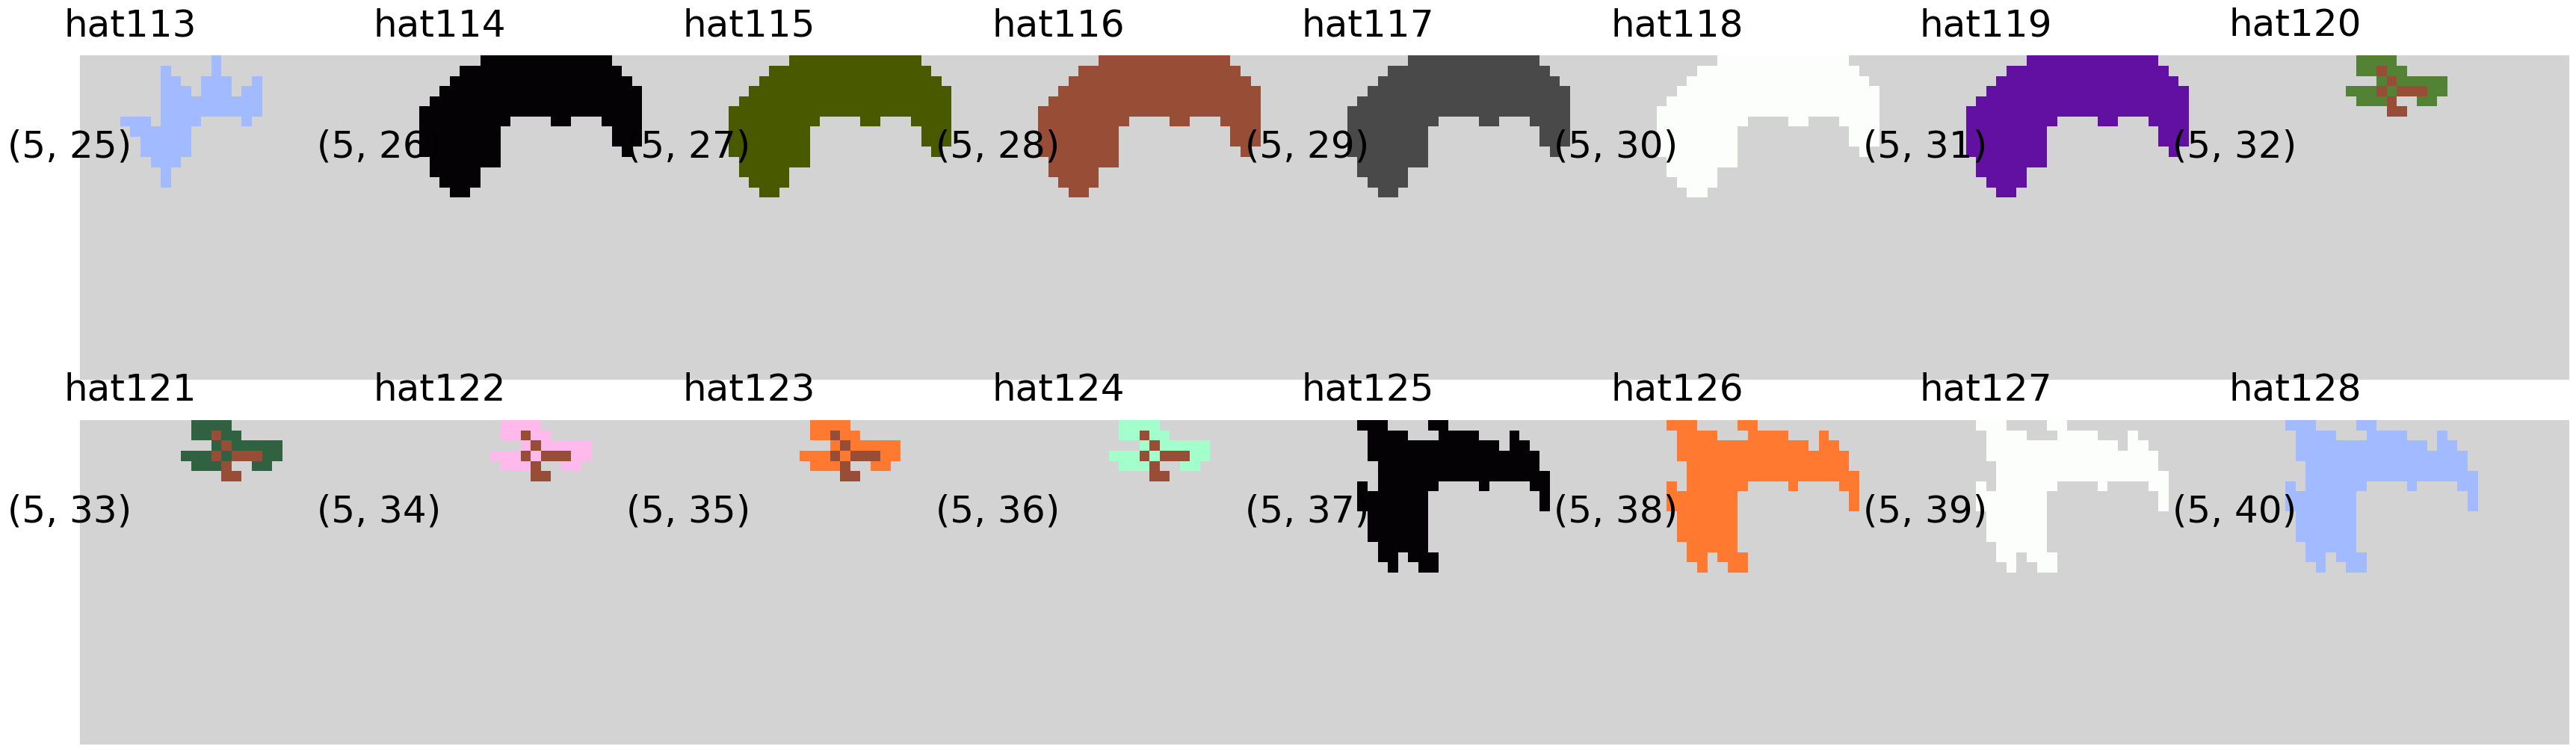

PACK 9


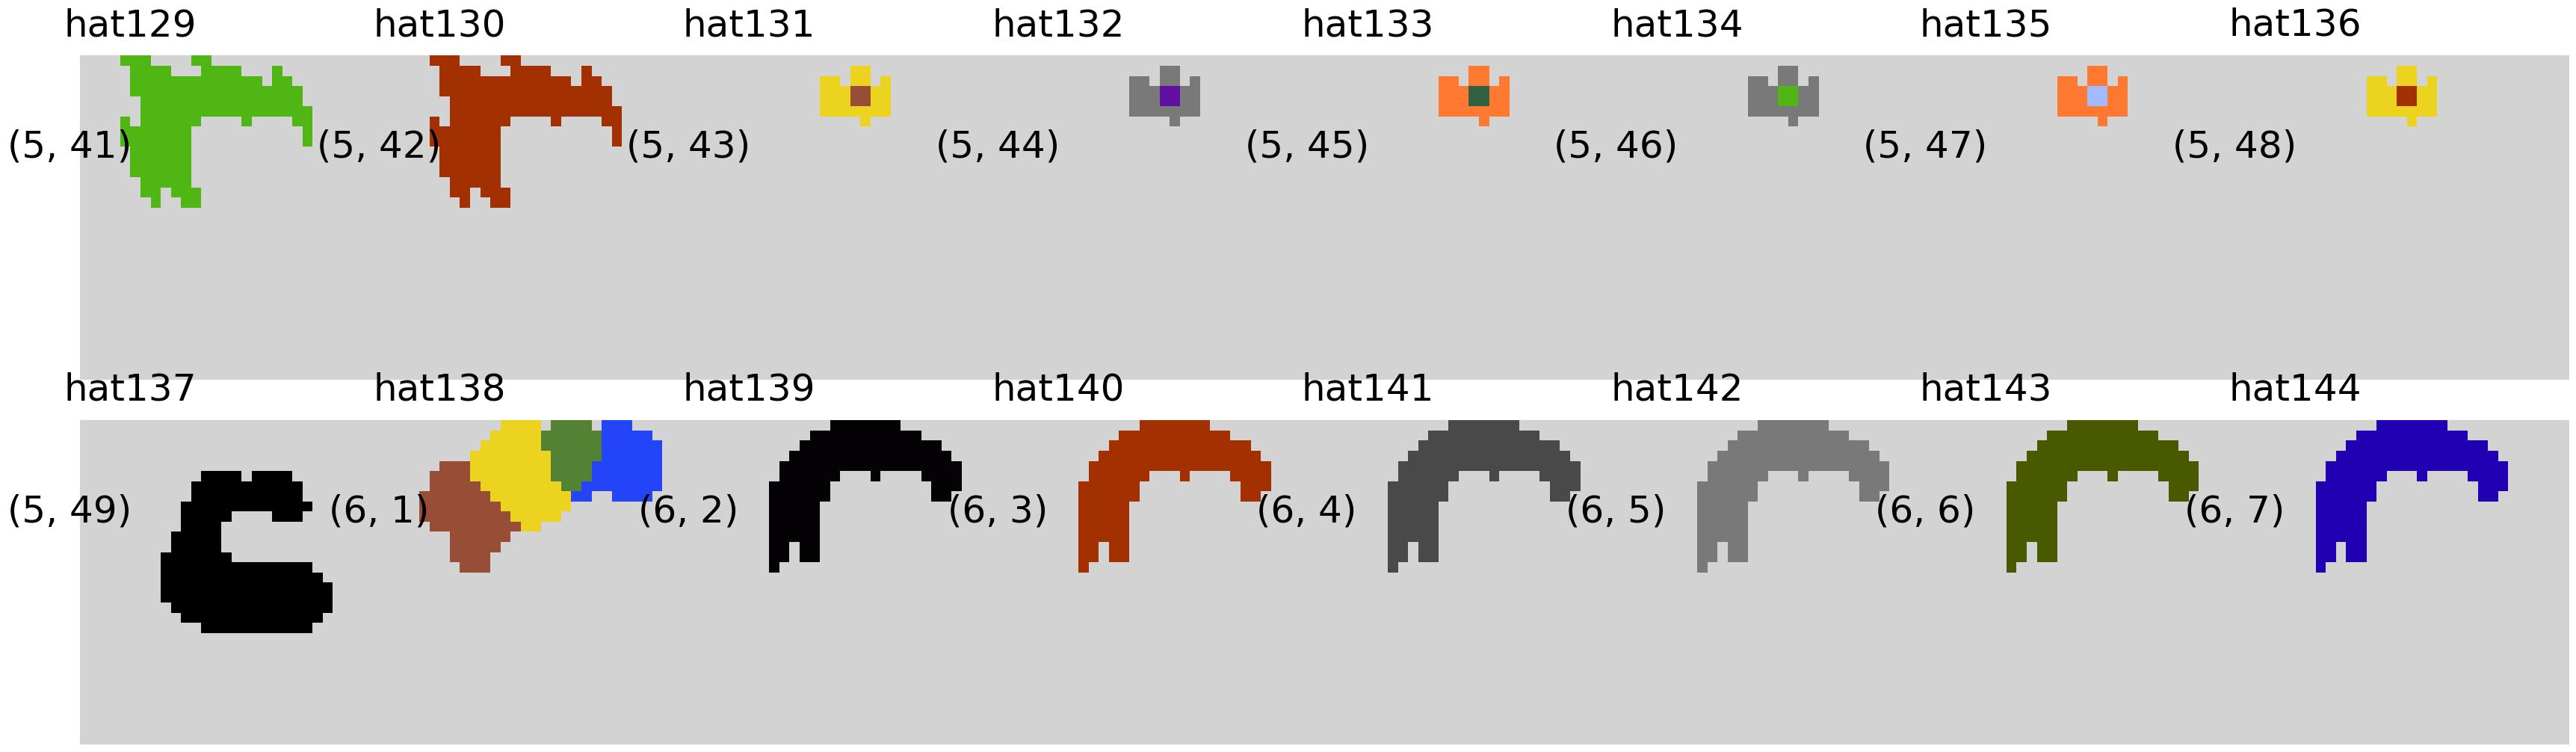

PACK 10


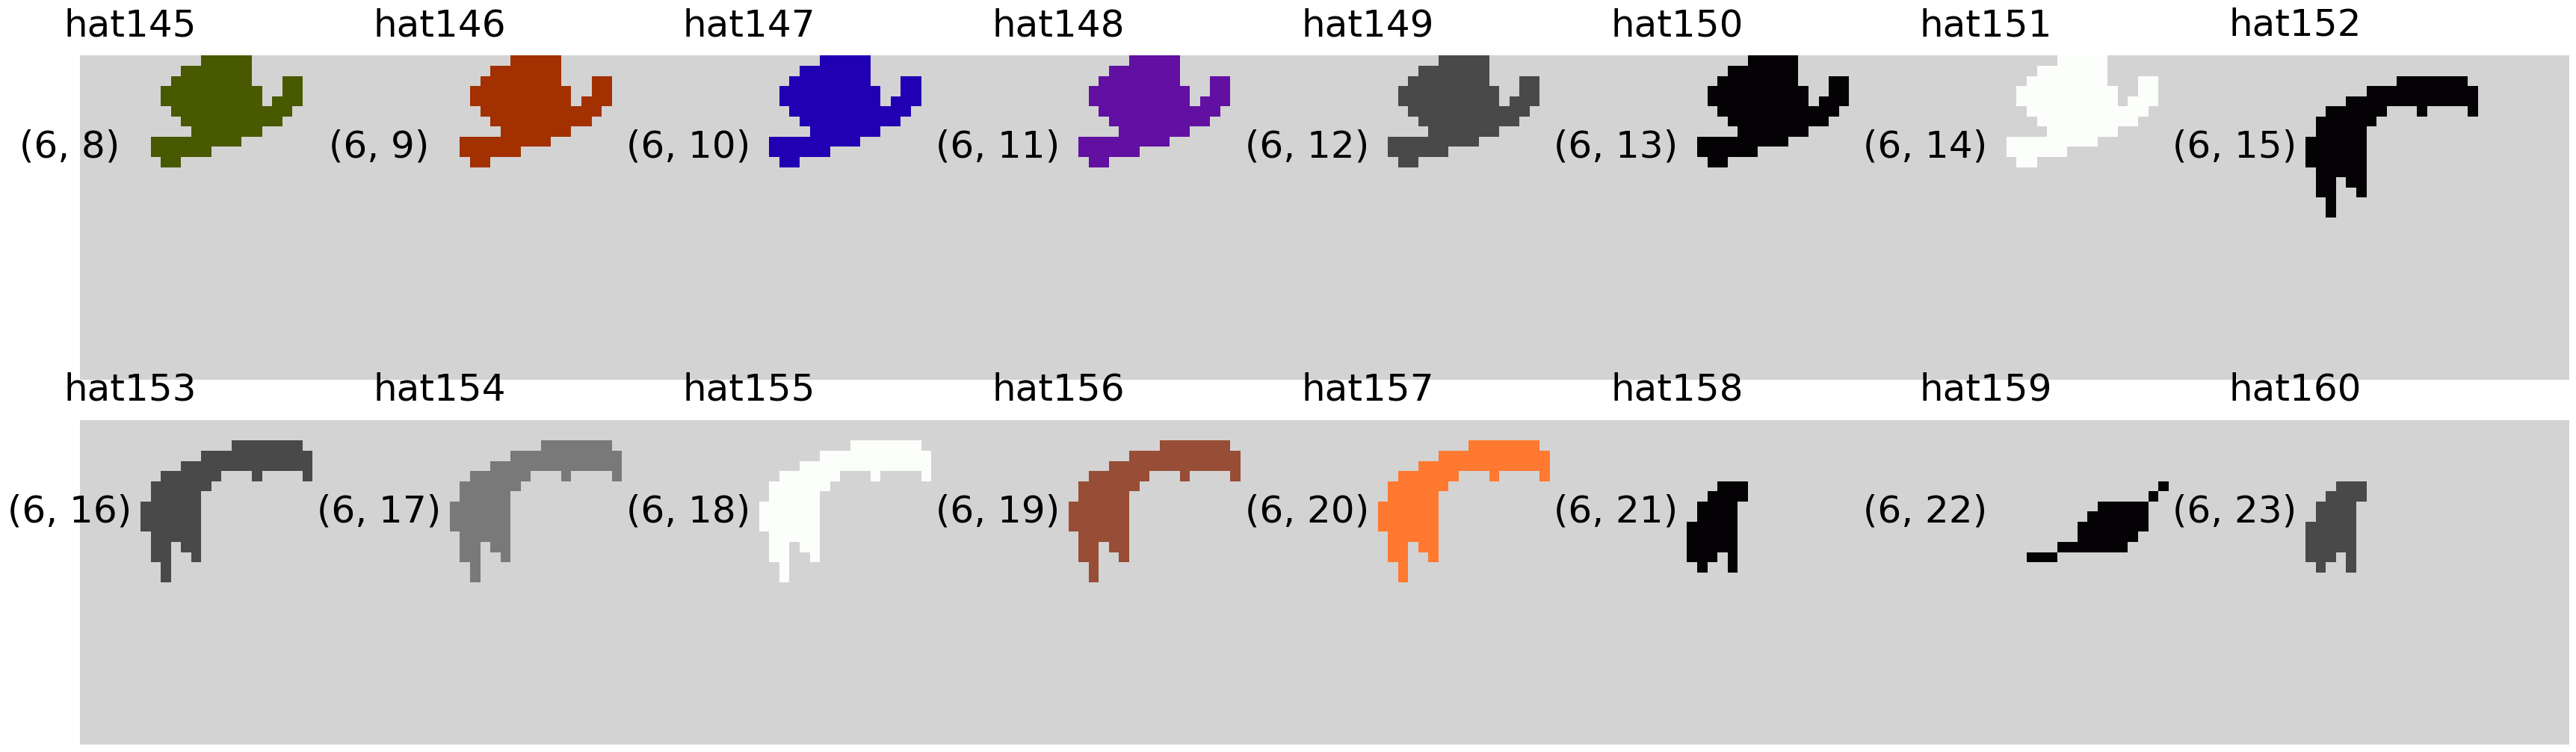

PACK 11


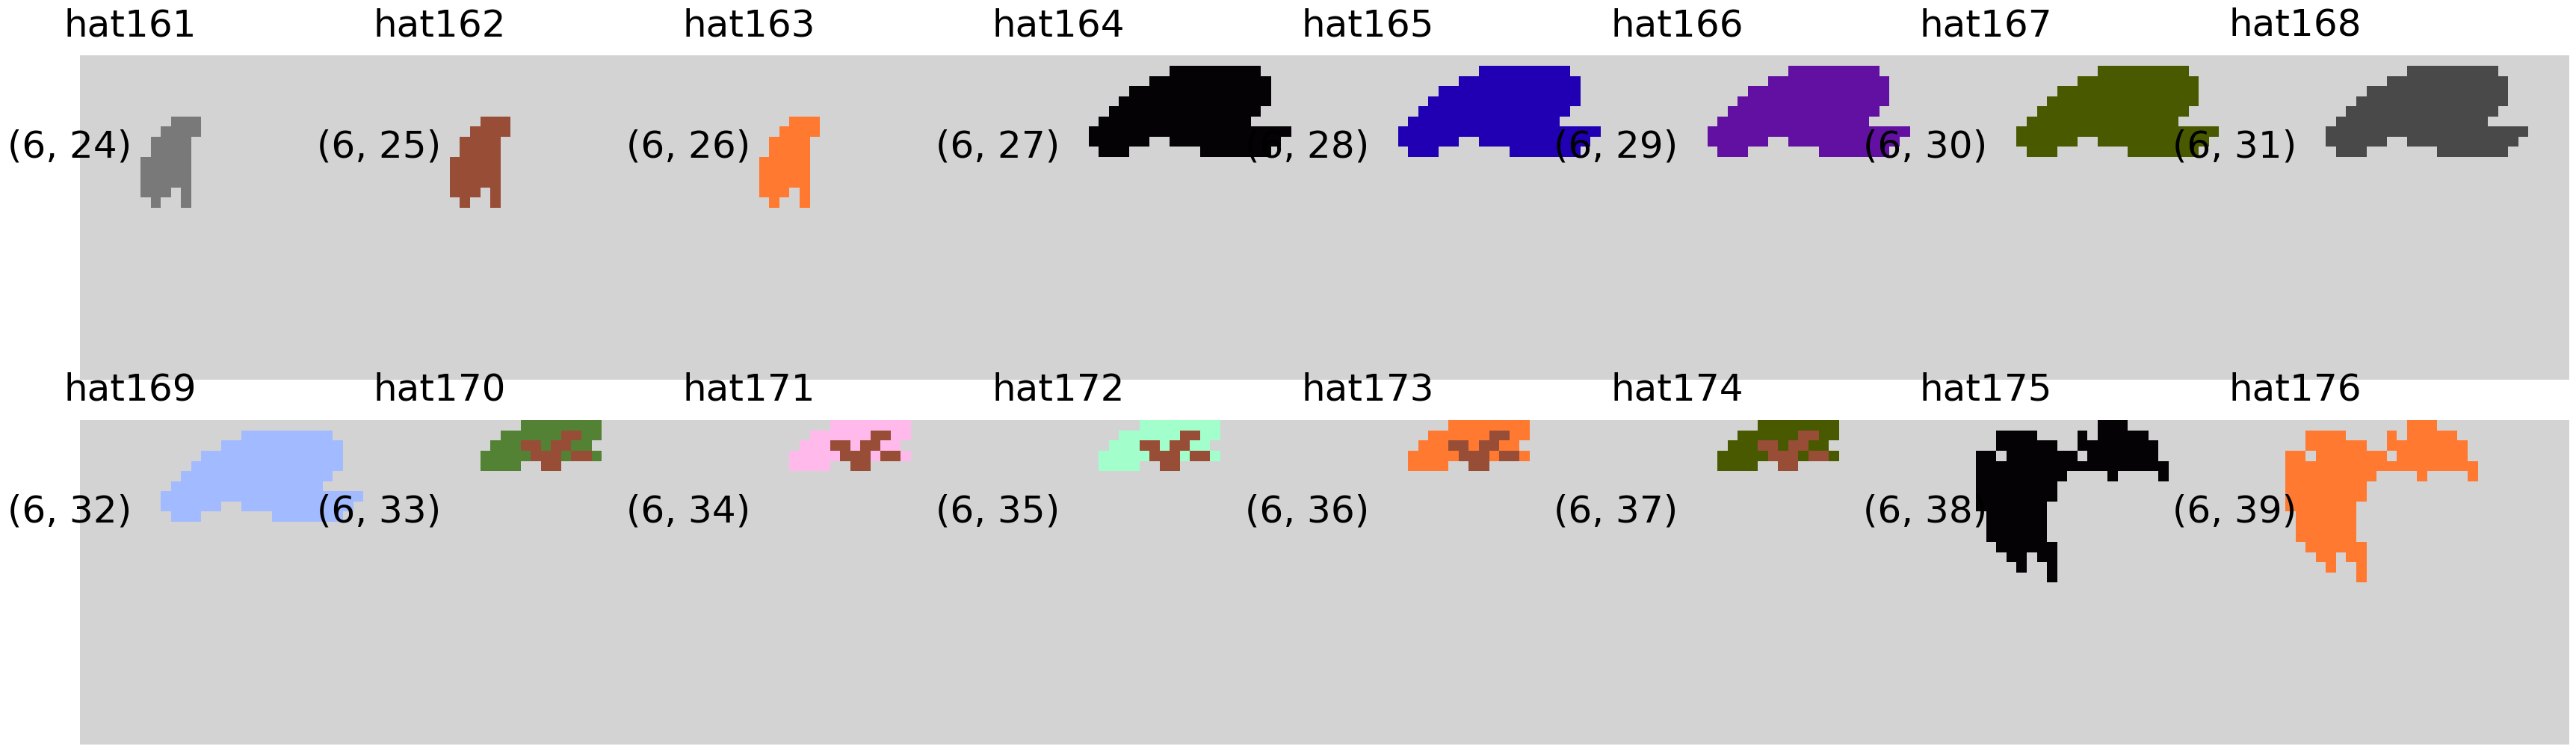

PACK 12


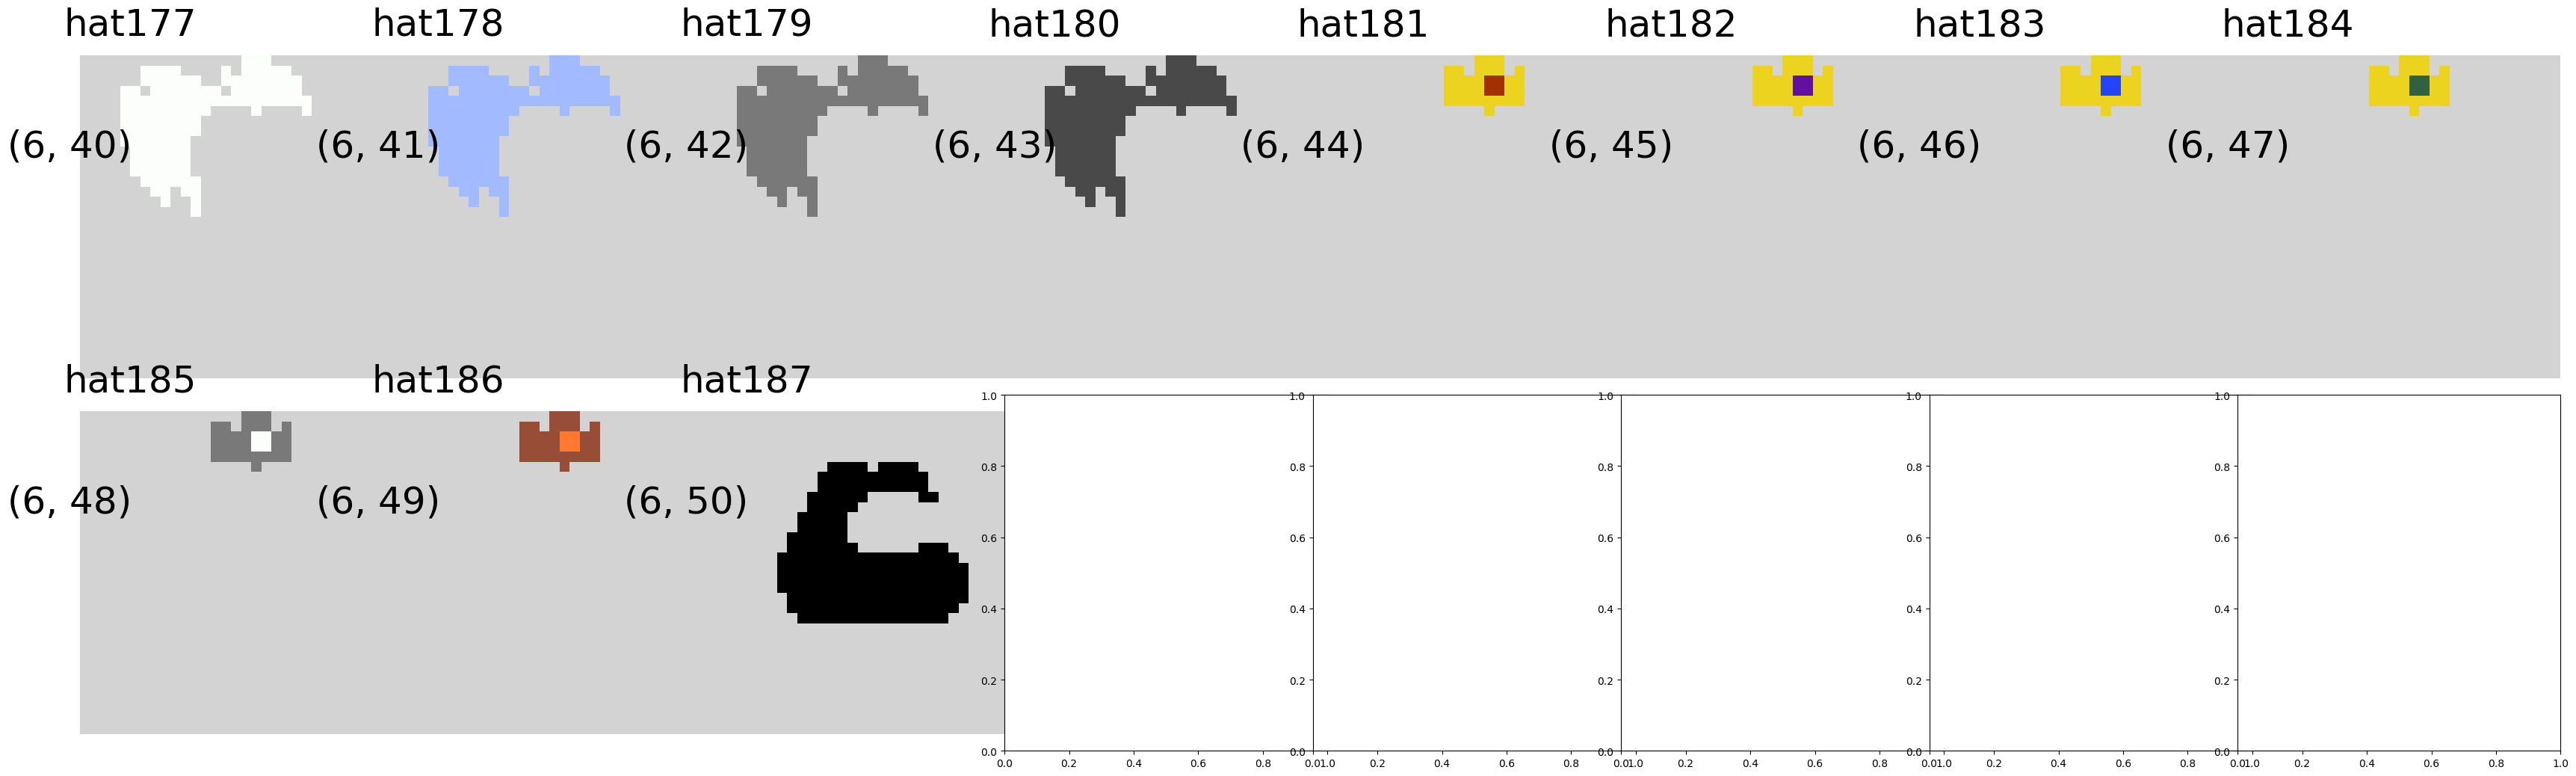

PACK 1


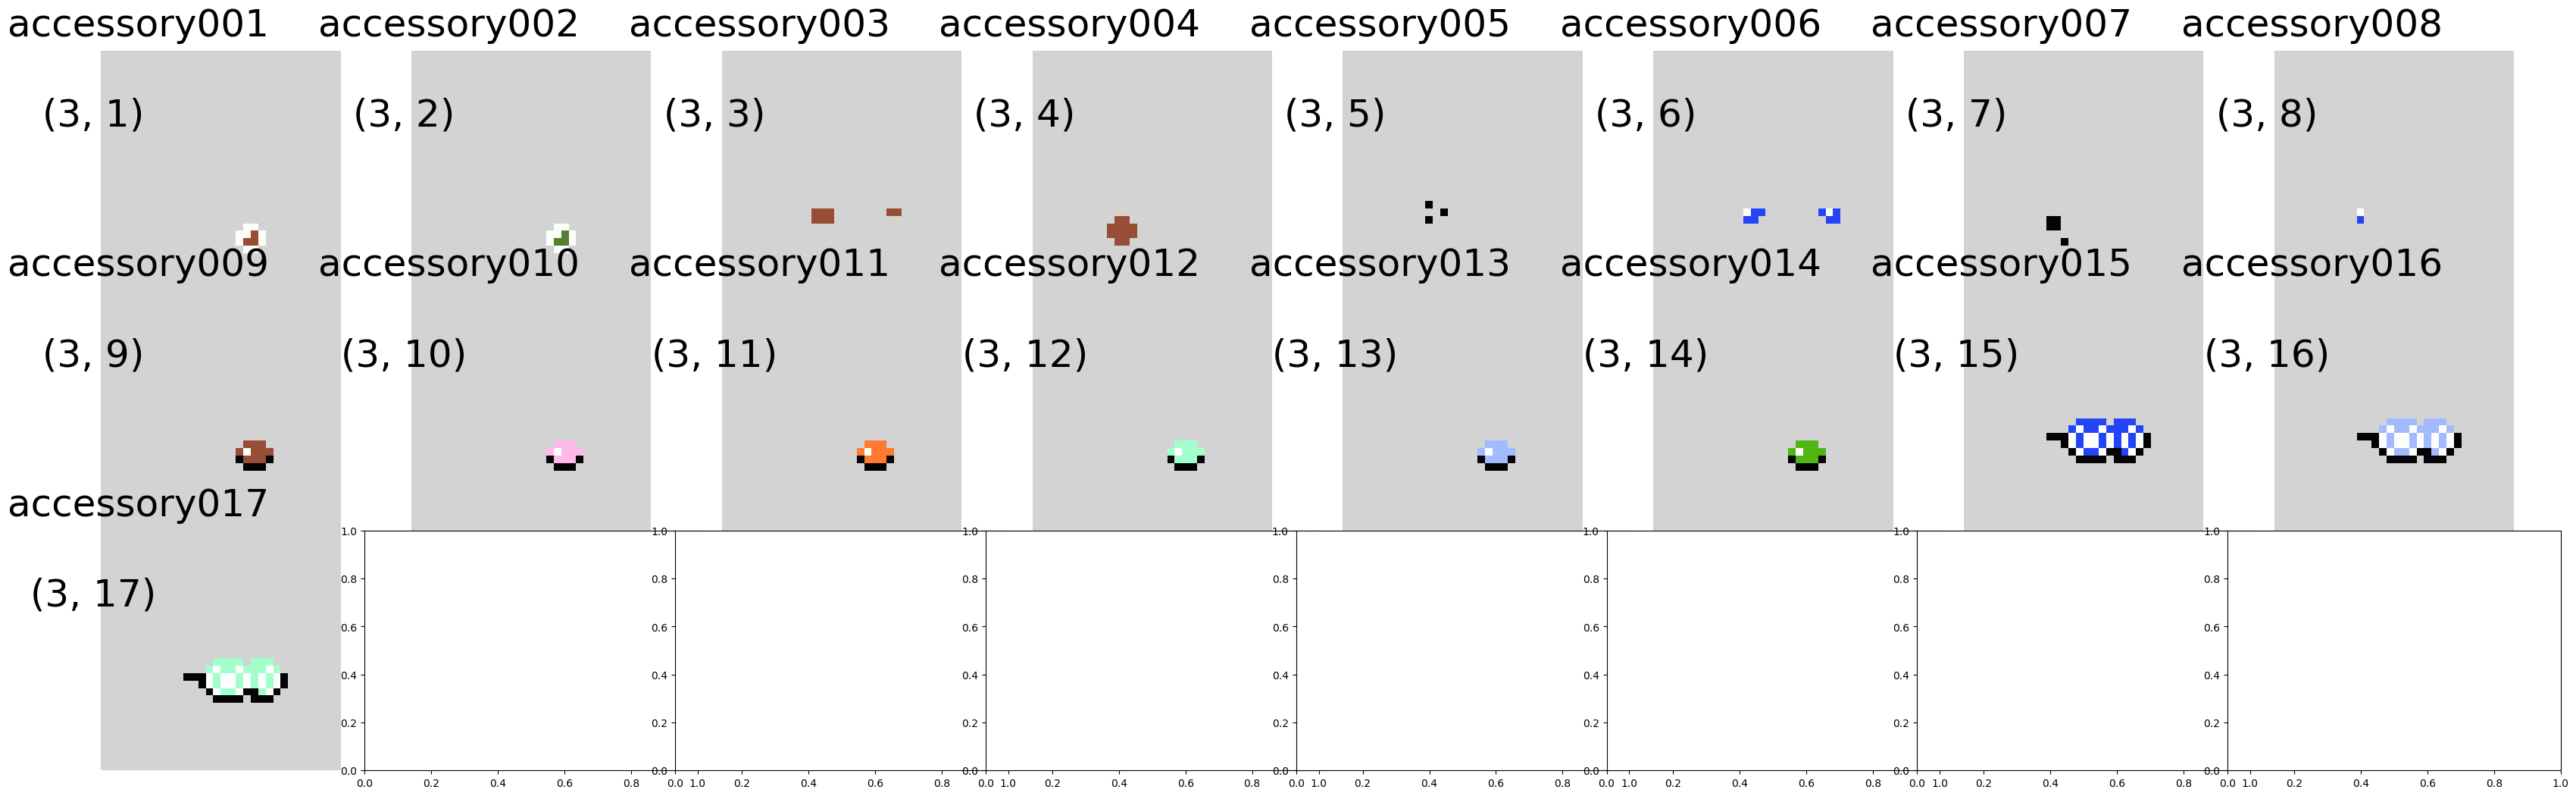

PACK 2


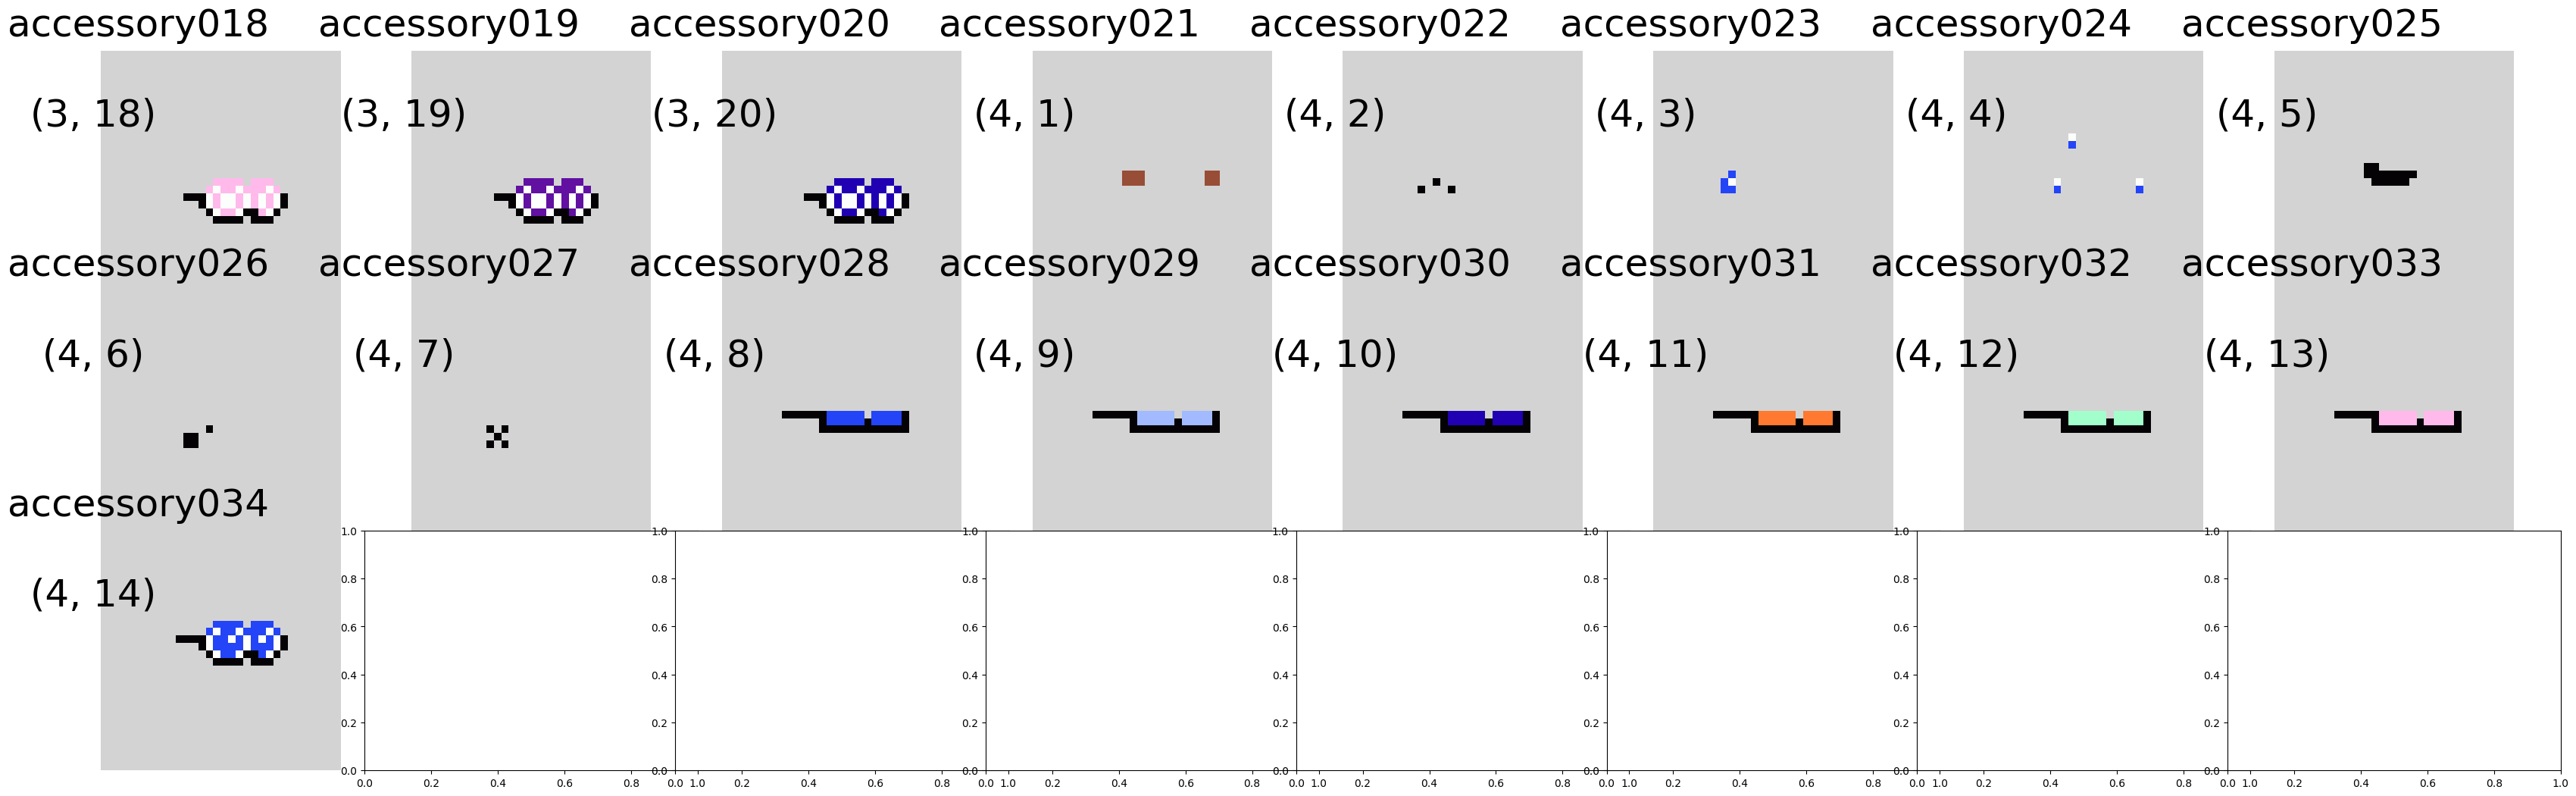

PACK 3


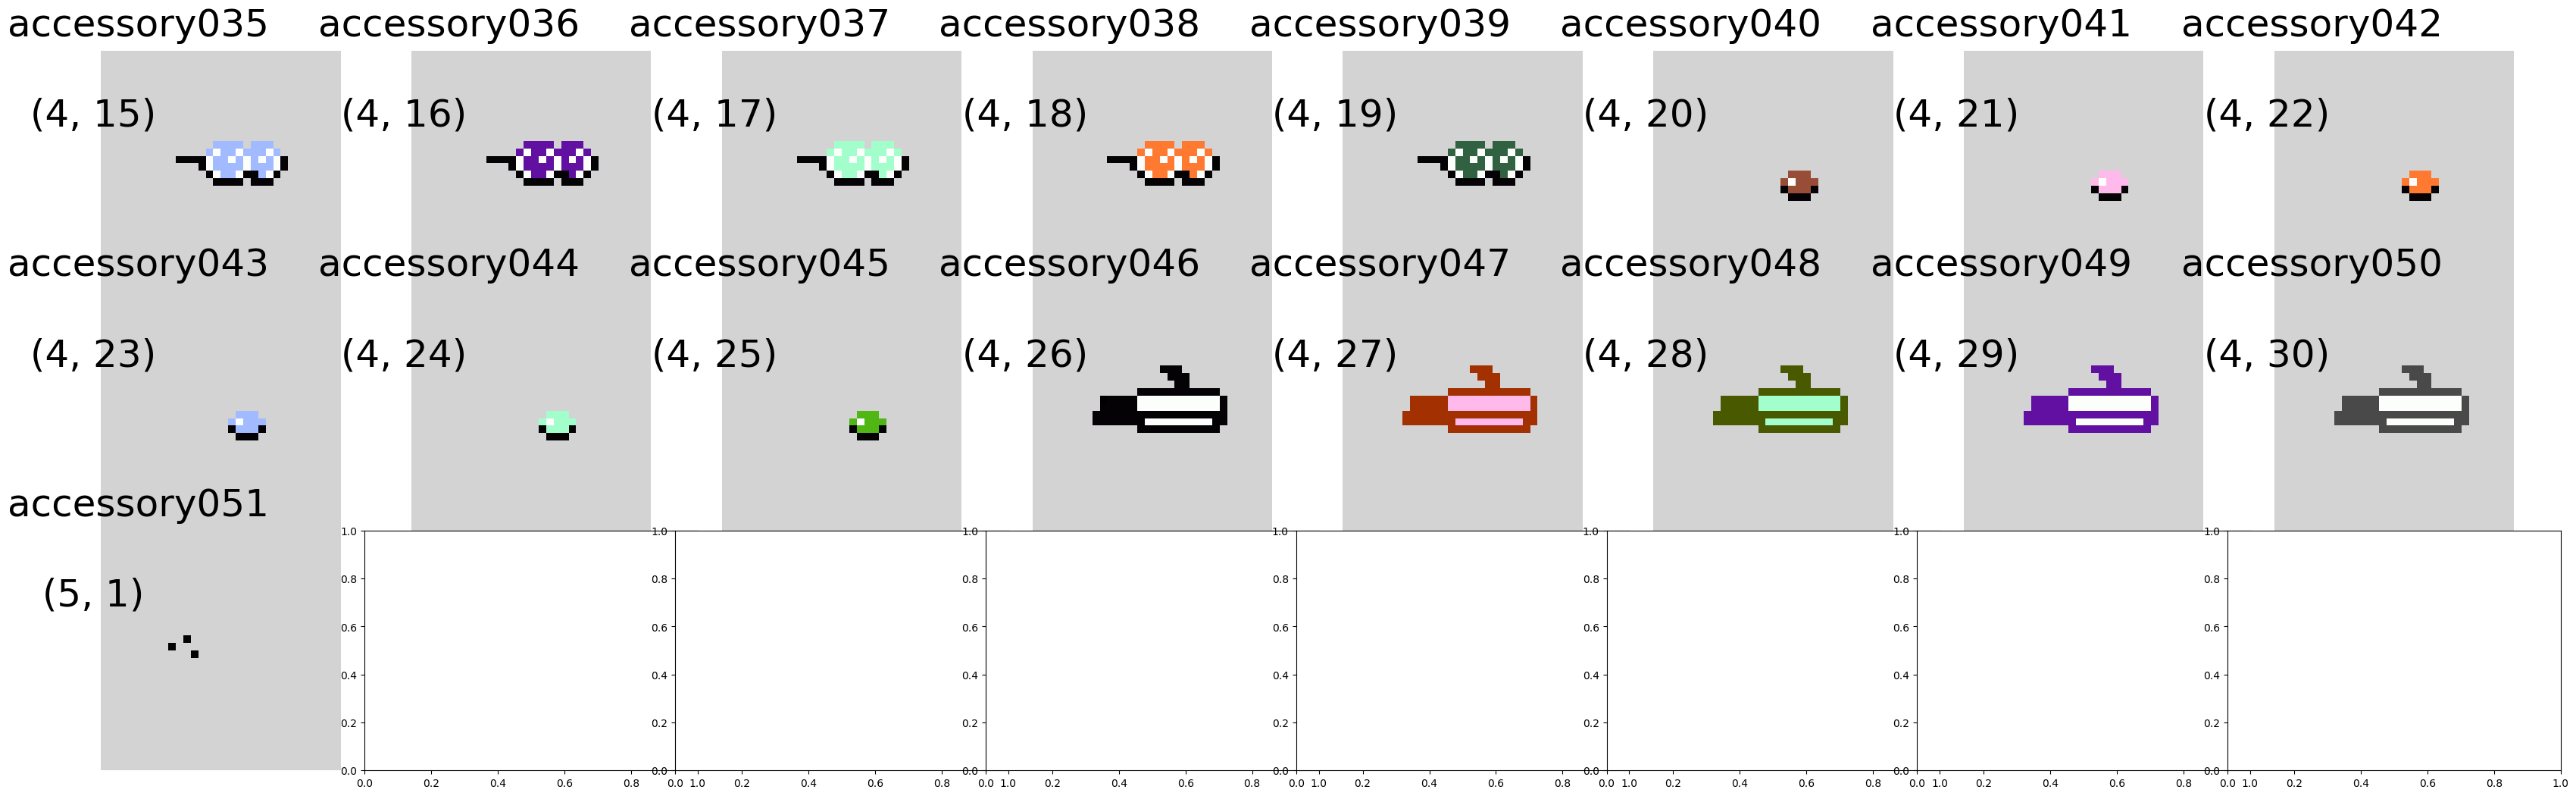

PACK 4


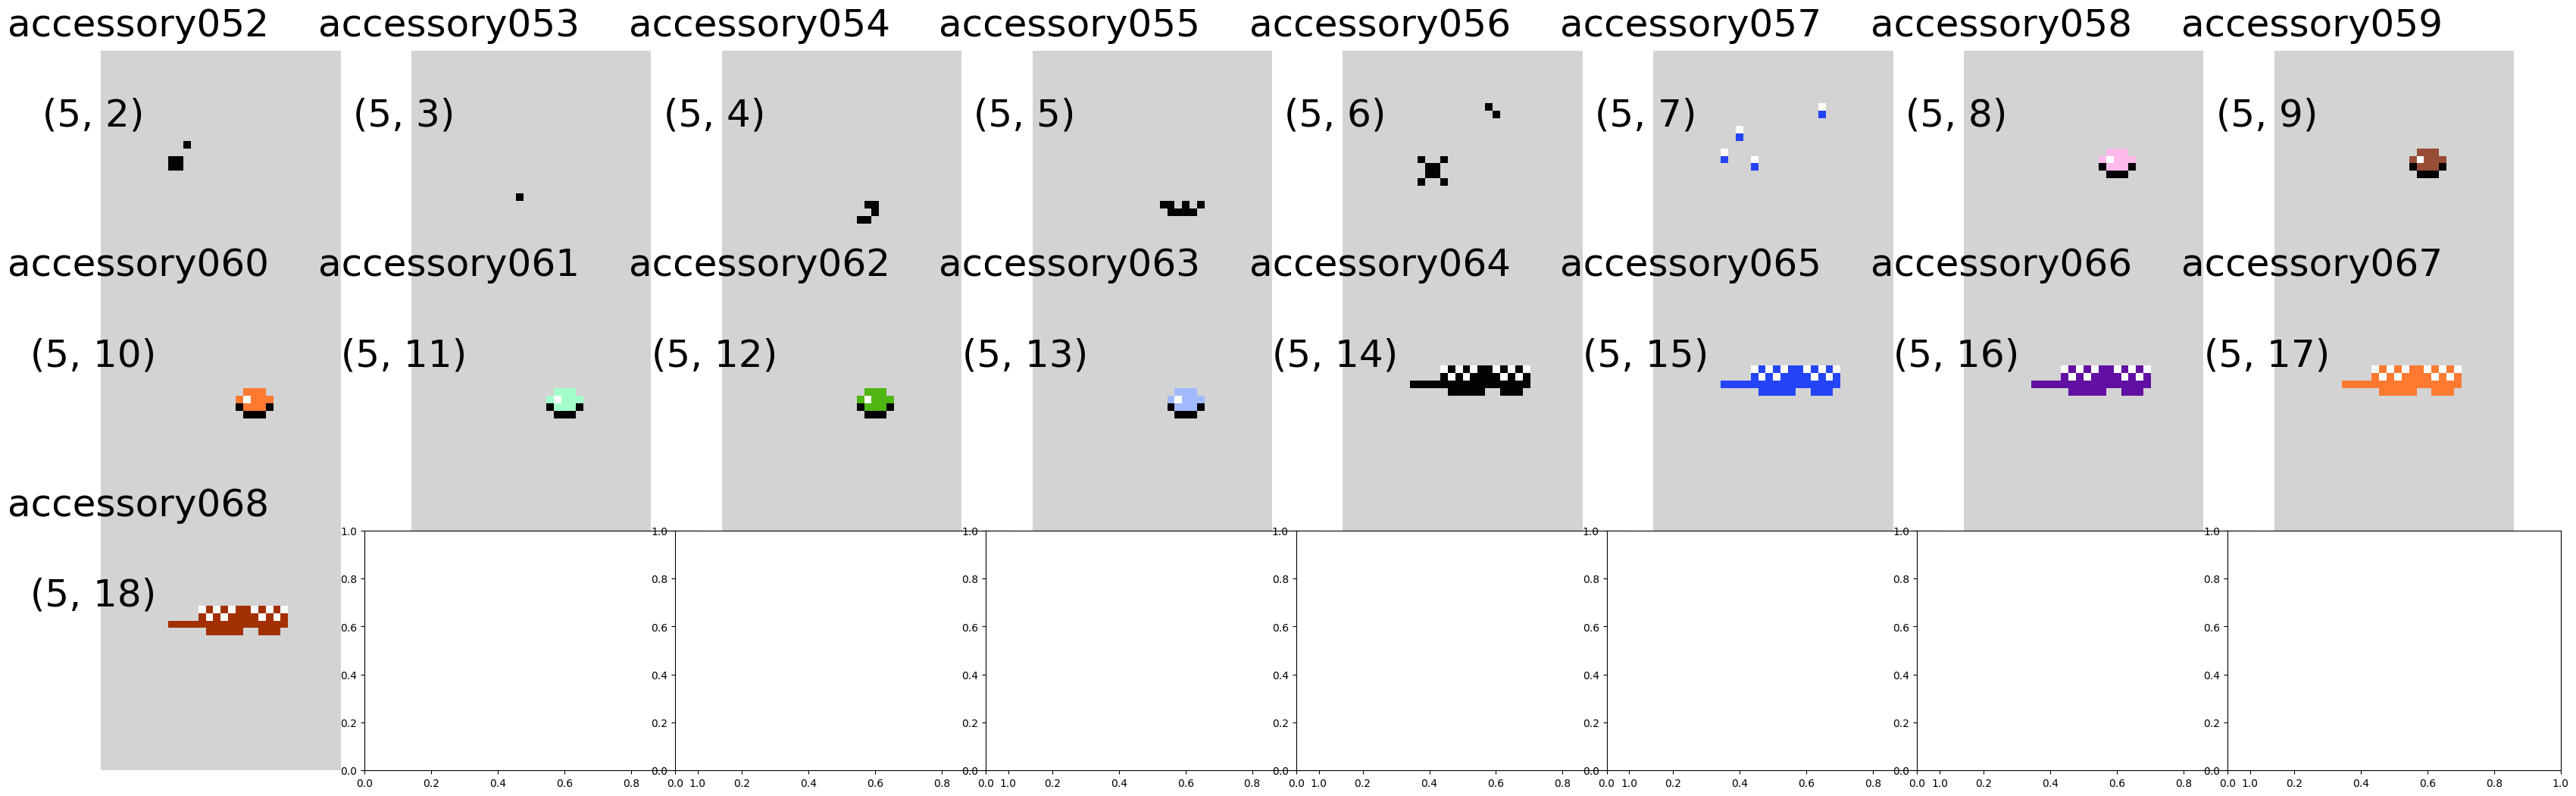

PACK 5


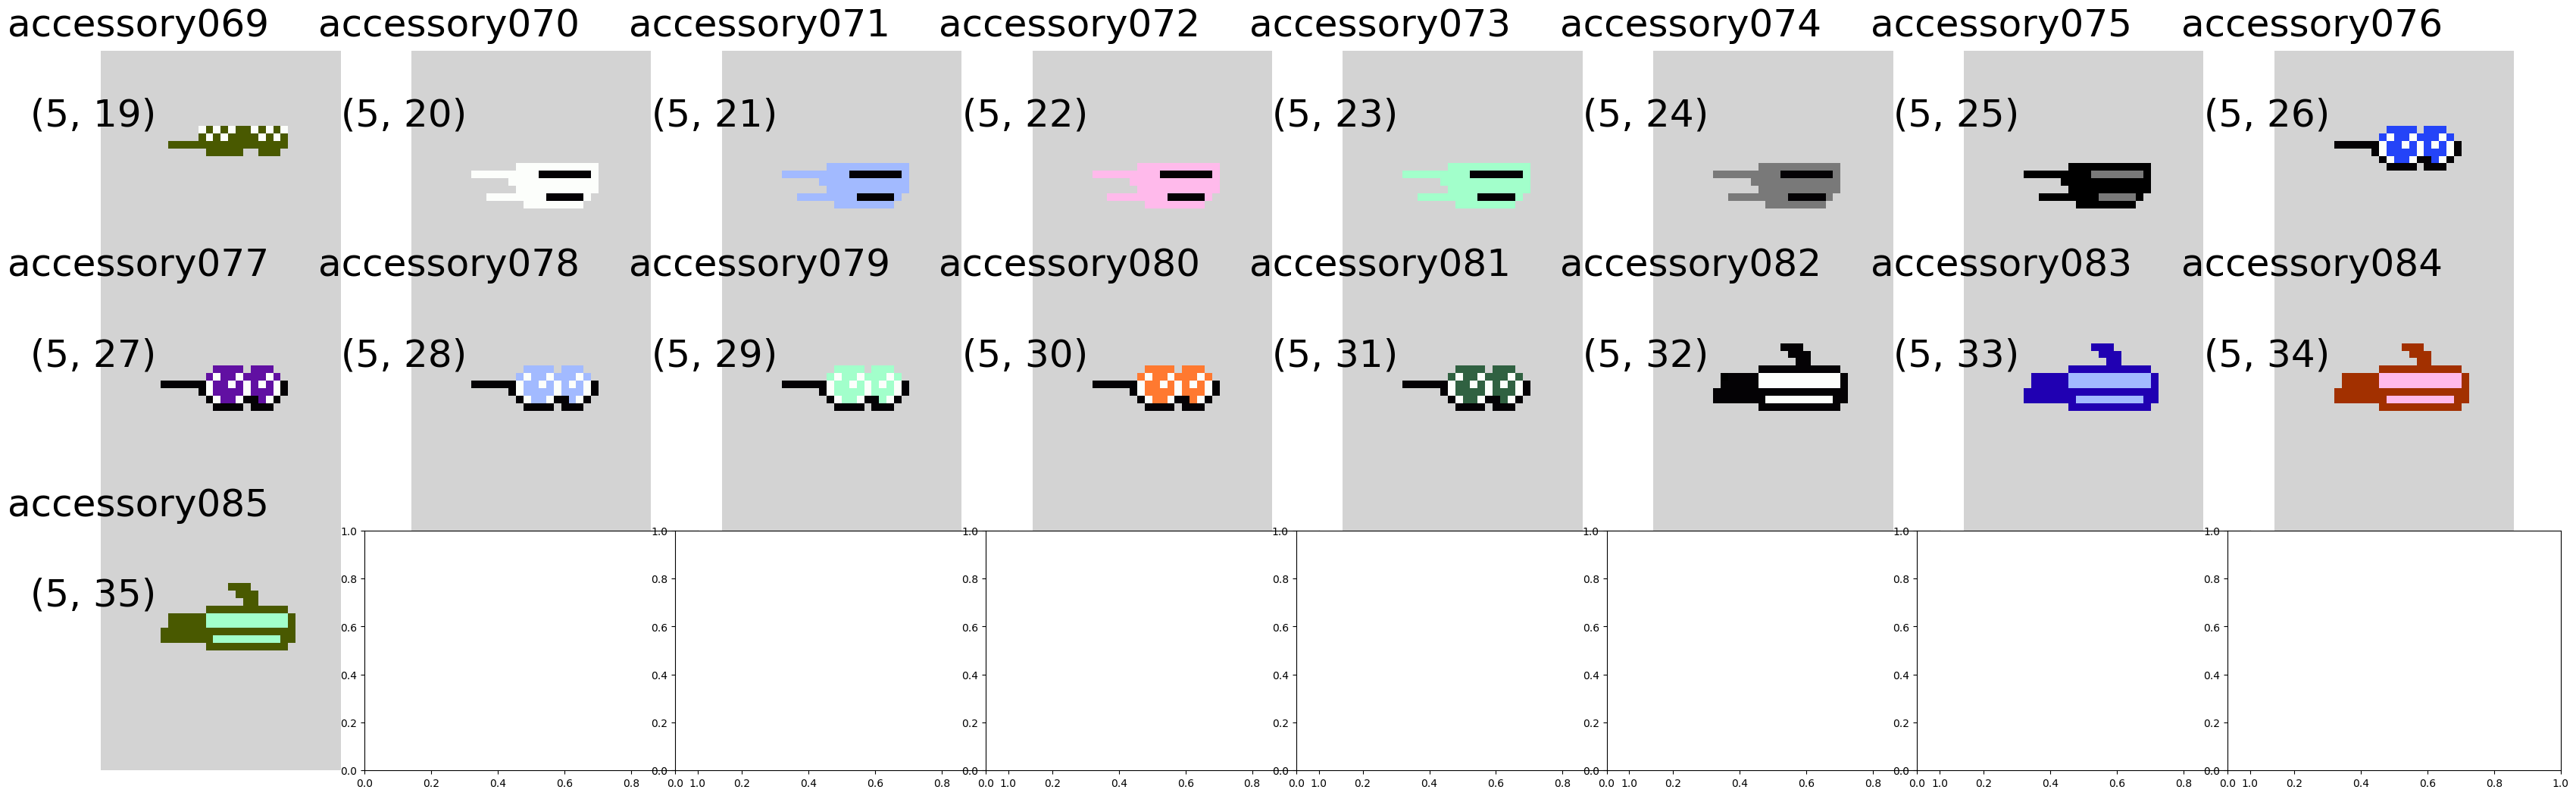

PACK 6


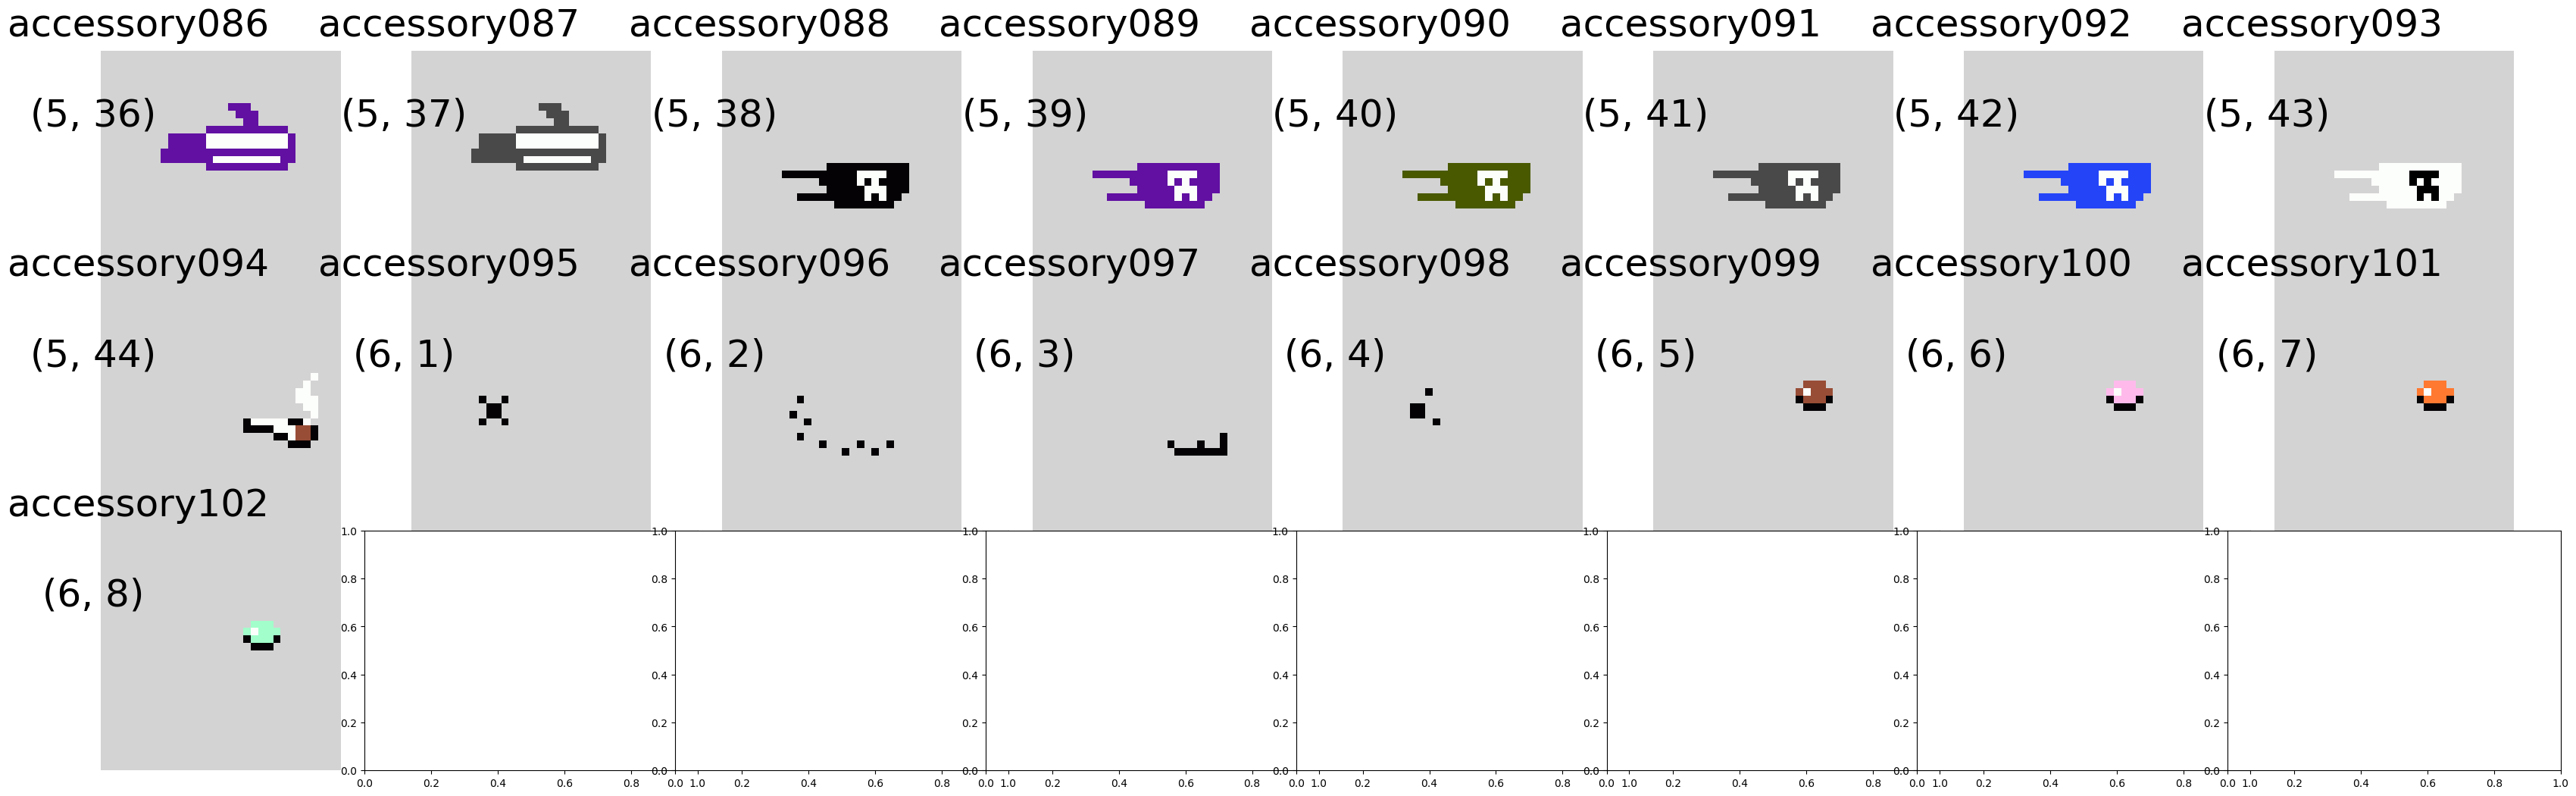

PACK 7


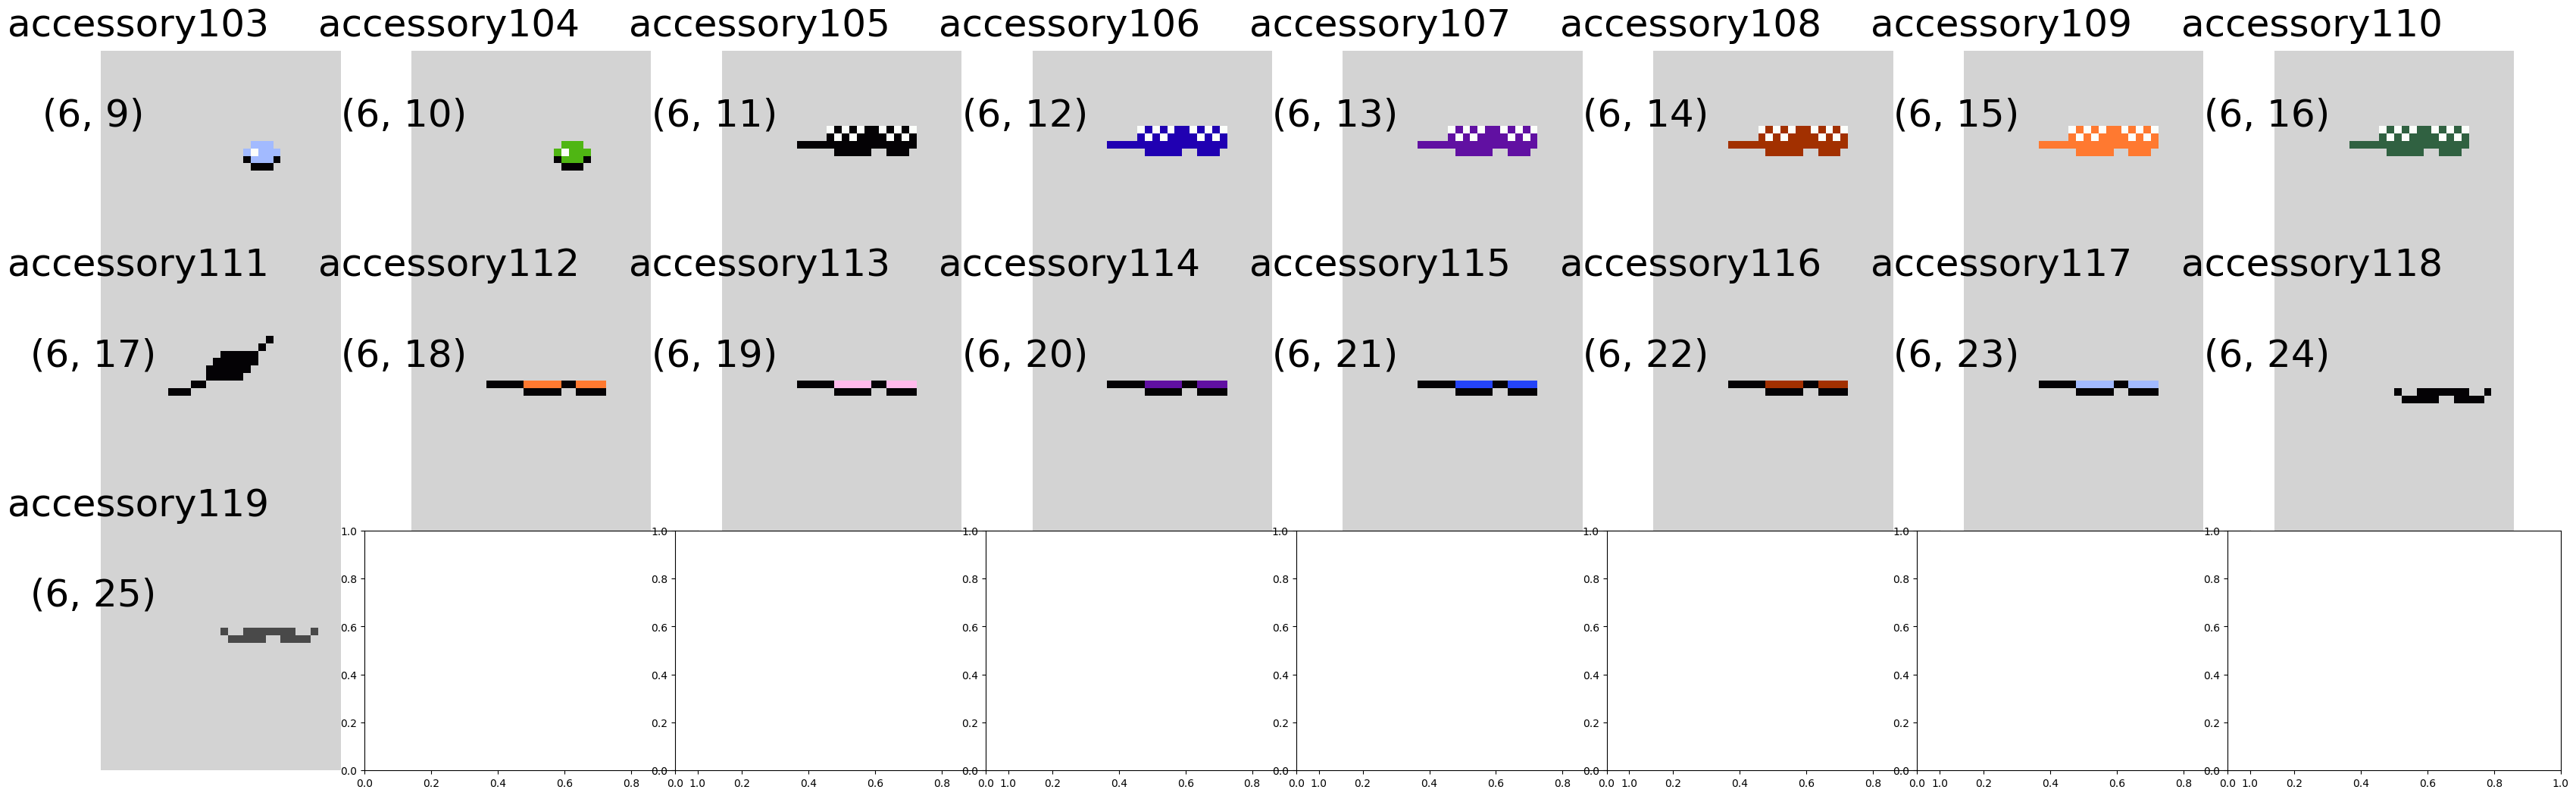

PACK 8


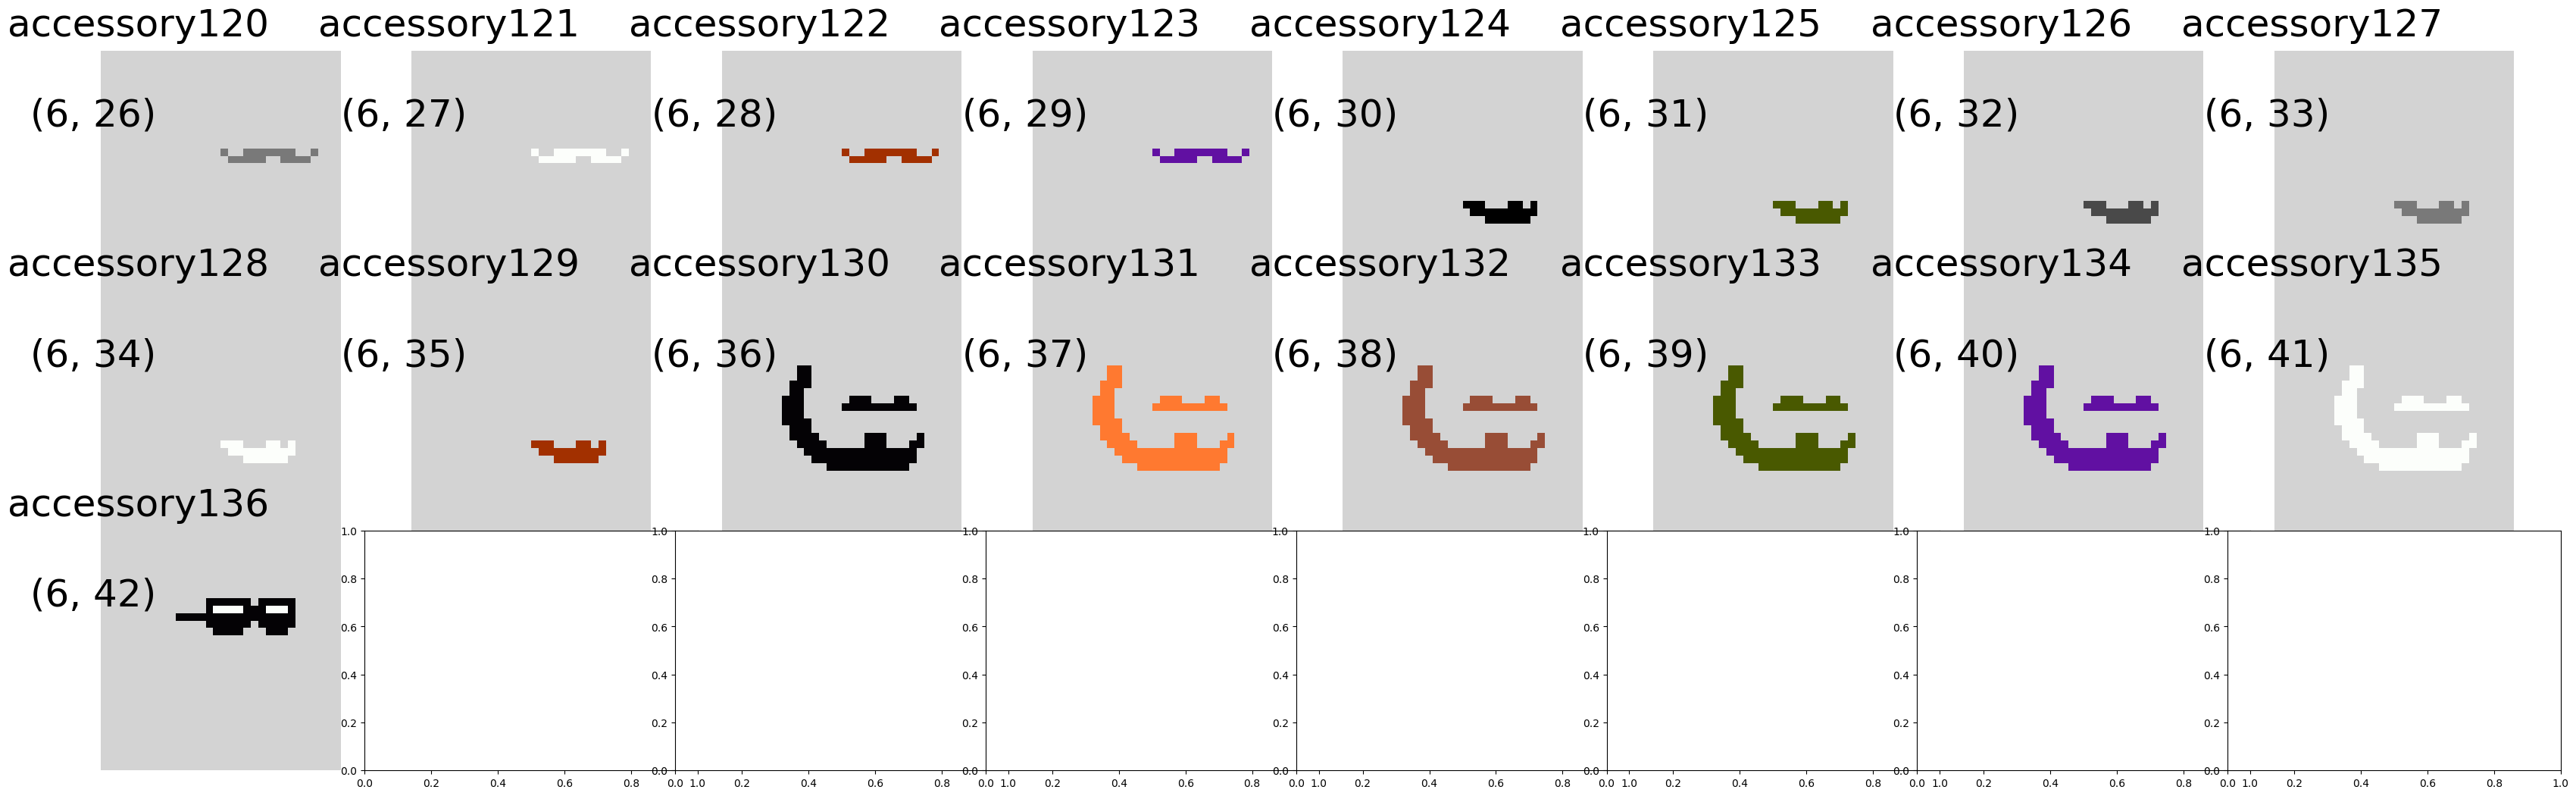

PACK 9


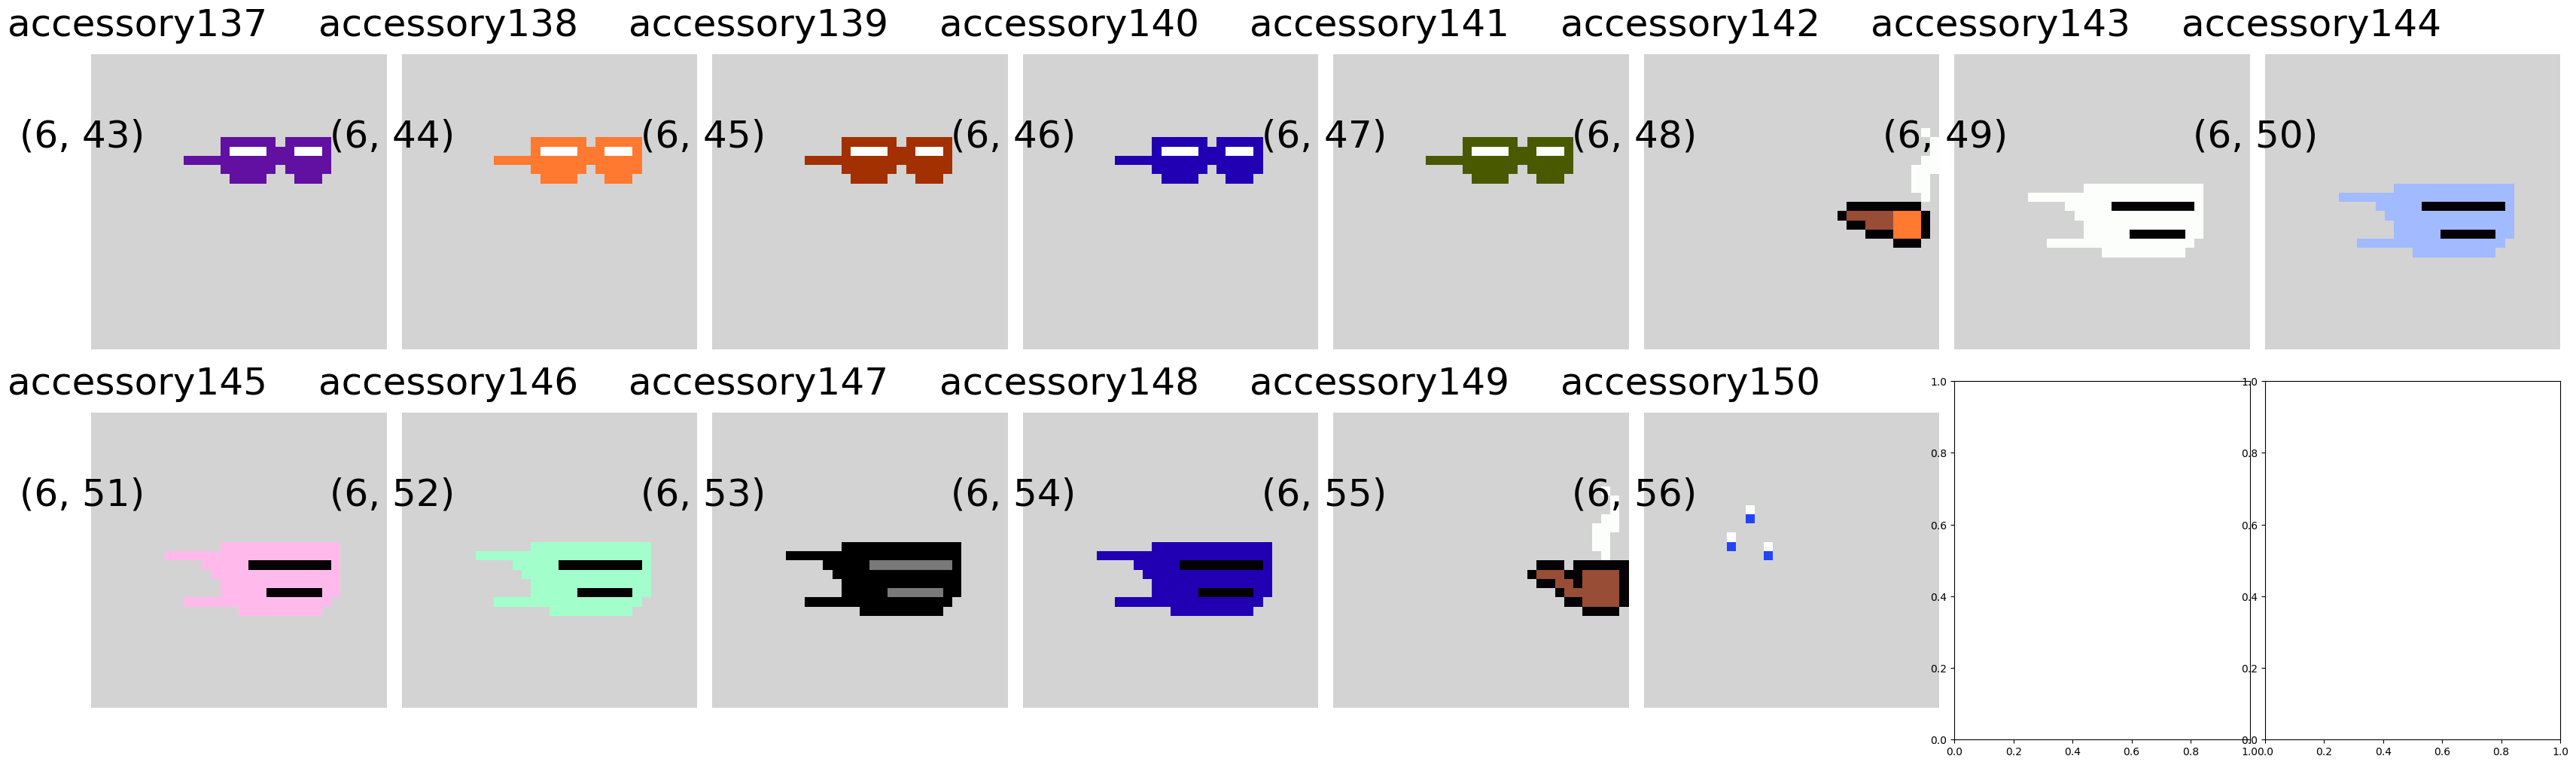

PACK 1


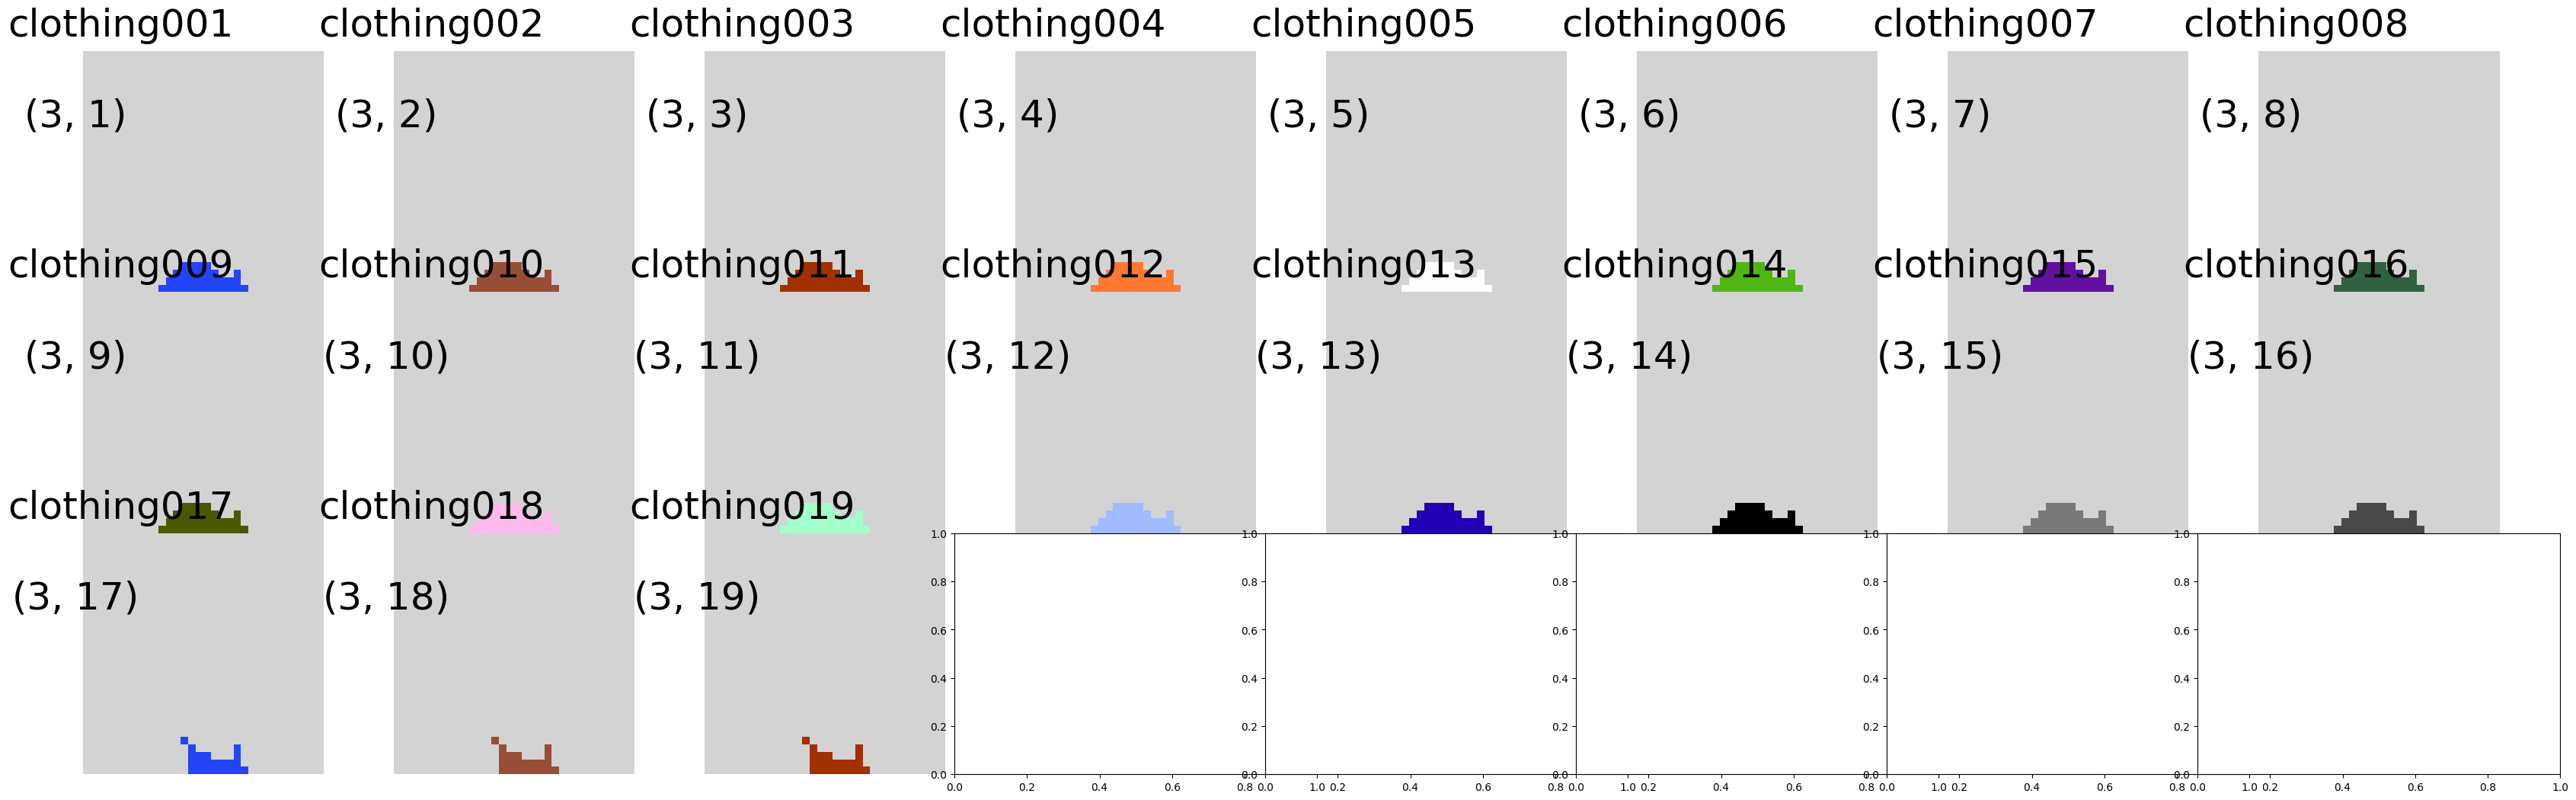

PACK 2


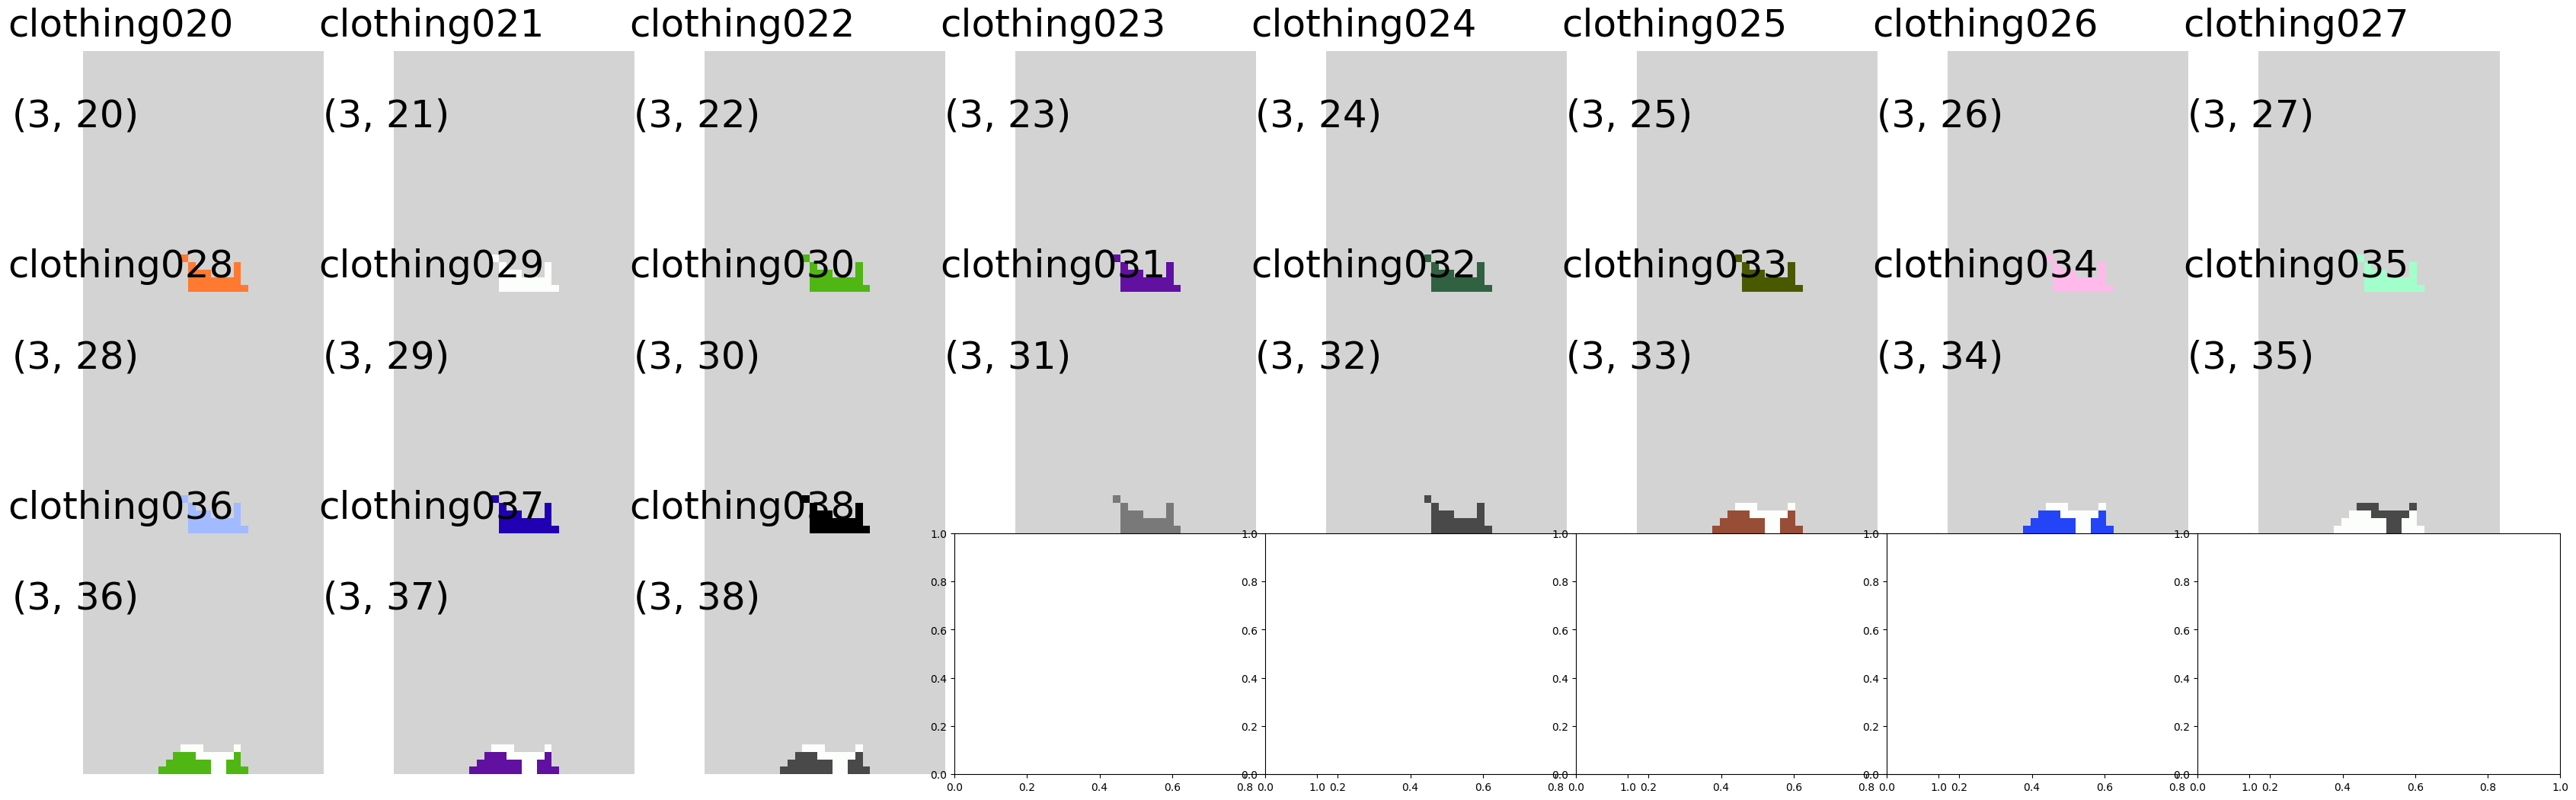

PACK 3


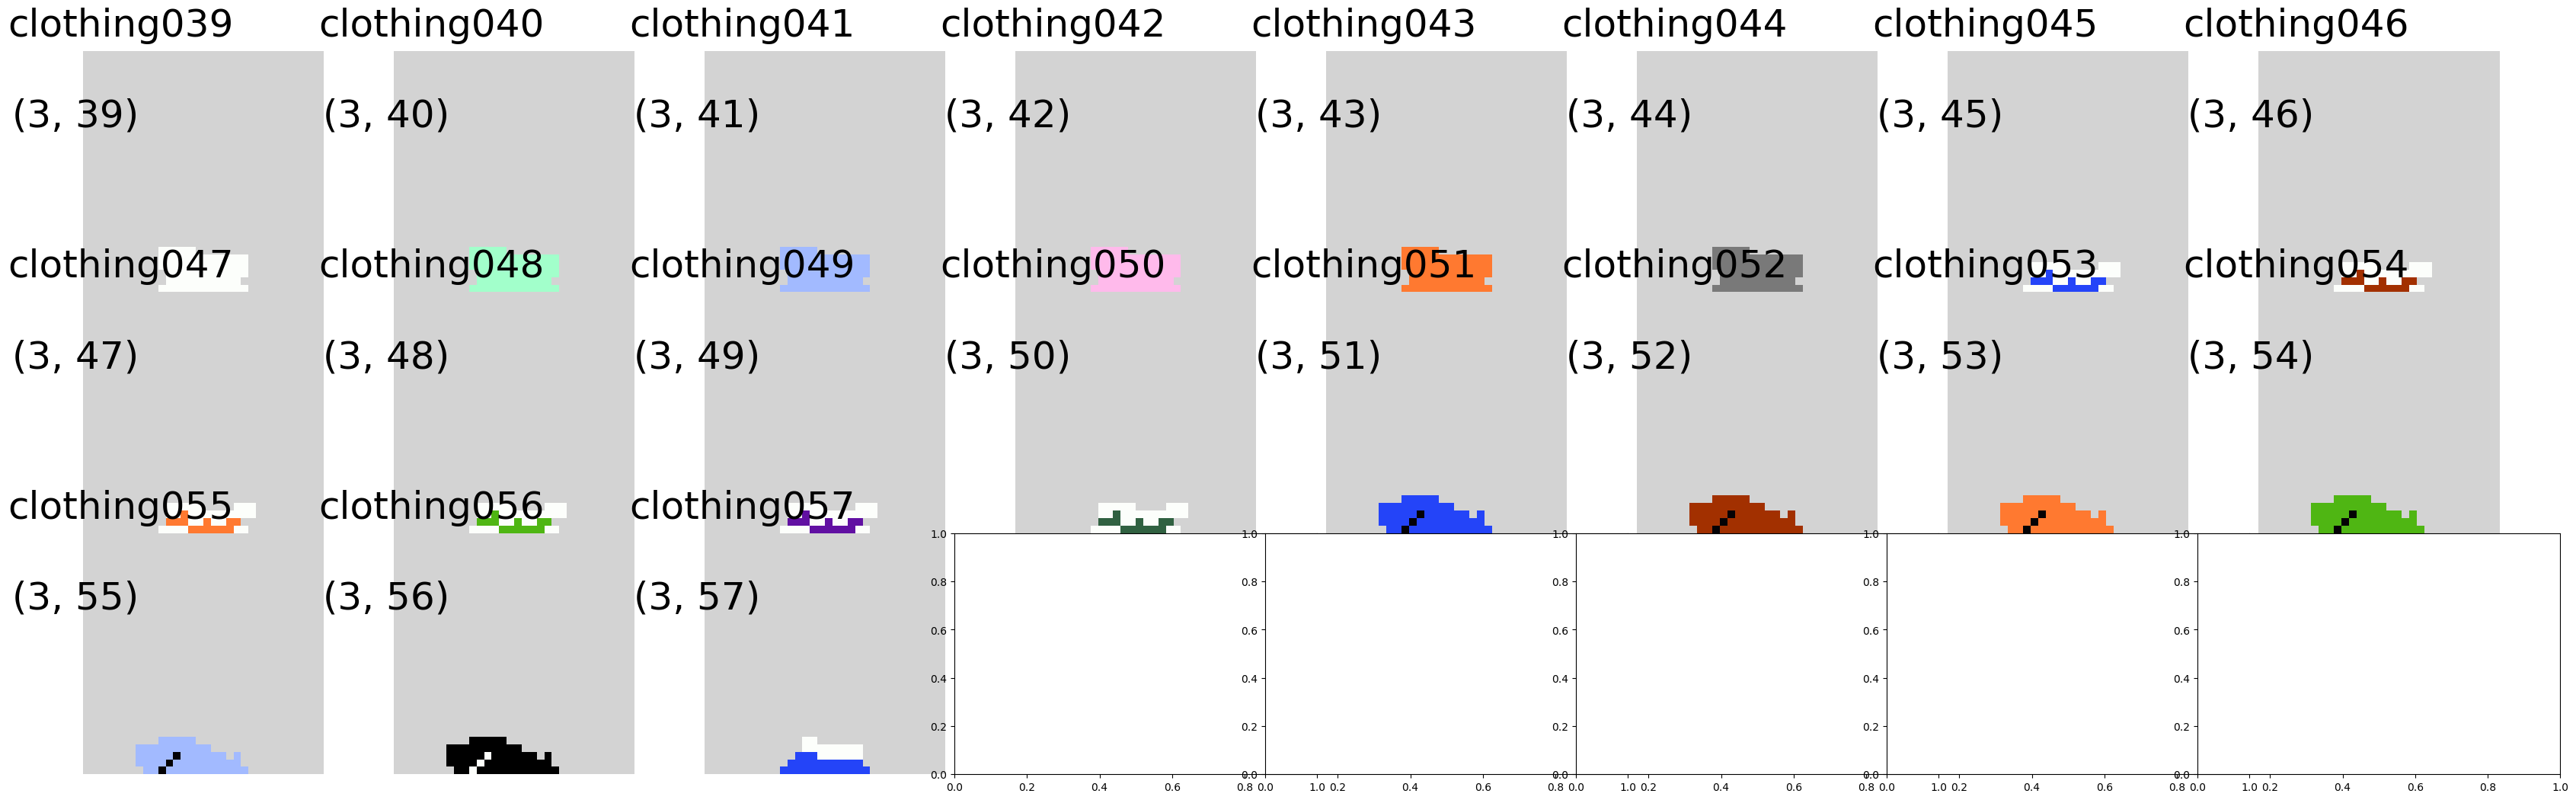

PACK 4


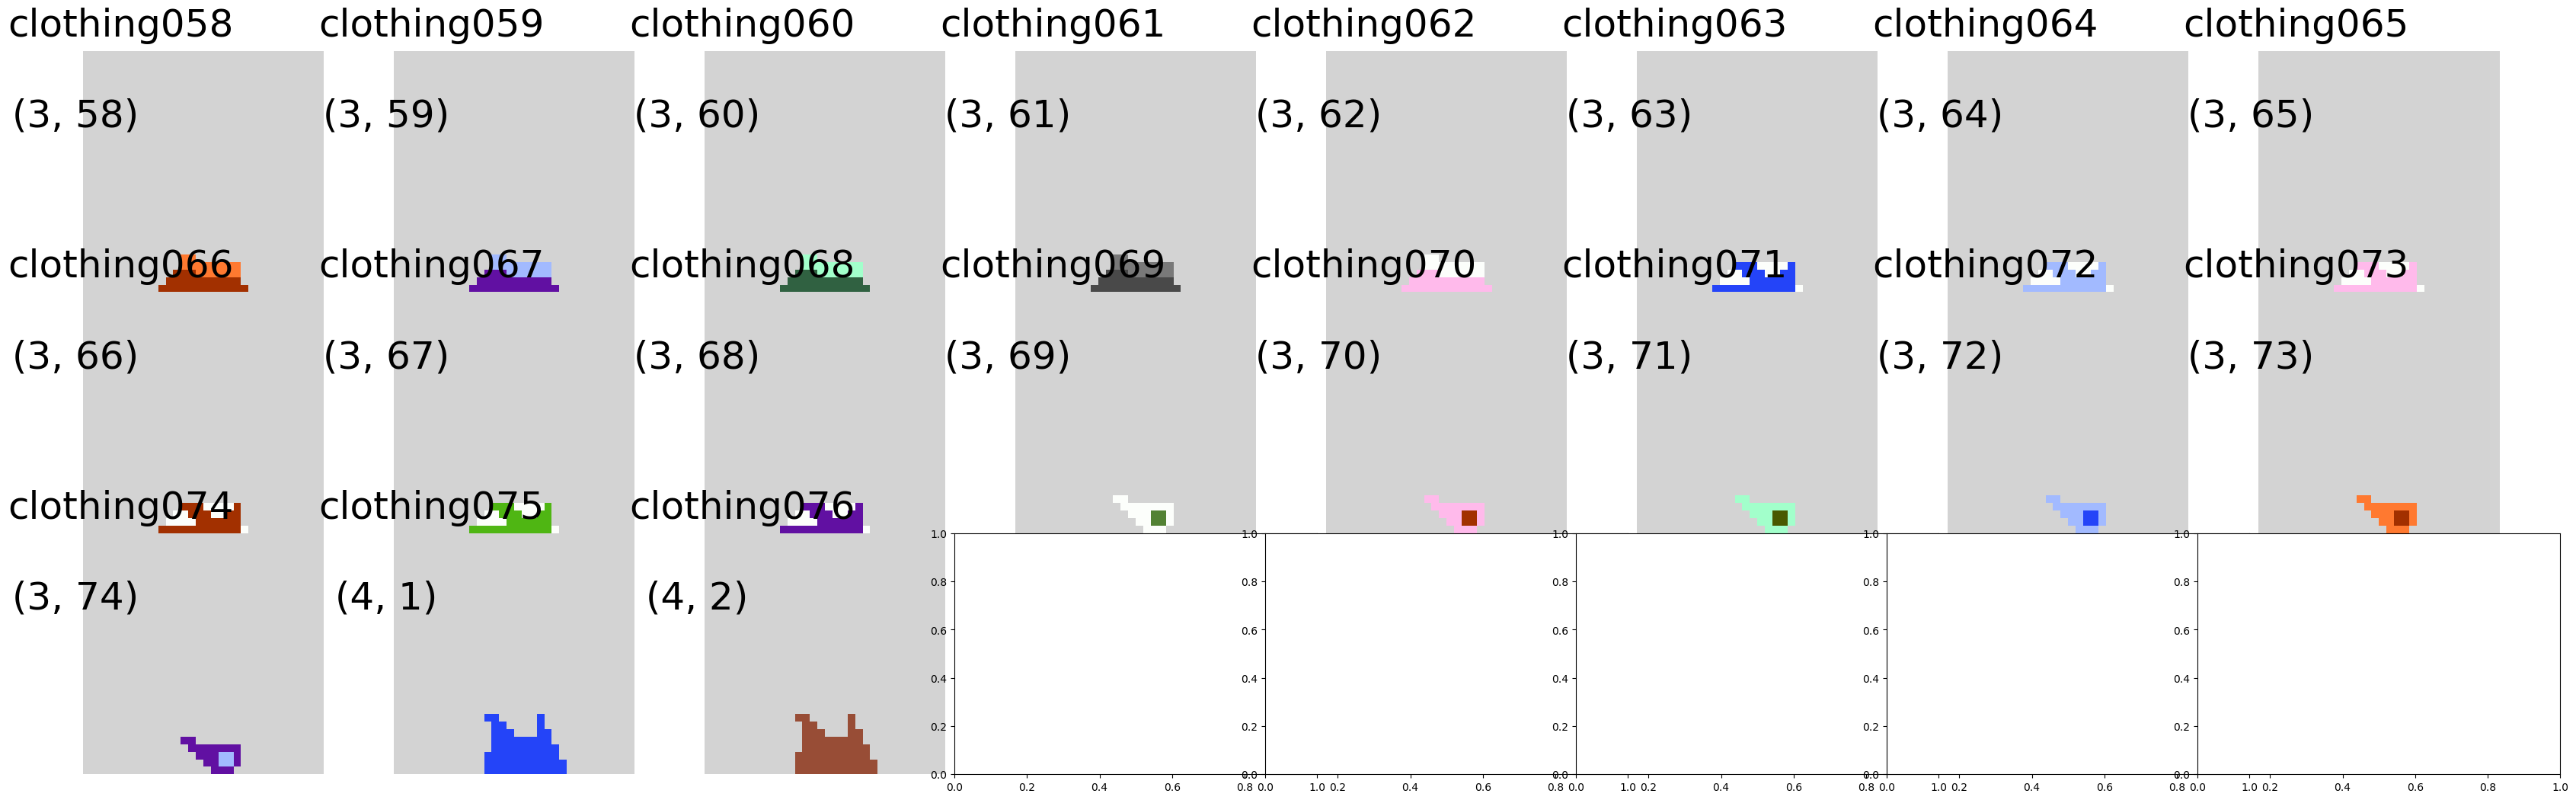

PACK 5


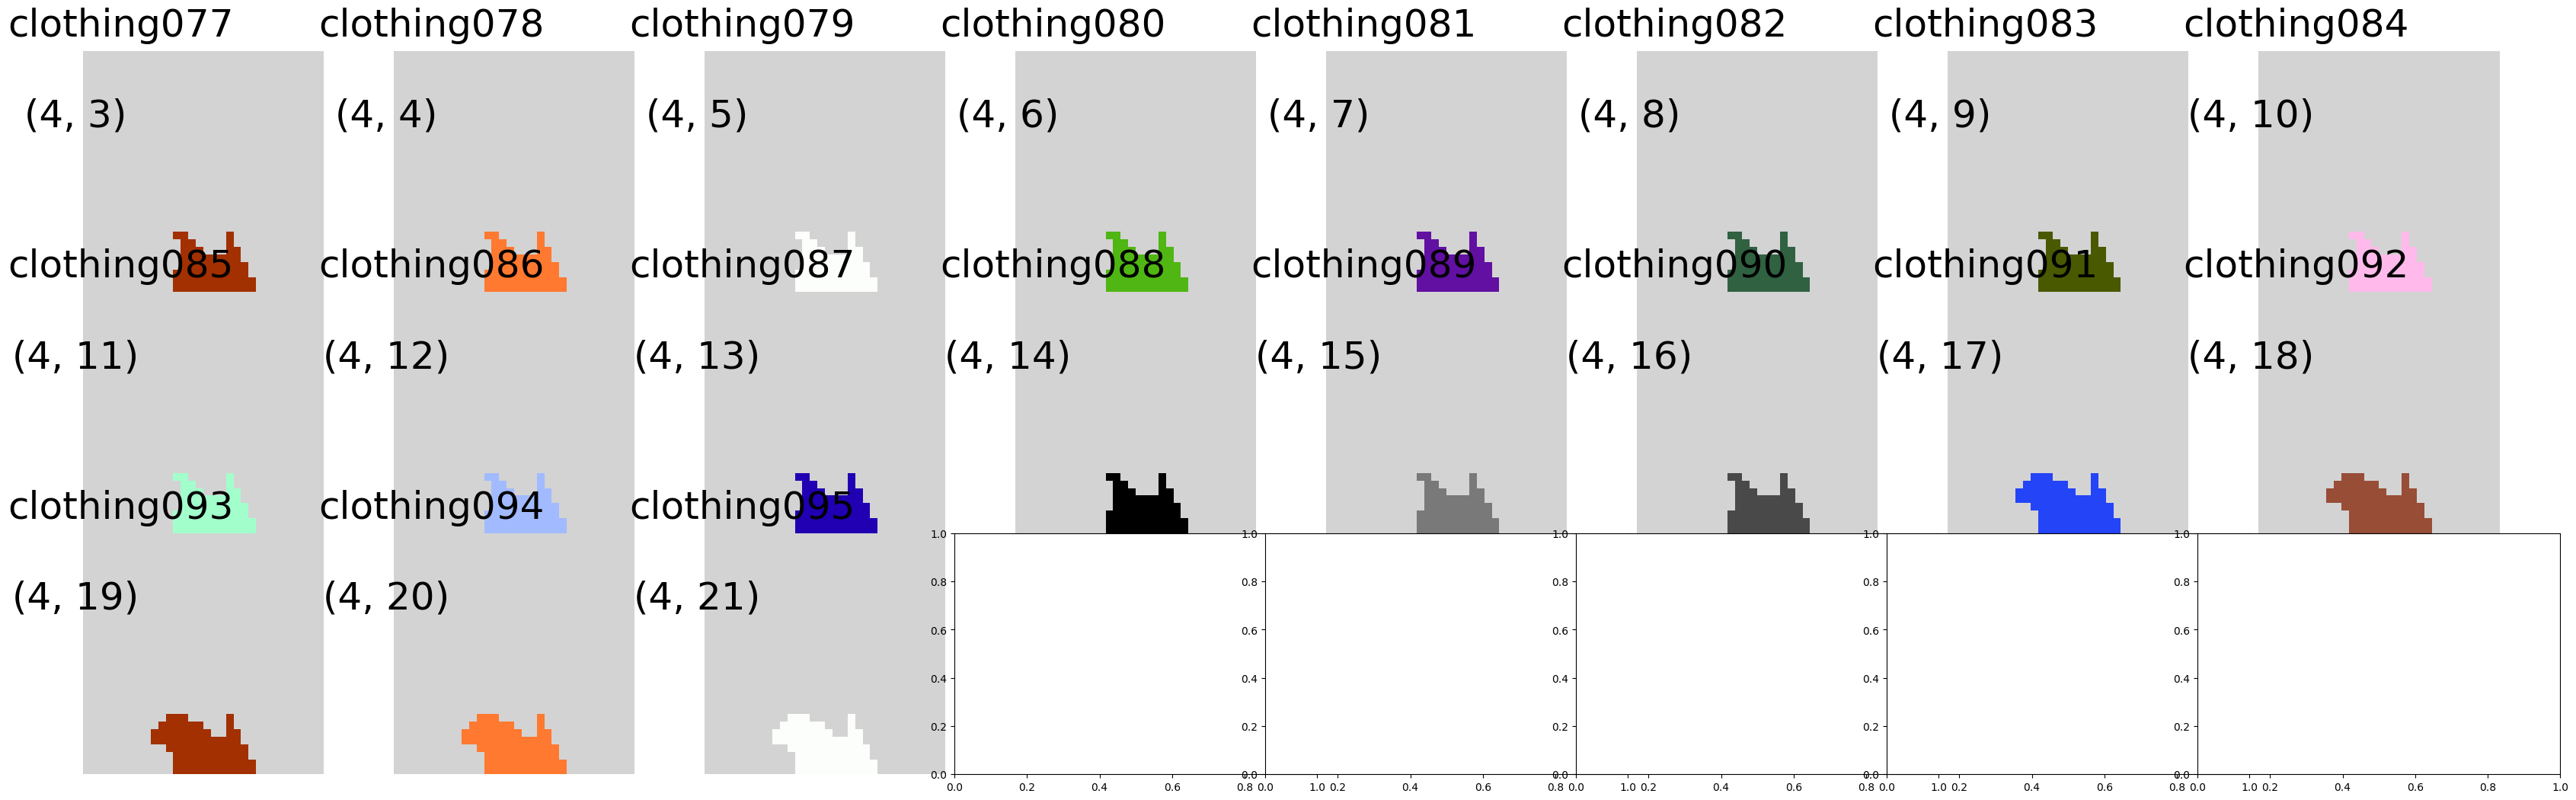

PACK 6


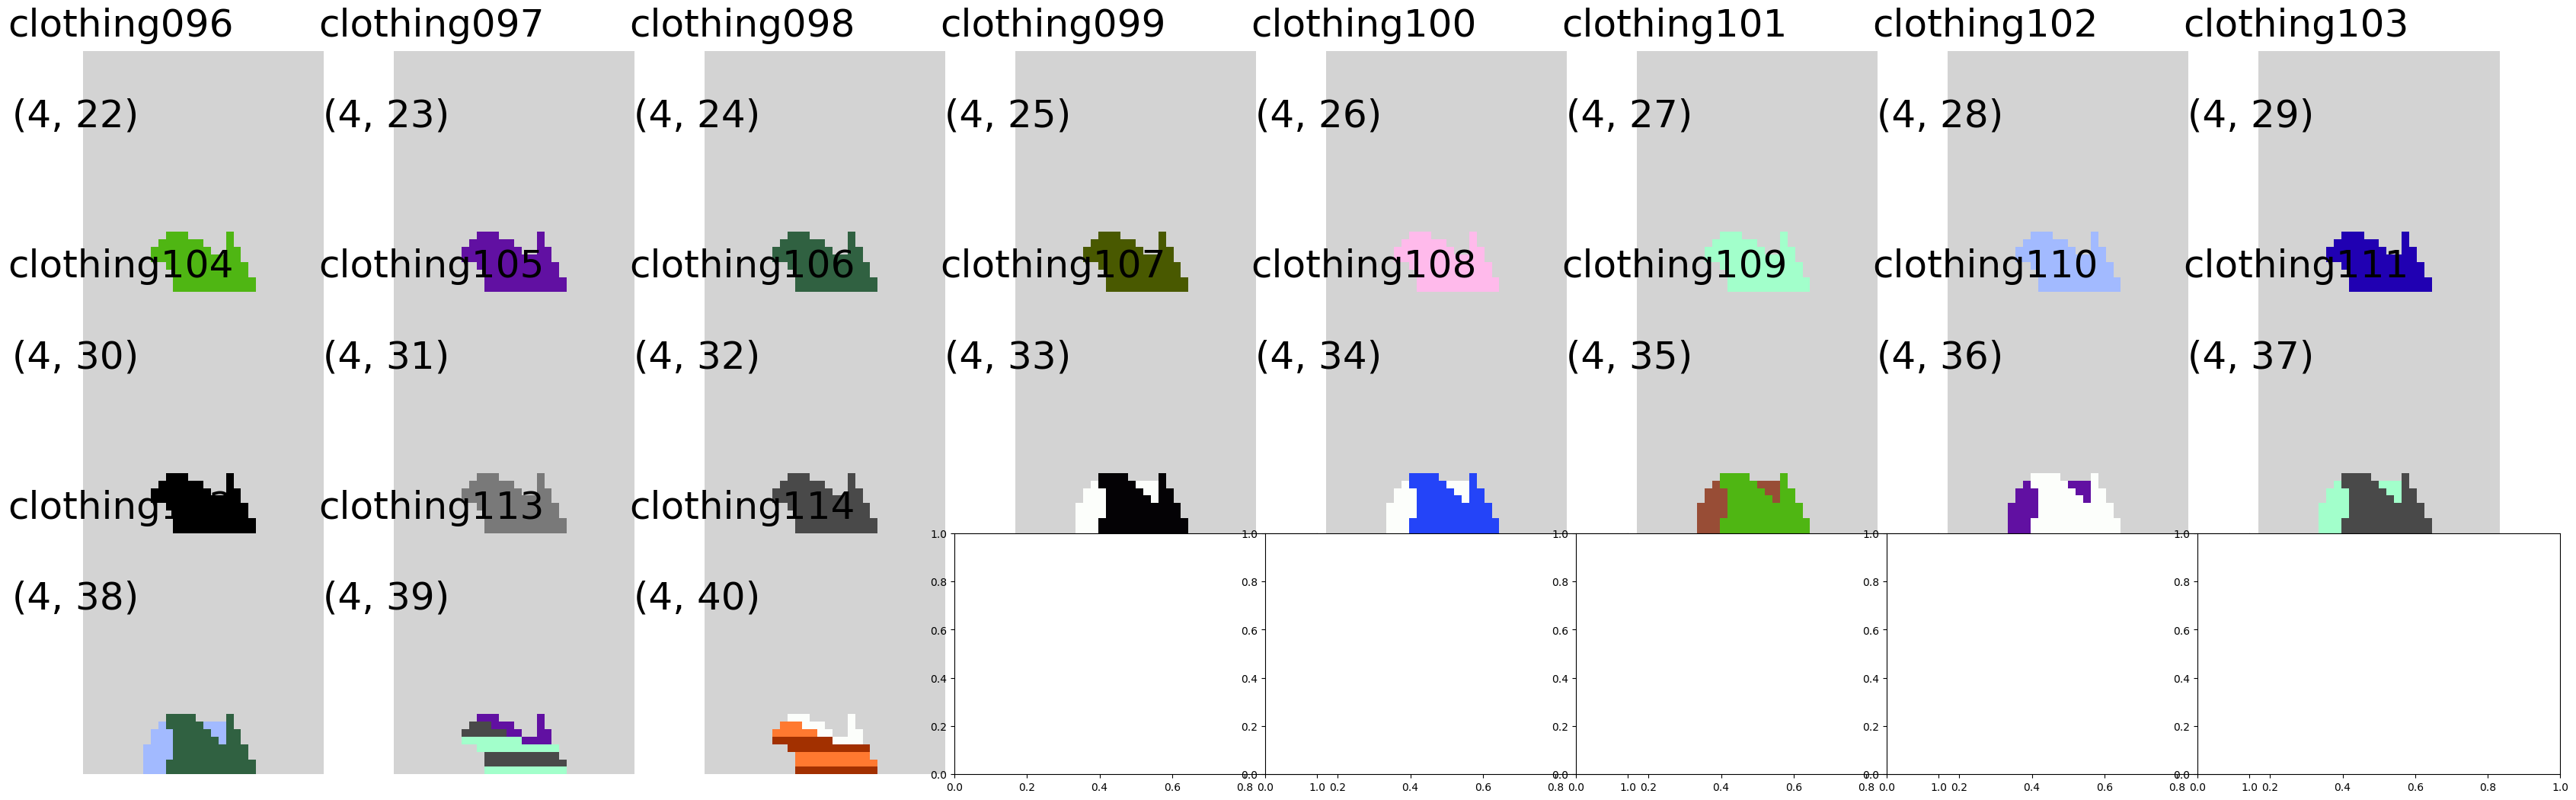

PACK 7


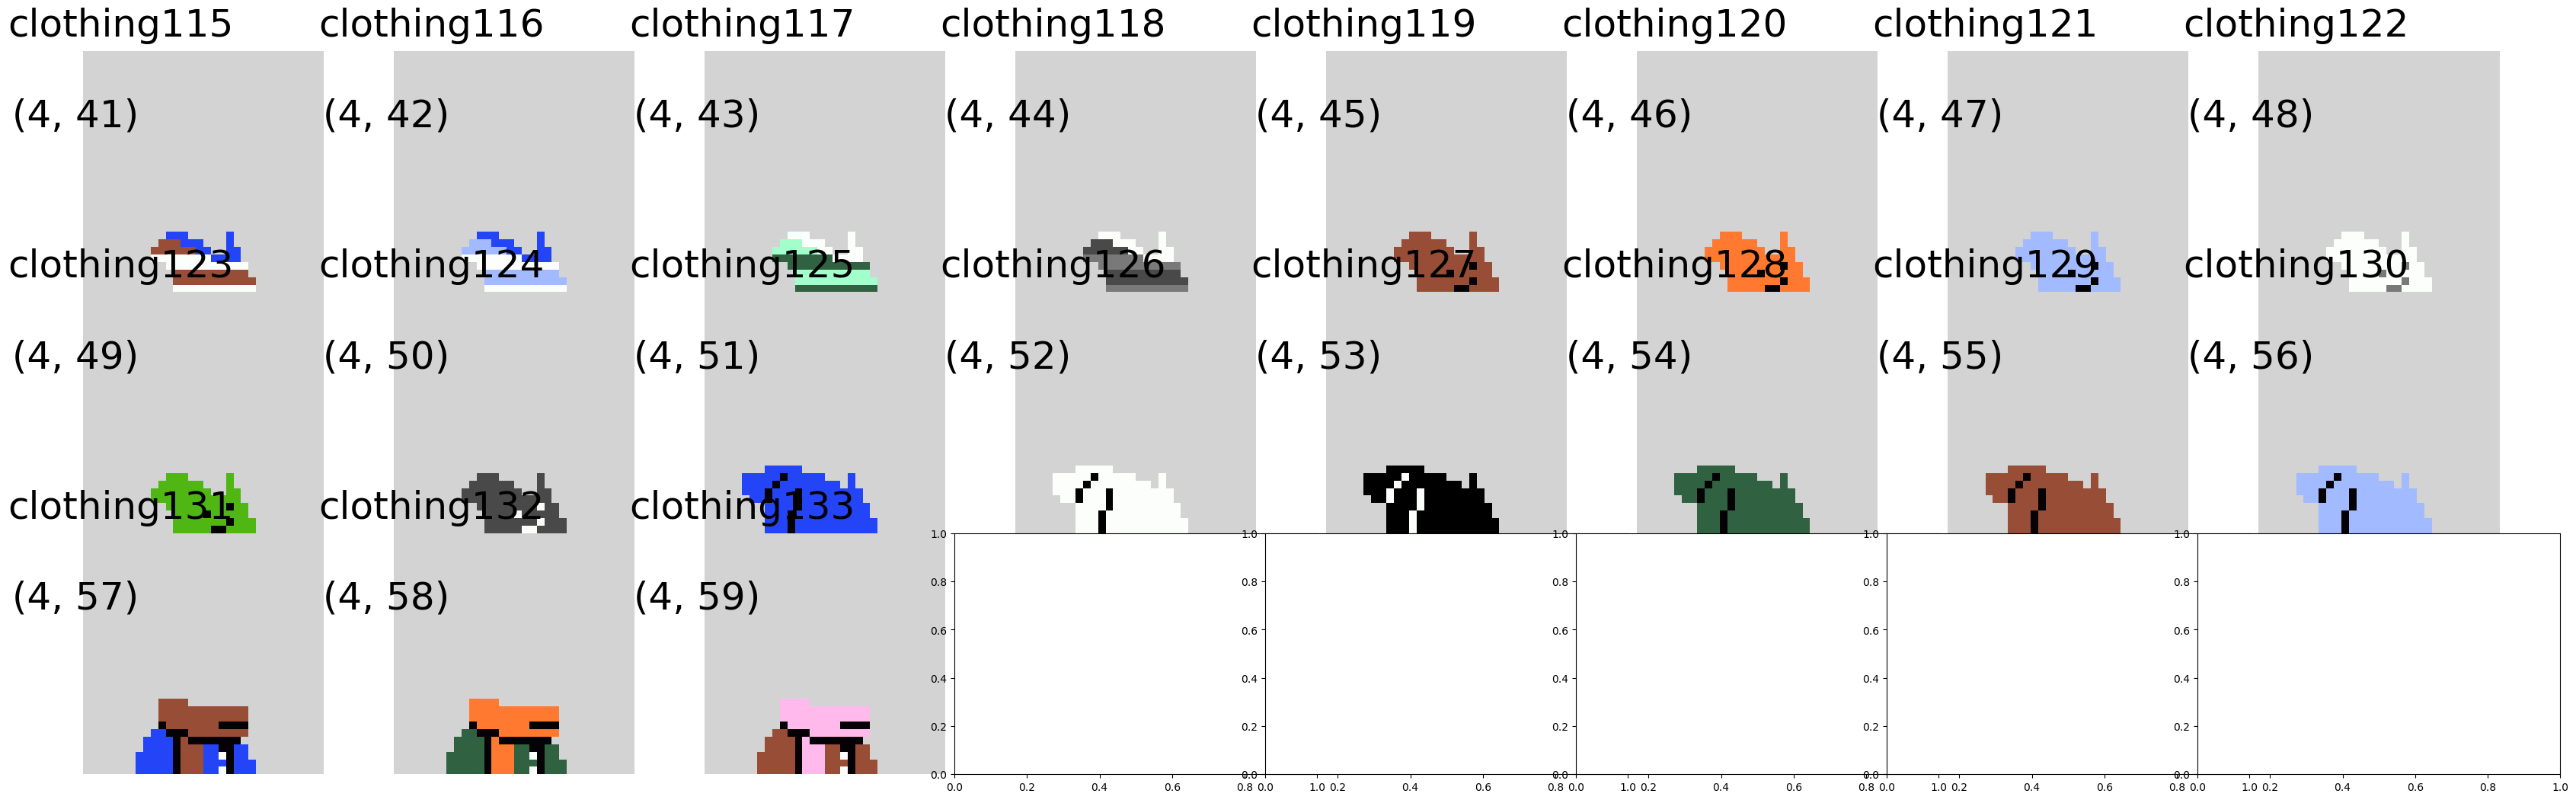

PACK 8


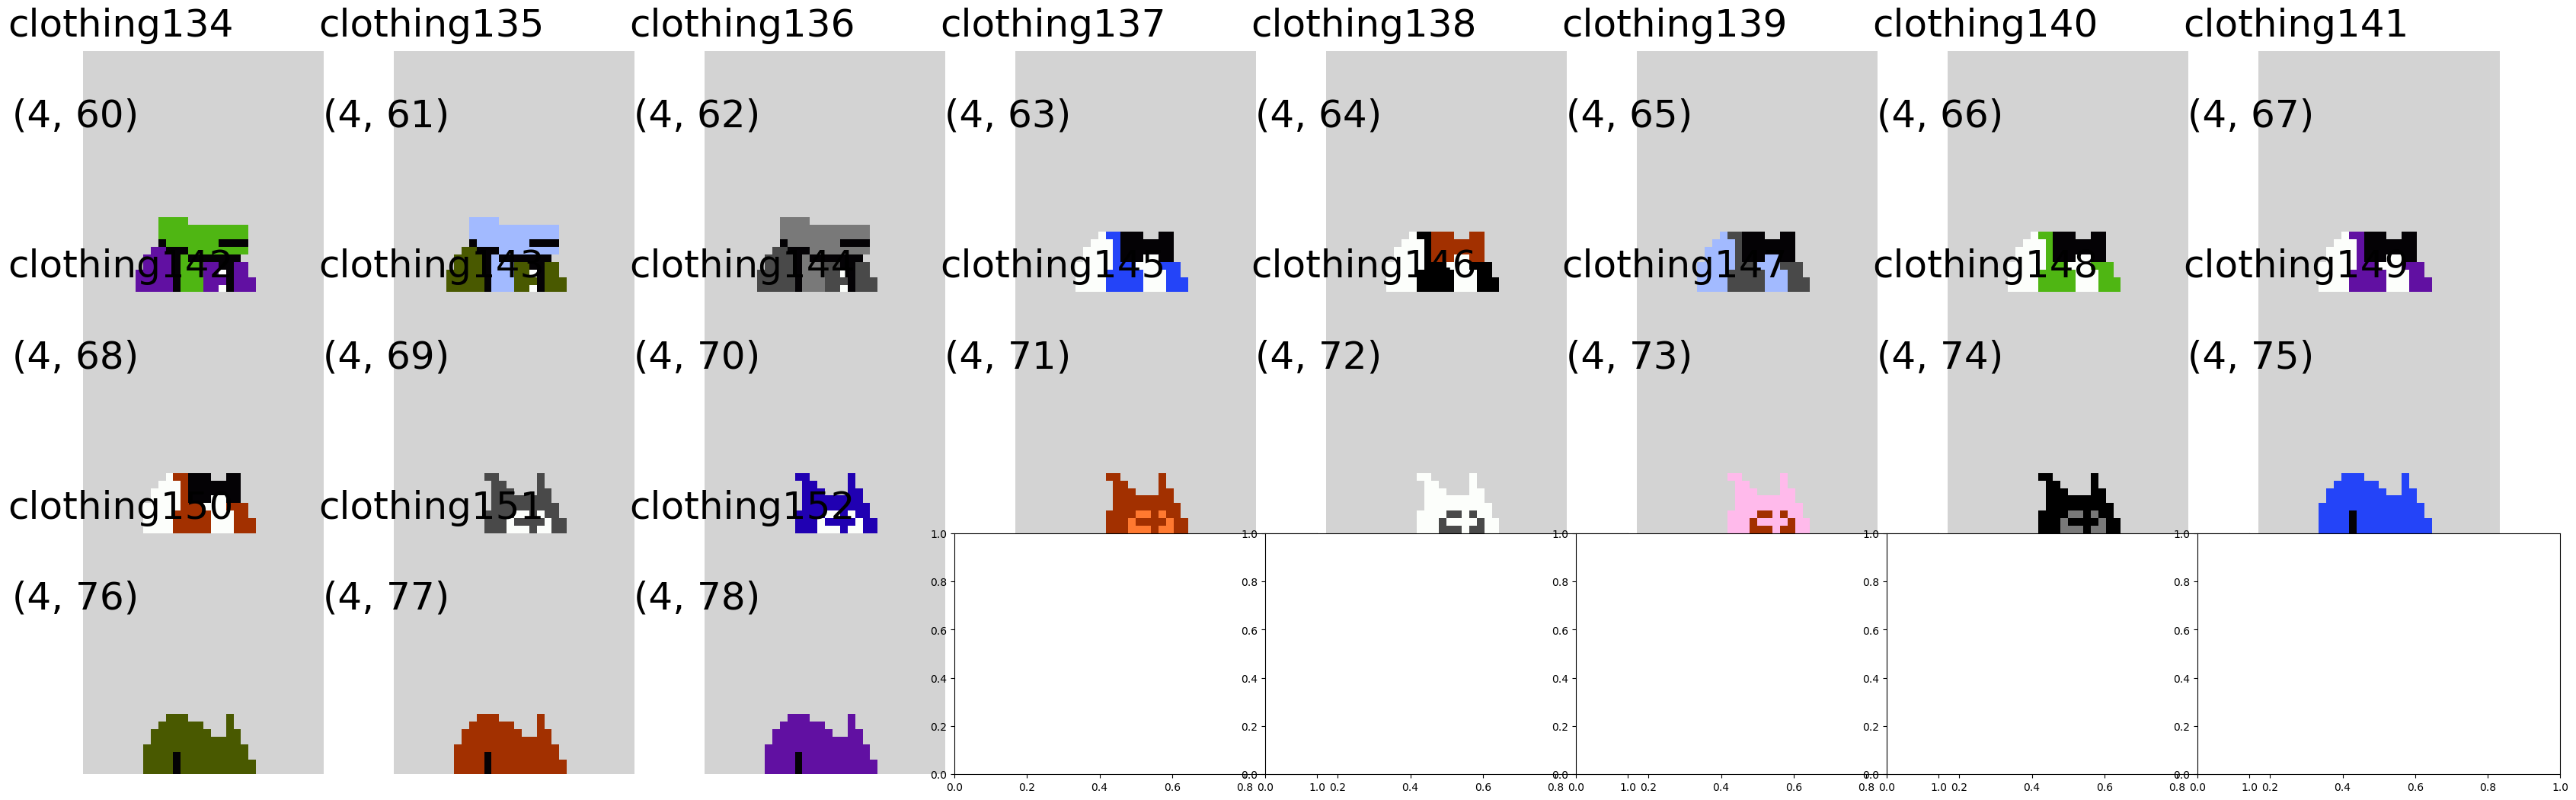

PACK 9


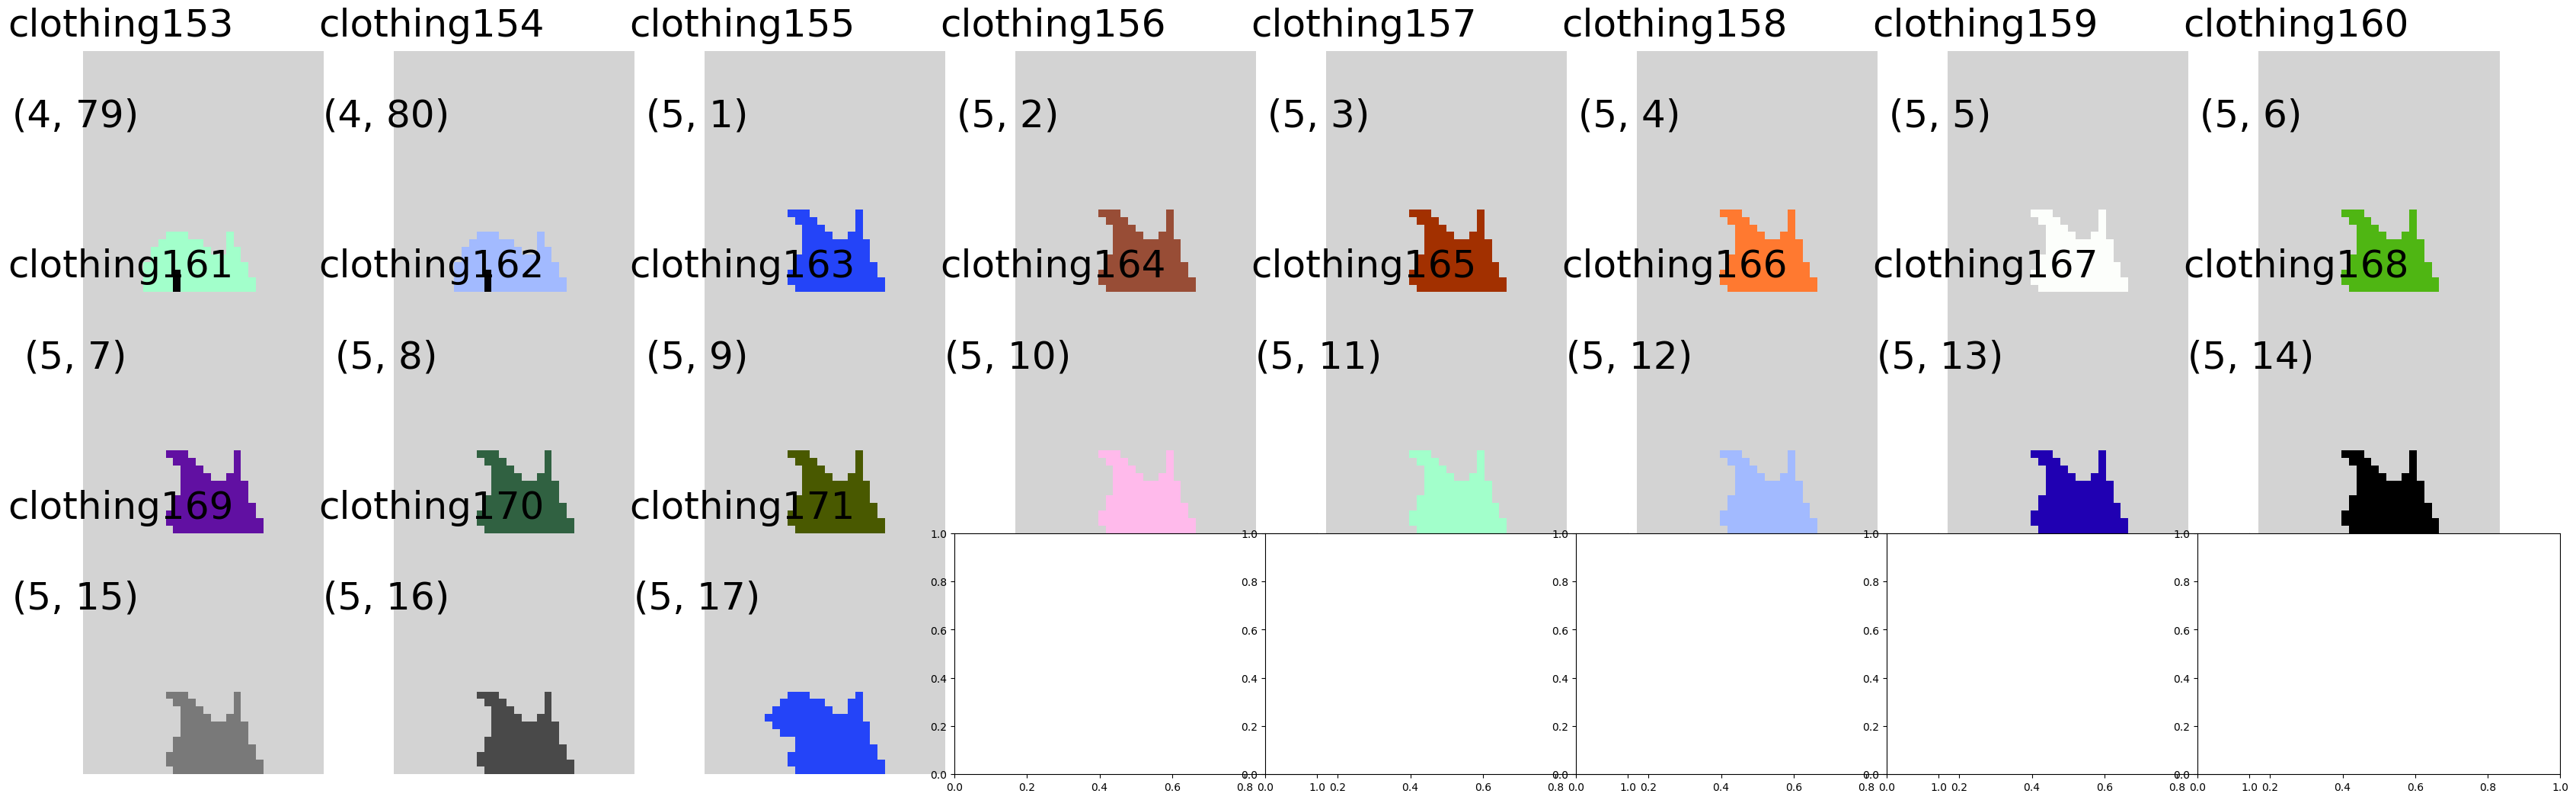

PACK 10


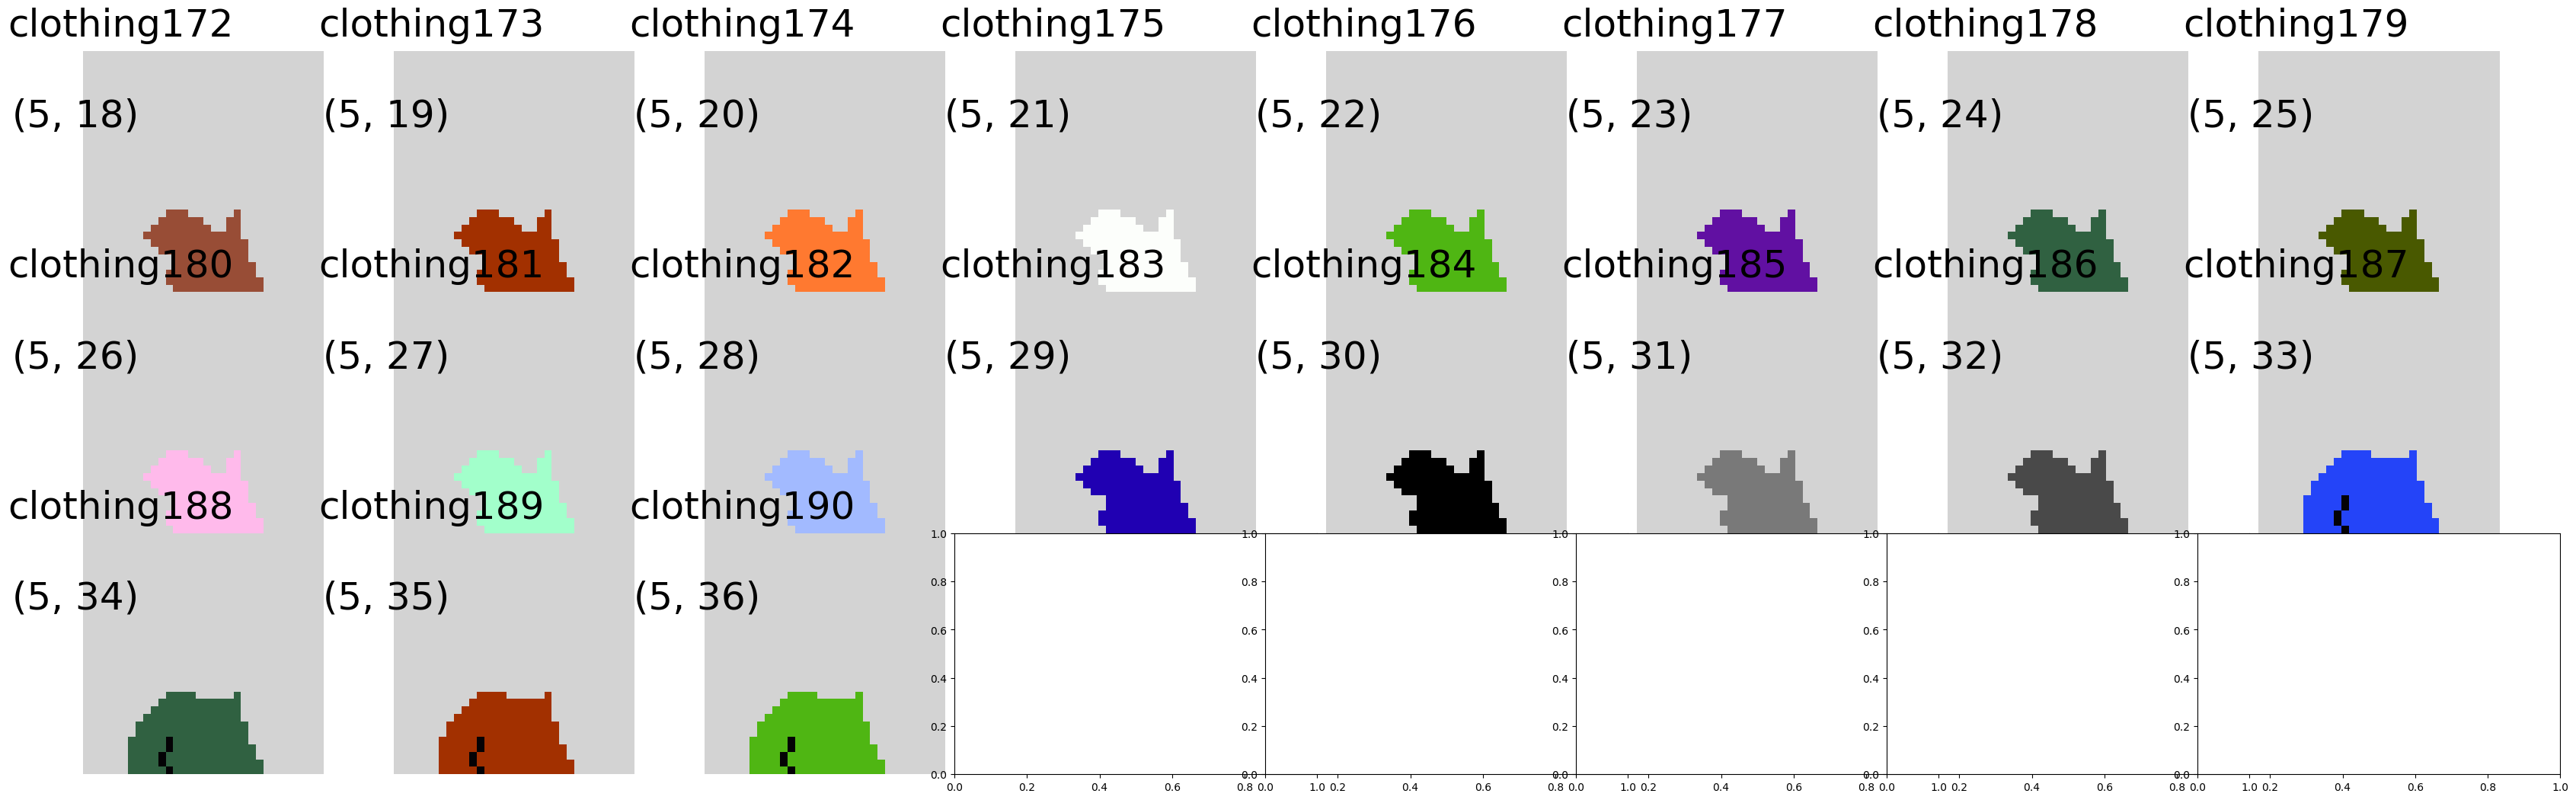

PACK 11


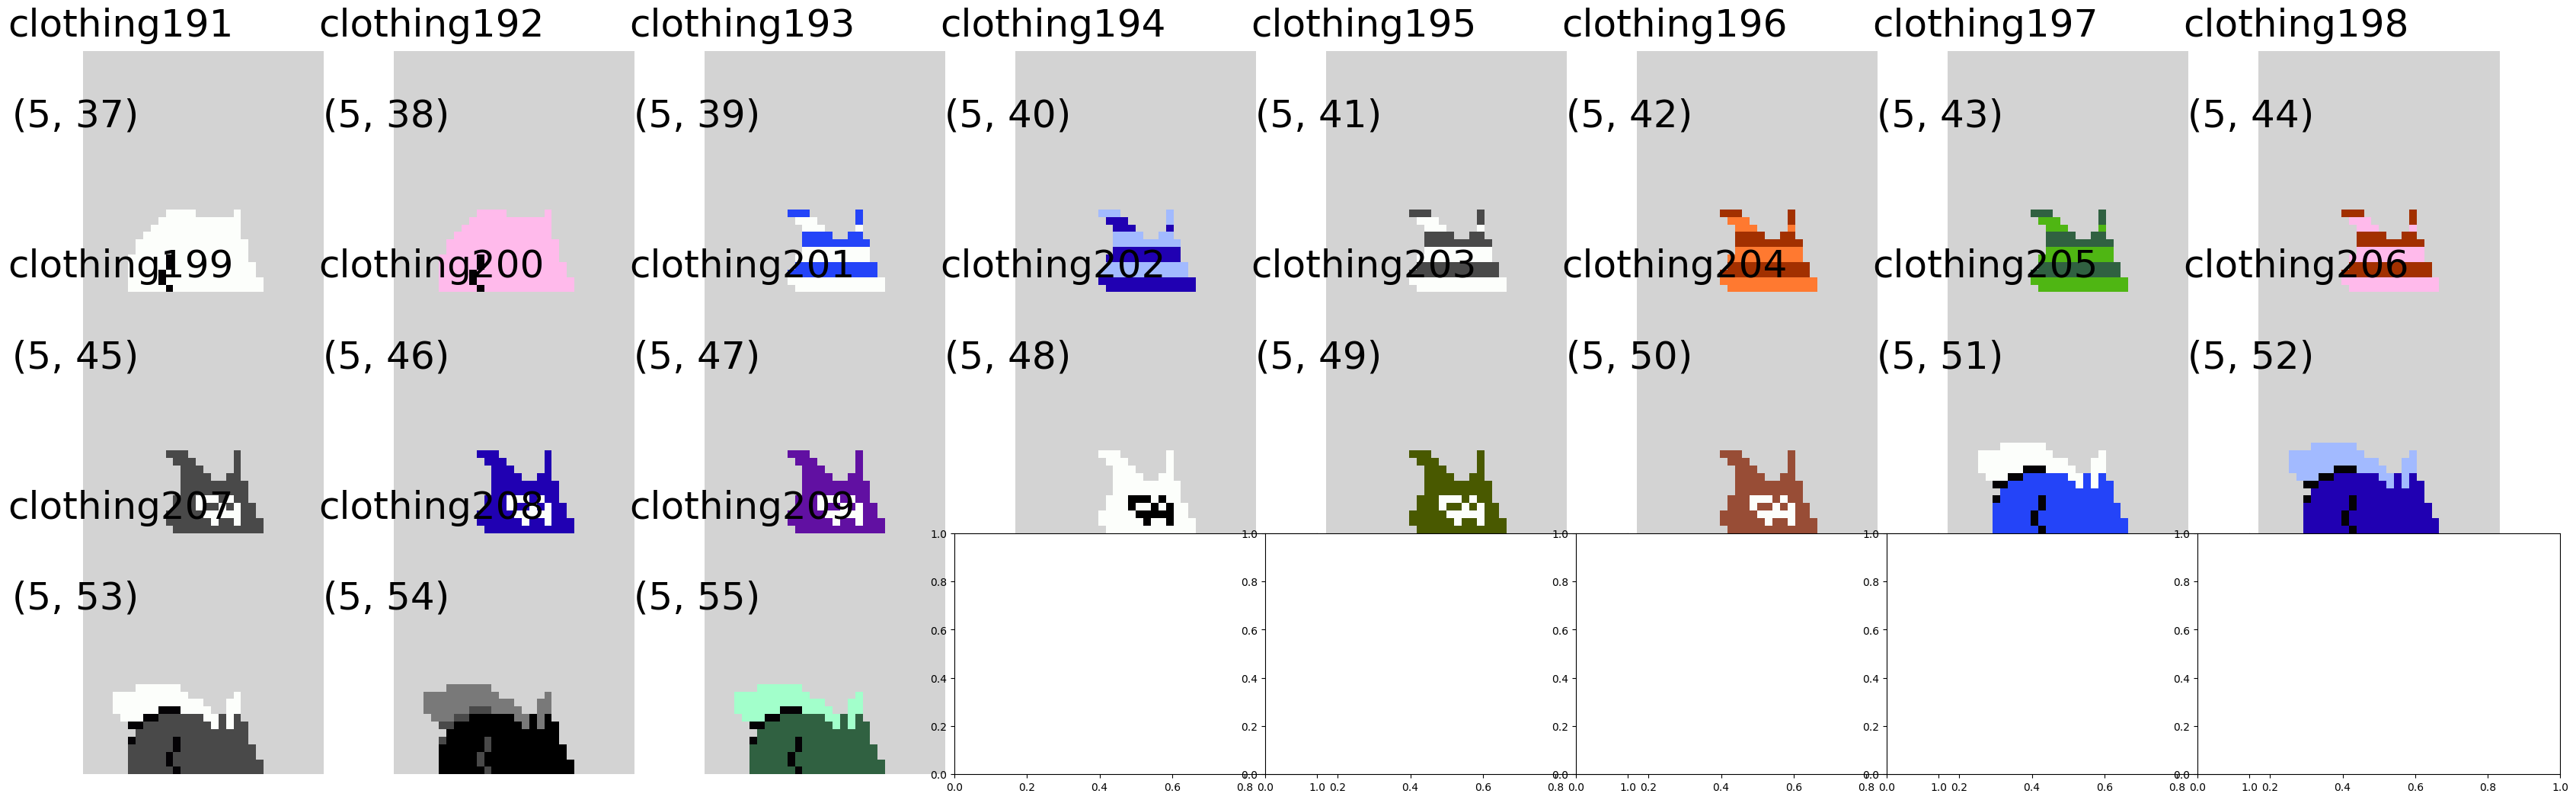

PACK 12


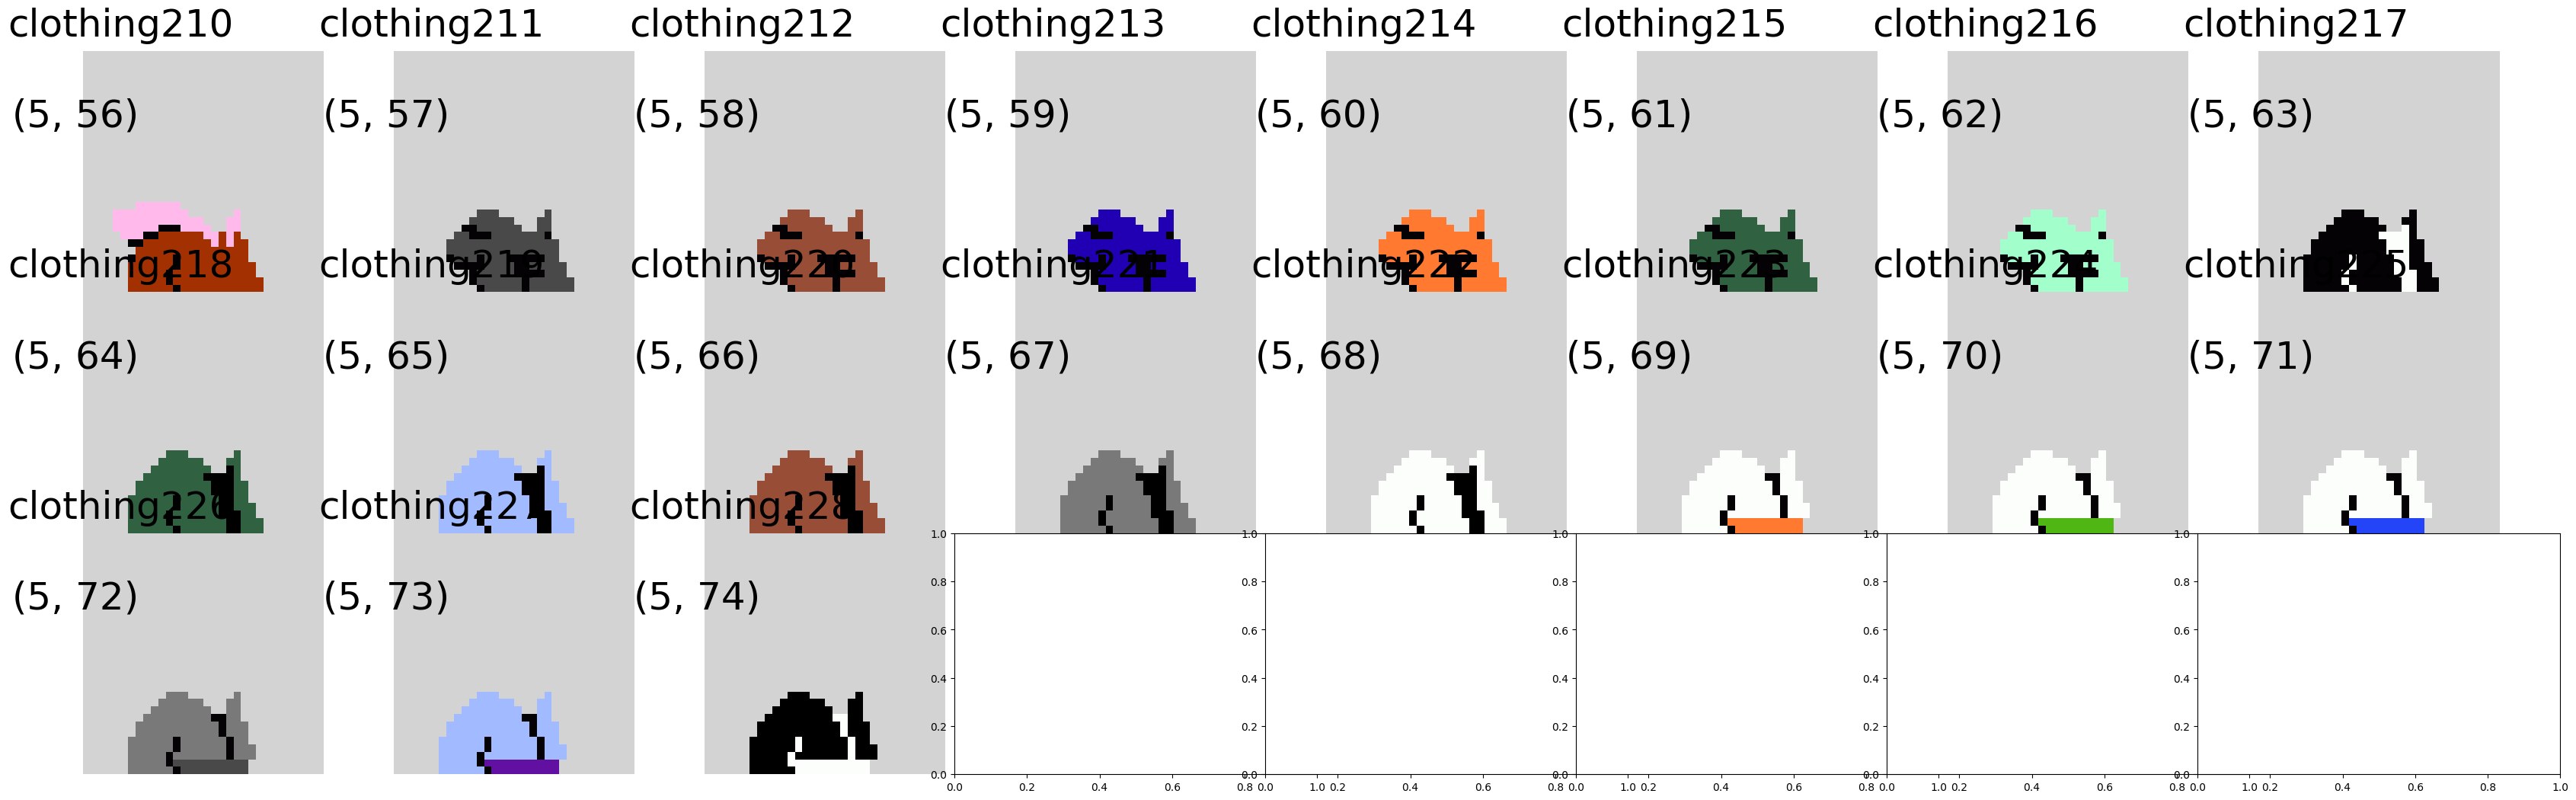

PACK 13


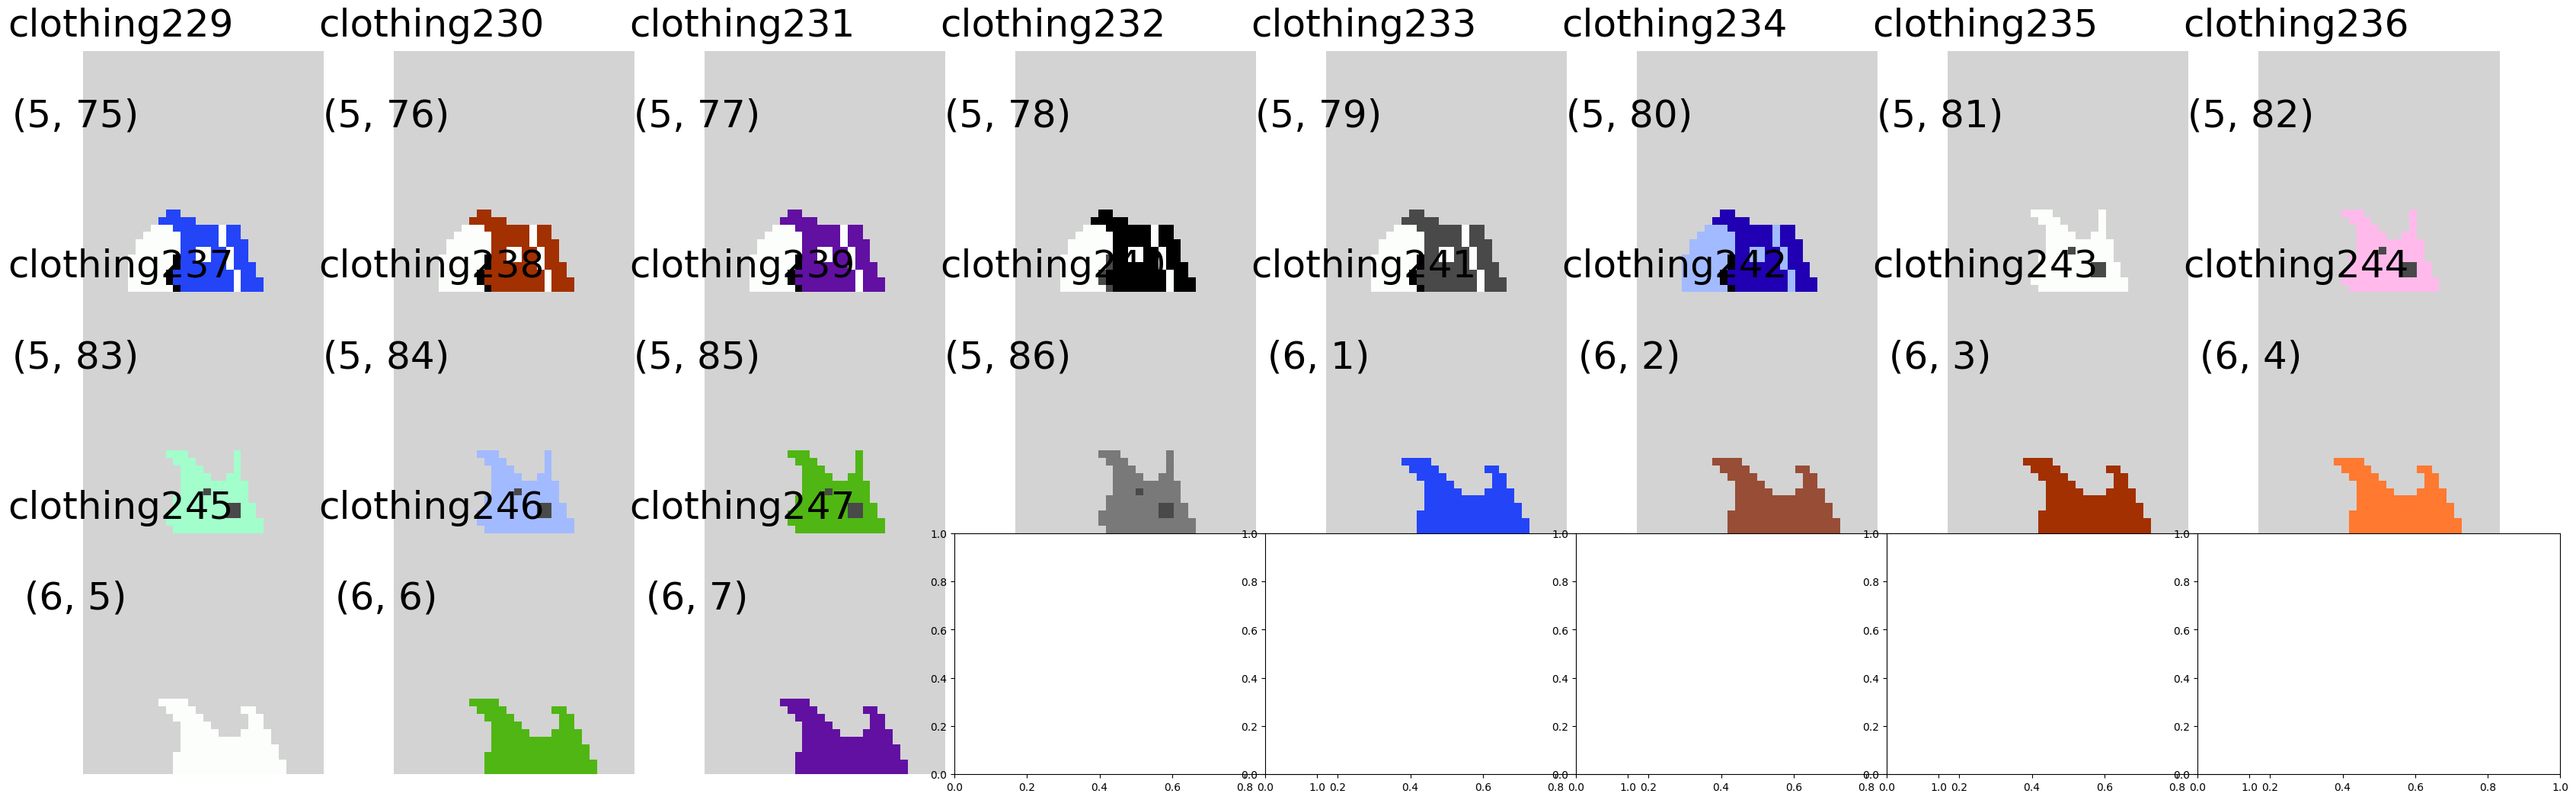

PACK 14


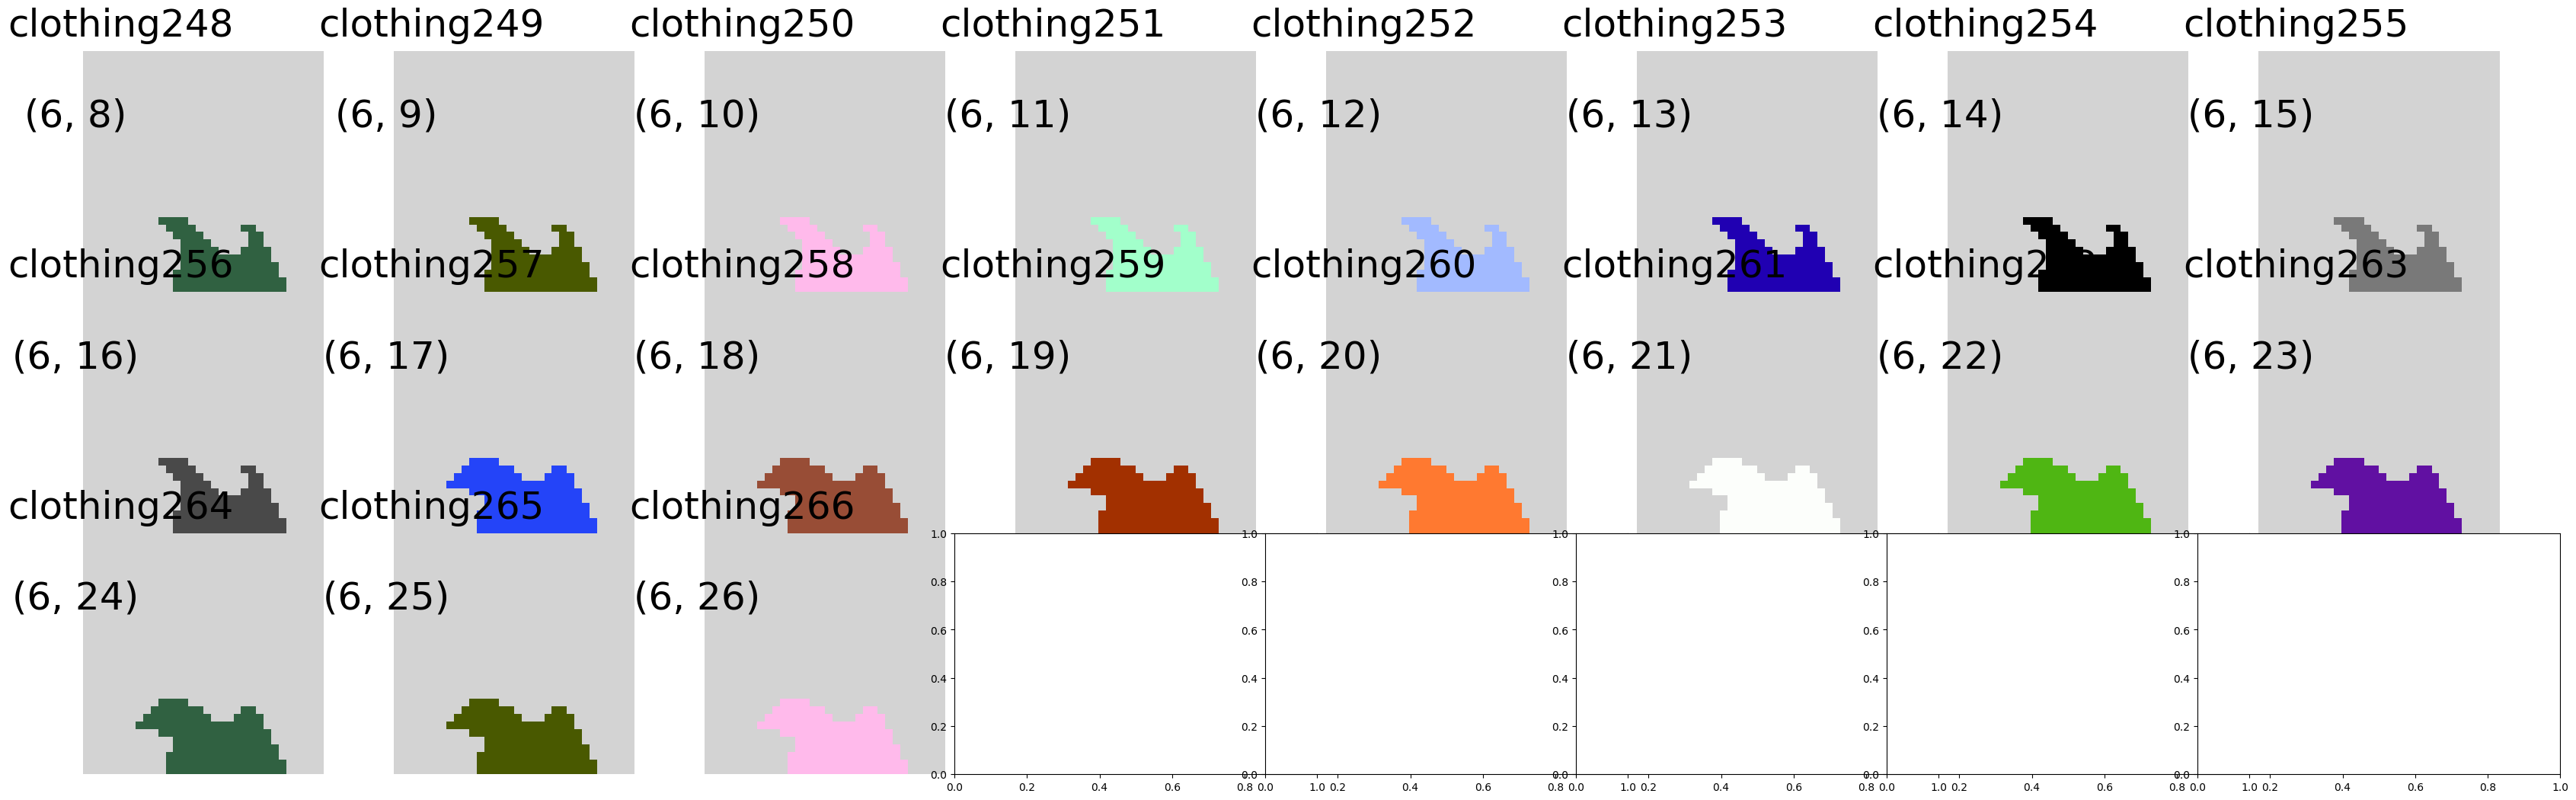

PACK 15


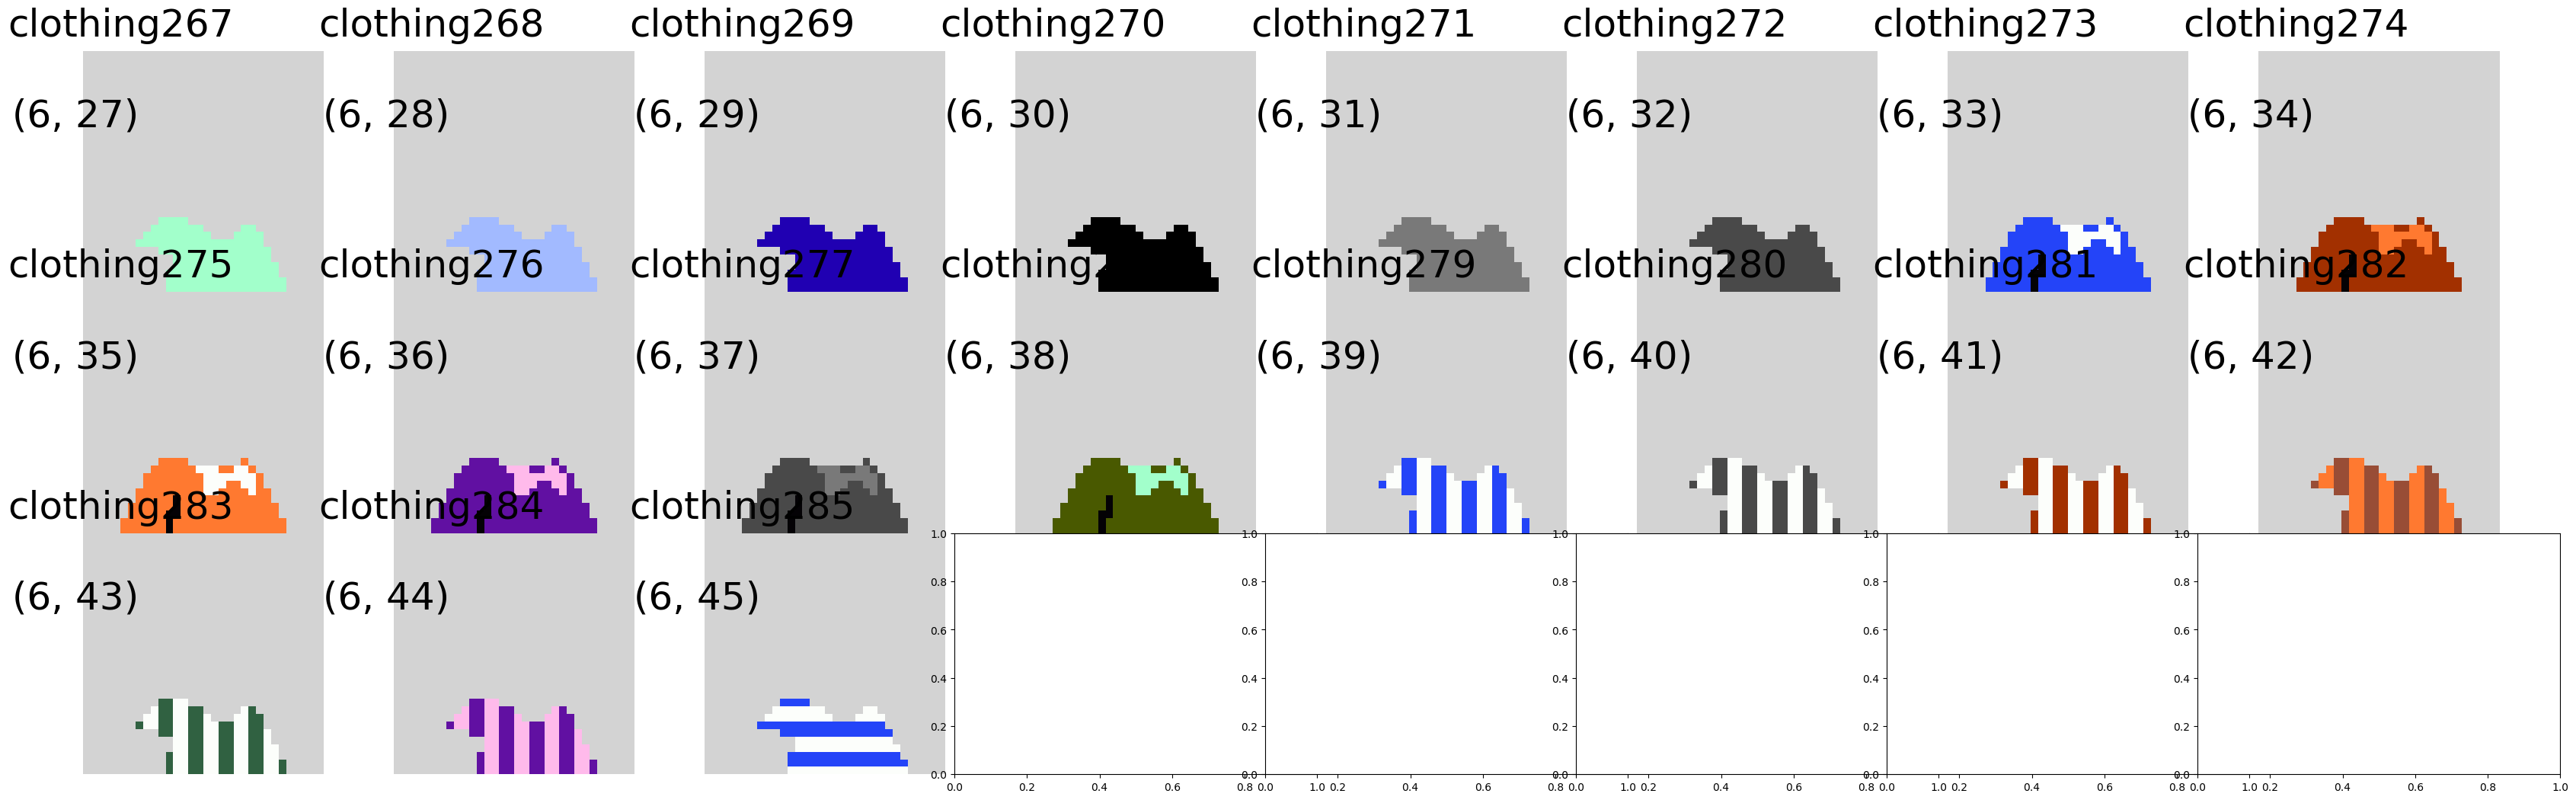

PACK 16


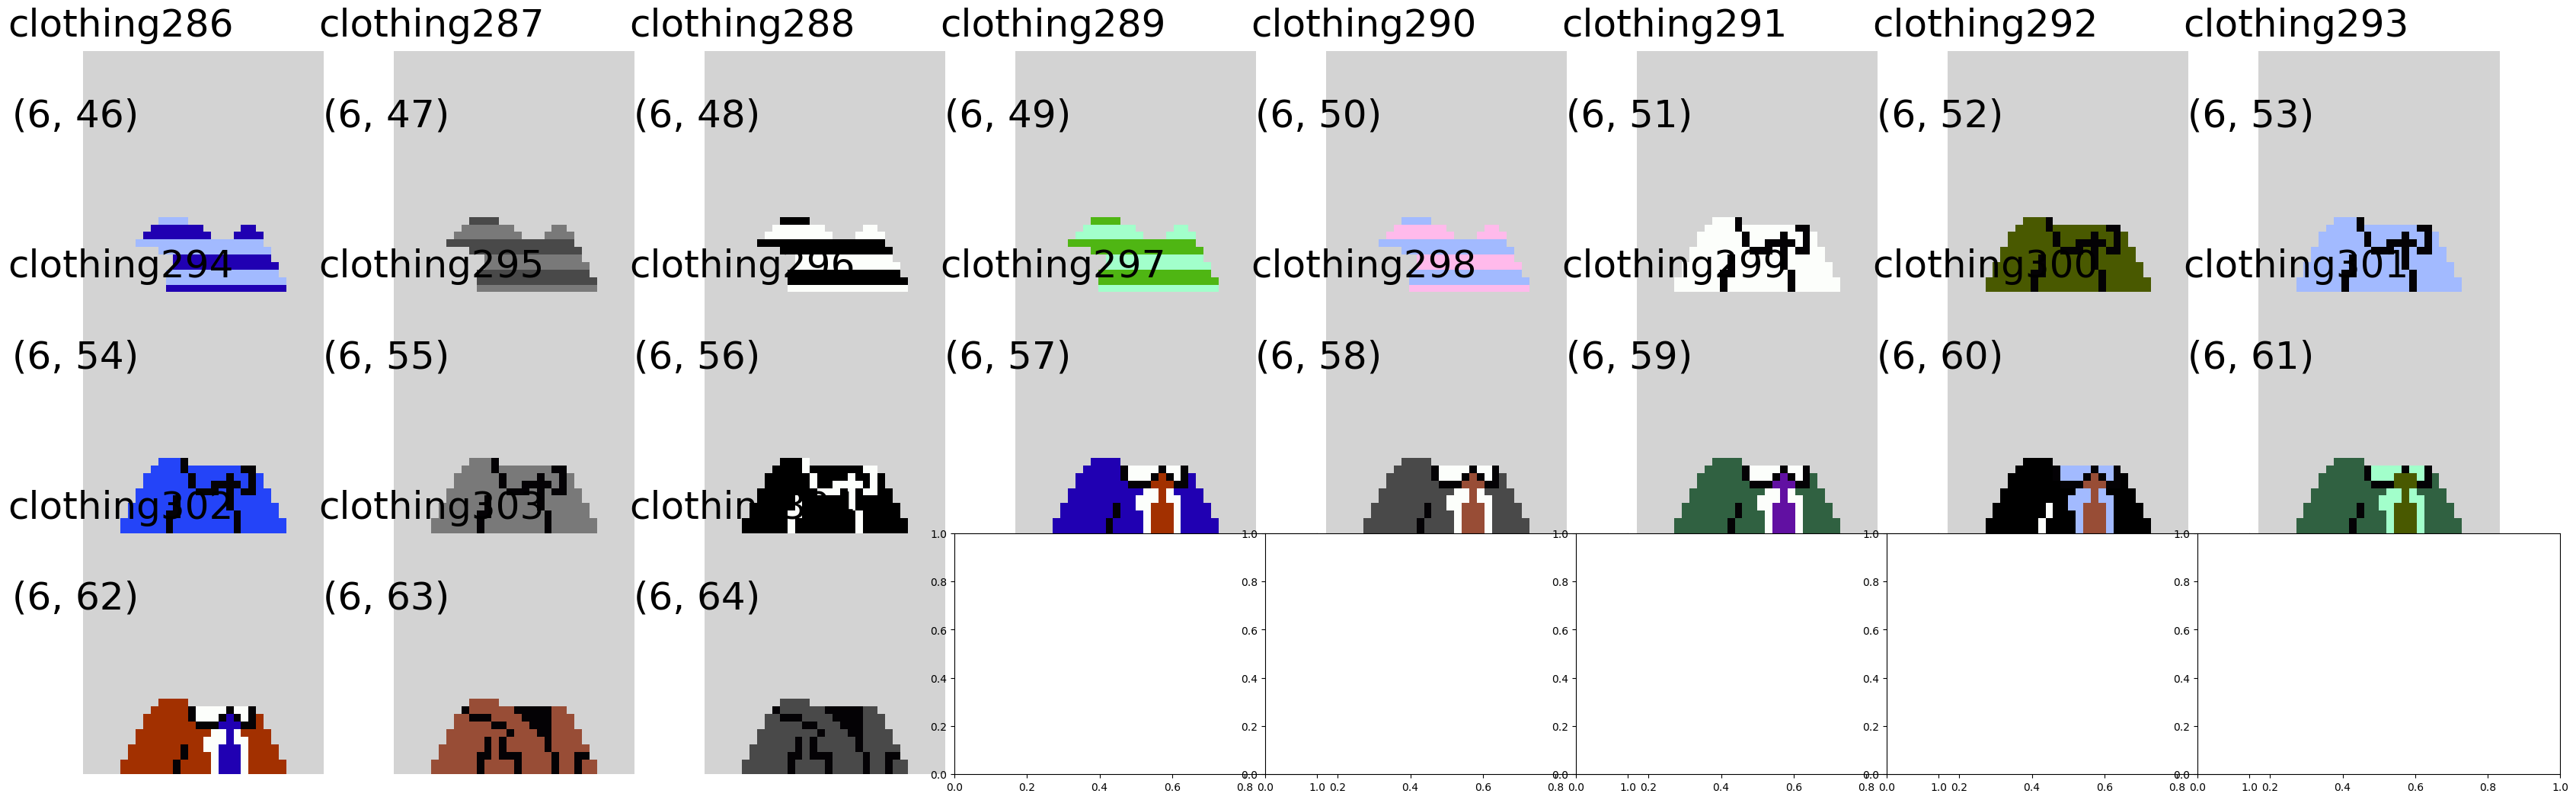

PACK 17


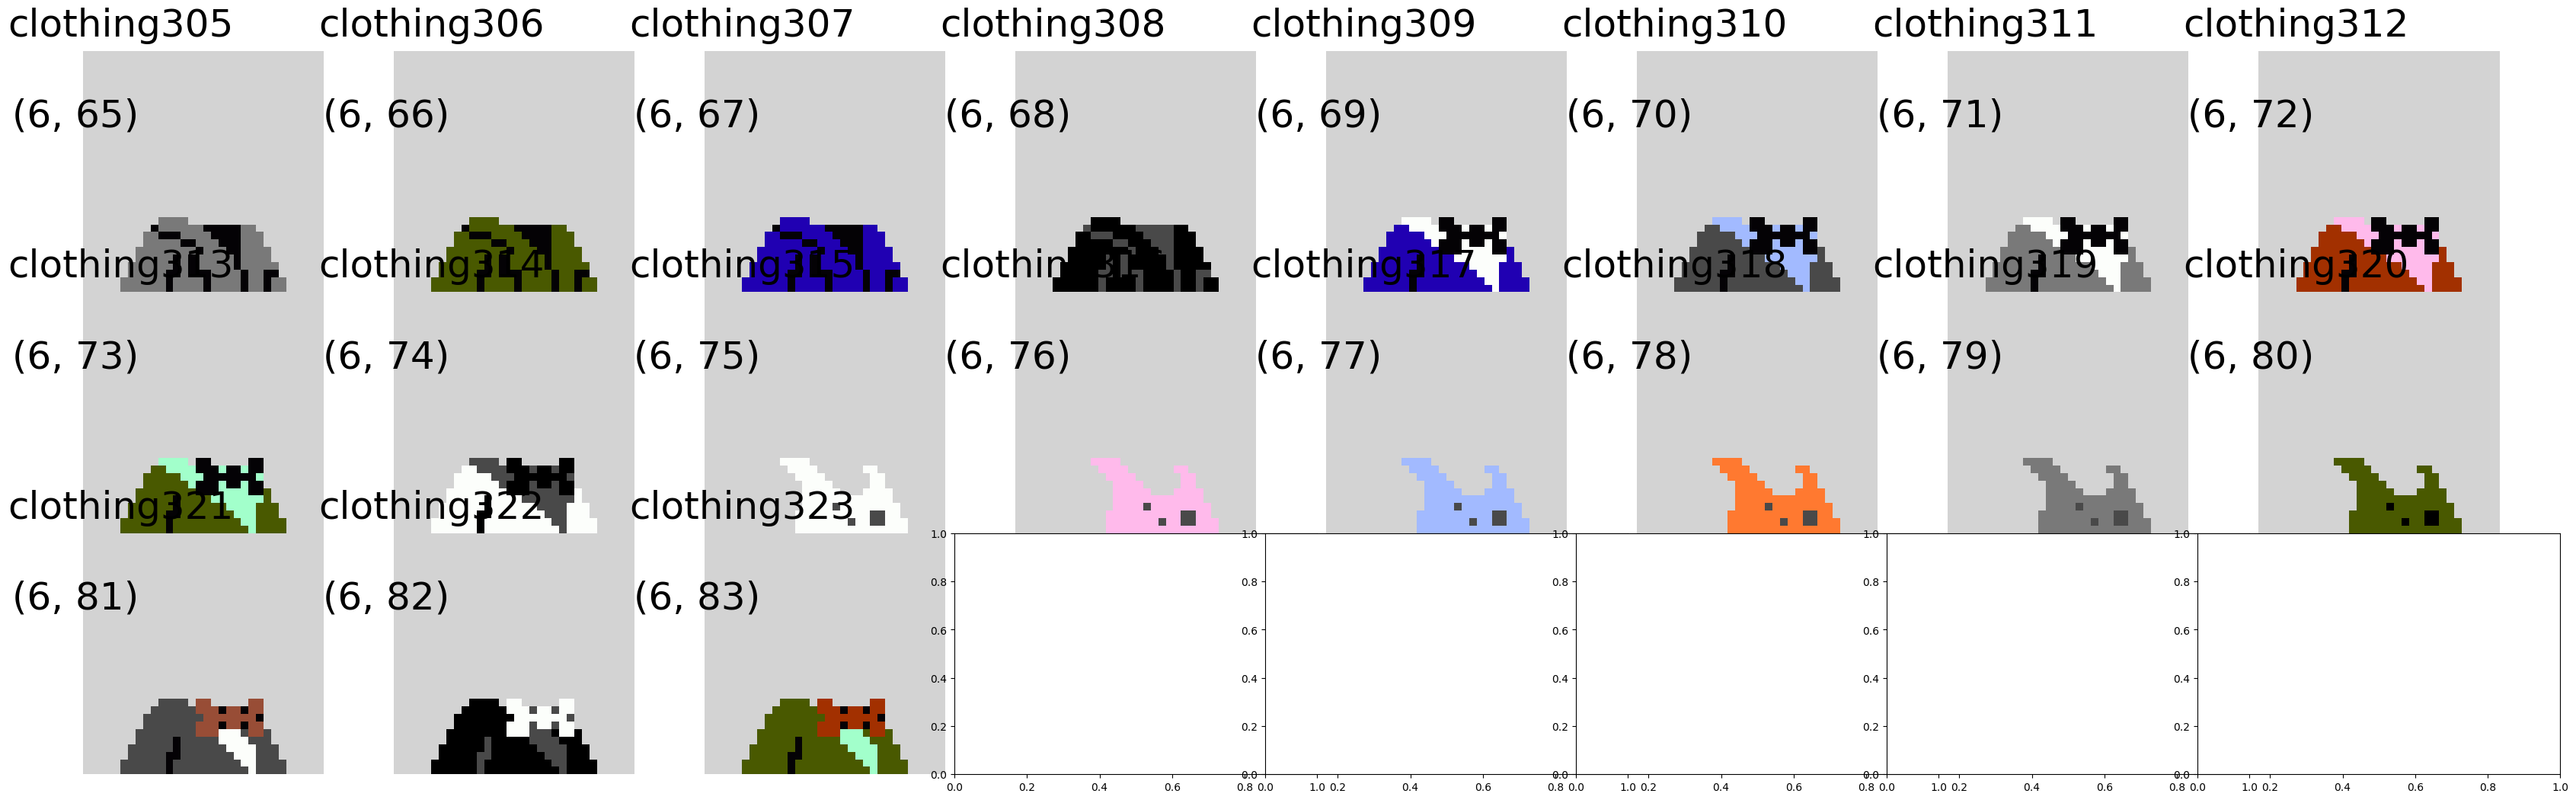

PACK 18


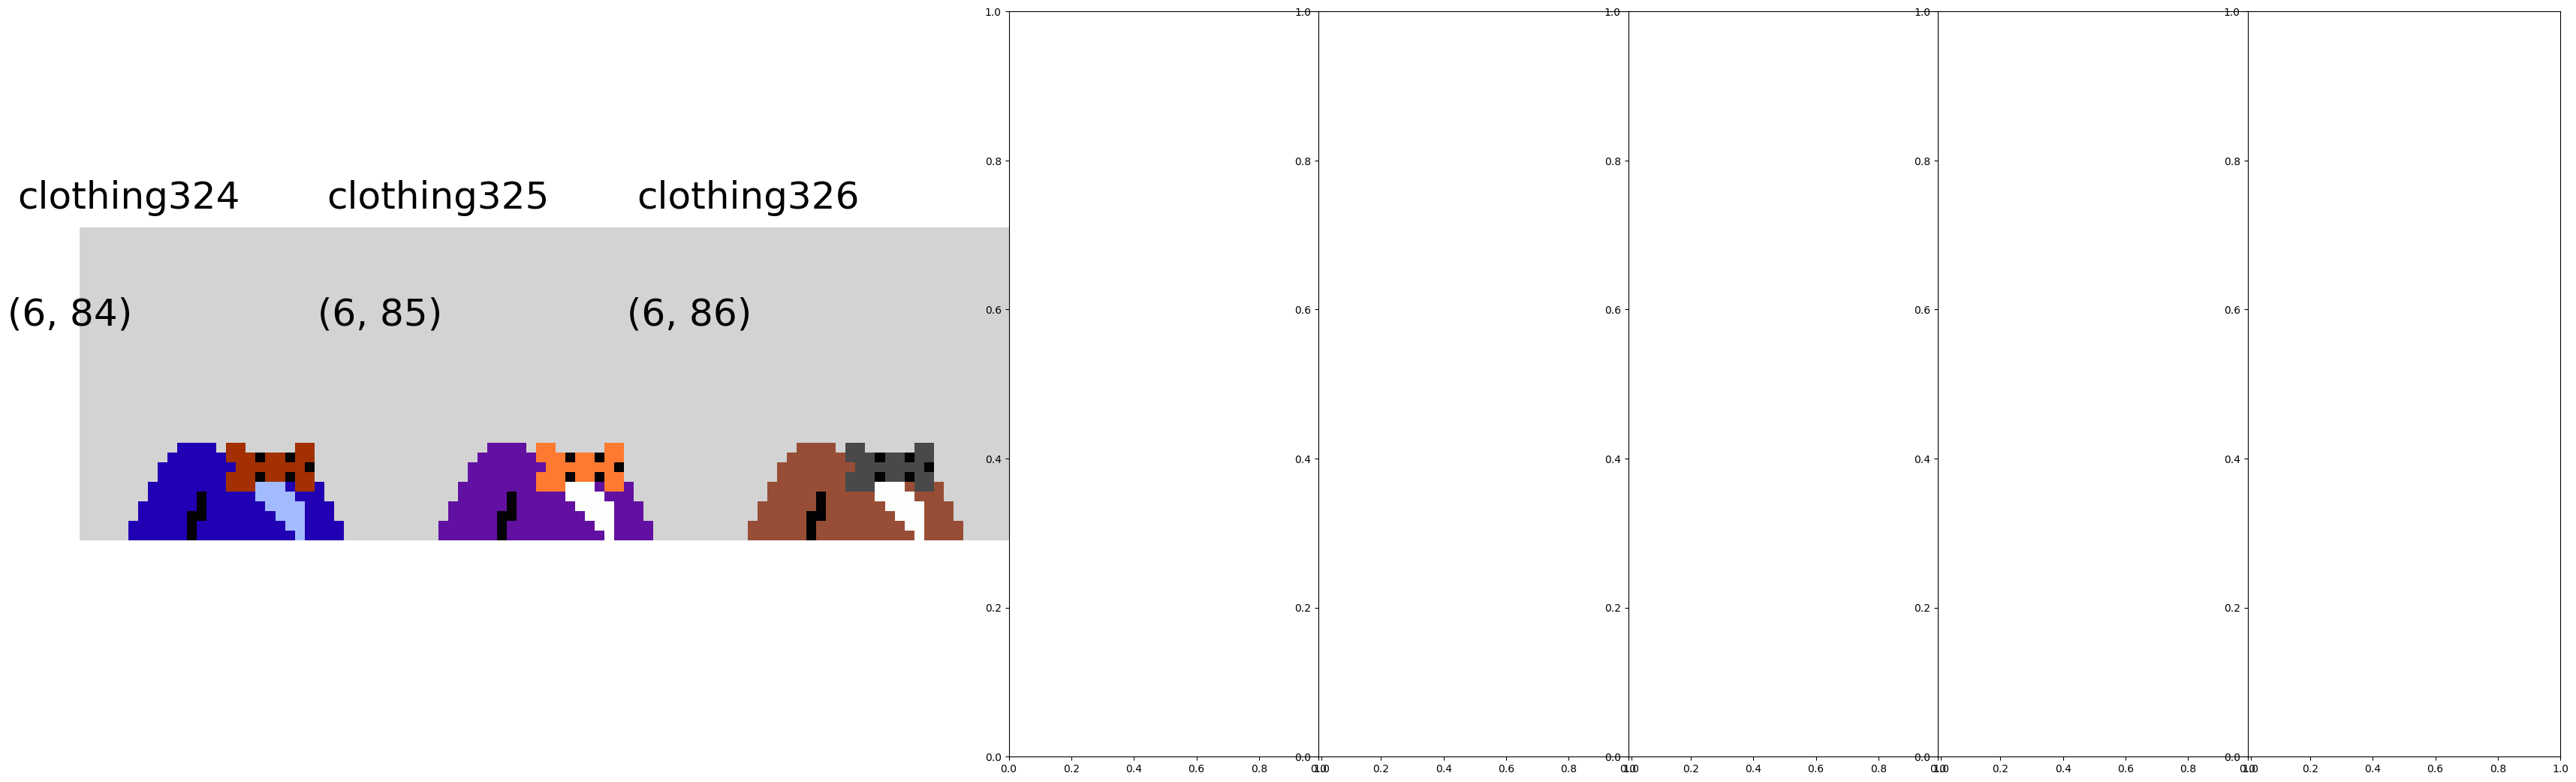

In [1]:
import matplotlib.pyplot as plt
import json

def has_been_written(file_path):
    try:
        with open(file_path, "r") as file:
            return bool(file.read())
    except FileNotFoundError:
        return False

# Write data to the file if it hasn't been written to already
def write_to_file(file_path, data):
    if not has_been_written(file_path):
        with open(file_path, "w") as file:
            file.write(data)
        #print("Data written to file successfully.")
    #else:
        #print("File has already been written to. Further writes are not permitted.")

# if u want to download the svg files, nest one of these two functions:
def convert_to_svg_4(data):
    svg_code = "<svg xmlns='http://www.w3.org/2000/svg' viewBox='0 0 32 32'>\n"
    for rect_data in data:
        x, y, width, height = rect_data
        svg_code += f"<rect x='{x}' y='{y}' width='{width}' height='{height}' fill='#538234'/>\n"
    svg_code += "</svg>"
    return svg_code
def convert_to_svg_5(data):
    svg_code = "<svg xmlns='http://www.w3.org/2000/svg' viewBox='0 0 32 32'>\n"
    for rect_data in data:
        x, y, width, height, color = rect_data
        svg_code += f"<rect x='{x}' y='{y}' width='{width}' height='{height}' fill= '{'#' + hex(color)[2:].zfill(6)}'/>\n"
    svg_code += "</svg>"
    return svg_code


def extract_tuples(data):
    tuples = []
    hexes1 = []
    hexes2 = []
    for item in data['inputs'][0]:
        is_nested = False
        nested_items = []
        hexes1.append(int(item[0]['hex'][2:], 16))
        hexes2.append(int(item[1]['hex'][2:], 16))
        for sub_item in item[2]:
            if isinstance(sub_item, dict) and all(
                key in sub_item for key in ["type", "hex"]
            ):
                if not is_nested:
                    nested_items = []
                    is_nested = True
                else:
                    tuples.append(tuple(nested_items))
                    nested_items = []
            else:
                nested_items.append(sub_item)
        if nested_items:
            tuples.append(tuple(nested_items))
    return [tuples, list(zip(hexes1,hexes2))]

def display_svg_files_as_matrix_4(data_list, labels, columns, vertical_spacing):
    print("PACK 1")
    num_rows = len(data_list) // columns + (1 if len(data_list) % columns != 0 else 0)
    fig_height = num_rows * (1 + vertical_spacing)
    fig, axs = plt.subplots(num_rows, columns, figsize=(32, 8))
    for i, data in enumerate(data_list):    
        
        #optional: nest convert_to_svg_4 function and download each seperate svg file here
        output_file = "./svgs_from_bytecode/body/body" + str(i+1).zfill(3) + '_' + str(labels[i]) + ".svg"
        with open(output_file, 'w') as f:
            f.write(convert_to_svg_4(data))

        row = i // columns
        col = i % columns
        ax = axs[row, col] if num_rows > 1 else axs[col]
        for rect_data in data:
            x, y, width, height = rect_data
            ax.add_patch(plt.Rectangle((x, y), width, height, facecolor='#538234'))
        ax.set_xlim(0, 32)
        ax.set_ylim(0, 32)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.invert_yaxis()
        ax.text(-1, 10, labels[i], fontsize=36, ha='center')
        ax.text(5,-2,'body' + str(i+1).zfill(3), fontsize=36, ha='center')
    plt.tight_layout(pad=-8)
    plt.subplots_adjust(hspace=vertical_spacing)
    plt.show()

def display_svg_files_as_matrix_5(pack_size, counter, data_list, labels, columns, vertical_spacing, name):
    print("PACK " + str(counter+1))
    num_rows = len(data_list) // columns + (1 if len(data_list) % columns != 0 else 0)
    fig_height = num_rows * (1 + vertical_spacing)
    fig, axs = plt.subplots(num_rows, columns, figsize=(32, 8))
    for i, data in enumerate(data_list):

        #optional: nest convert_to_svg_5 function and download each seperate svg file here
        output_file = "./svgs_from_bytecode/" + name + "/" + name + str((counter*pack_size)+i+1).zfill(3) + '_' + str(labels[i]) + ".svg"
#        print(name + str((counter*pack_size)+i+1).zfill(3))
#        with open(output_file, 'w') as f:
#            f.write(convert_to_svg_5(data))
        write_to_file(output_file, convert_to_svg_5(data)) # For some reason svgs were being overwritten
        row = i // columns
        col = i % columns
        ax = axs[row, col] if num_rows > 1 else axs[col]
        ax.add_patch(plt.Rectangle((0,0), 1000, 1000, facecolor='#d3d3d3'))
        for rect_data in data:
            x, y, width, height, color = rect_data
            ax.add_patch(plt.Rectangle((x, y), width, height, facecolor='#' + hex(color)[2:].zfill(6) ))
        ax.set_xlim(0, 32)
        ax.set_ylim(0, 32)
        ax.set_aspect('equal')
        ax.axis('off')
        ax.invert_yaxis()
        ax.text(-1, 10, labels[i], fontsize=36, ha='center')
        ax.text(5,-2,name + str((counter*pack_size)+i+1).zfill(3), fontsize=36, ha='center')
    plt.tight_layout(pad=-8)
    plt.subplots_adjust(hspace=vertical_spacing)
    plt.show()

# Bodies
with open('./jsons_from_bytecode/bodies.json', 'r') as file:
    bodiesFile = json.load(file)
bodies = extract_tuples(bodiesFile)[0]
bodyLabels = extract_tuples(bodiesFile)[1]
display_svg_files_as_matrix_4(bodies, bodyLabels, columns=8, vertical_spacing=0)

# Eyes
with open('./jsons_from_bytecode/eyes.json', 'r') as file:
    eyesFile = json.load(file)
eyes = extract_tuples(eyesFile)[0]
eyeLabels = extract_tuples(eyesFile)[1]
display_svg_files_as_matrix_5(1,0, eyes, eyeLabels, columns=8, vertical_spacing=0, name="eye")

# Mouths
with open('./jsons_from_bytecode/mouths.json', 'r') as file:
    mouthsFile = json.load(file)
mouths = extract_tuples(mouthsFile)[0]
mouthLabels = extract_tuples(mouthsFile)[1]
display_svg_files_as_matrix_5(1,0, mouths, mouthLabels, columns=8, vertical_spacing=0, name="mouth")

# Hats
hat = []
hatLabel = []
hatFile = []
for i in range(1,13):
    filename = './jsons_from_bytecode/hats/hats'+ str(i).zfill(3) +'.json'
    with open(filename, 'r') as file:
        hatFile.append(json.load(file))
    hat.append(extract_tuples(hatFile[i-1])[0])
    hatLabel.append(extract_tuples(hatFile[i-1])[1])
for i in range(0,12):
    display_svg_files_as_matrix_5(16,i, hat[i], hatLabel[i], columns=8, vertical_spacing=0, name="hat")

# Accessories
accessories = []
accessoriesLabel = []
accessoriesFile = []
for i in range(1,10):
    filename = './jsons_from_bytecode/accessories/accessories'+ str(i).zfill(2) +'.json'
    with open(filename, 'r') as file:
        accessoriesFile.append(json.load(file))
    accessories.append(extract_tuples(accessoriesFile[i-1])[0])
    accessoriesLabel.append(extract_tuples(accessoriesFile[i-1])[1])
for i in range(0,9):
    display_svg_files_as_matrix_5(17,i, accessories[i], accessoriesLabel[i], columns=8, vertical_spacing=0, name="accessory")

# Clothes
clothes = []
clothesLabel = []
clothesFile = []
for i in range(1,19):
    filename = './jsons_from_bytecode/clothes/clothes'+ str(i).zfill(3) +'.json'
    with open(filename, 'r') as file:
        clothesFile.append(json.load(file))
    clothes.append(extract_tuples(clothesFile[i-1])[0])
    clothesLabel.append(extract_tuples(clothesFile[i-1])[1])
for i in range(0,18):
    display_svg_files_as_matrix_5(19, i, clothes[i], clothesLabel[i], columns=8, vertical_spacing=0, name="clothing")